In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.special import boxcox1p
import statsmodels.api as sm
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
%matplotlib inline

# Steps to do before doing the analysis

In [2]:
# Set the style for plots in this worksheet
sns.set_theme(style="darkgrid")

# Show all columns in the dataset
pd.set_option('max_columns', None)

# Set the rows to be displayed to 200
pd.set_option('max_rows', 500)

# 1. Reading and Understanding the Data

In [3]:
# Read the data
data = pd.read_csv("telecom_churn_data.csv")
data.head(5)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
print(data.shape)
data.columns

(99999, 226)


Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Get all columns in the dataframe
data.columns.values.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

# 2. Creation of 'Churned customers'

### 2.1 Investigate different features of September month

In [7]:
# Check all 'incoming' variables of 9th month
ic_col_list = ["loc_ic_t2t_mou_9", "loc_ic_t2m_mou_9","loc_ic_t2f_mou_9",
           "loc_ic_mou_9","std_ic_t2t_mou_9","std_ic_t2m_mou_9", "std_ic_t2f_mou_9", 
           "std_ic_t2o_mou_9", "std_ic_mou_9","isd_ic_mou_9","spl_ic_mou_9","ic_others_9",
            "roam_ic_mou_9", "total_ic_mou_9"]
data[ic_col_list].describe()

loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  \
count      92254.000000      92254.000000      92254.000000  92254.000000   
mean          46.281794        106.155471         12.173105    164.619293   
std          140.130610        165.492803         43.840776    249.845070   
min            0.000000          0.000000          0.000000      0.000000   
25%            3.290000         18.560000          0.000000     32.290000   
50%           15.660000         56.610000          0.960000     91.640000   
75%           45.180000        130.490000          8.140000    202.737500   
max        10598.830000       5463.780000       4318.280000  10796.290000   

       std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_t2o_mou_9  \
count      92254.000000      92254.000000      92254.000000           92254.0   
mean           9.432479         19.620913          2.173419               0.0   
std           53.376273         74.913050         15.978601               0.0   
min            0.000000          0.000000          0.000000               0.0   
25%            0.000000          0.000000          0.000000               0.0   
50%            0.000000          1.740000          0.000000               0.0   
75%            3.510000         14.260000          0.000000               0.0   
max         3819.830000       5689.760000       1431.960000               0.0   

       std_ic_mou_9  isd_ic_mou_9  spl_ic_mou_9   ic_others_9  roam_ic_mou_9  \
count  92254.000000  92254.000000  92254.000000  92254.000000   92254.000000   
mean      31.229344      8.063003      0.163137      1.017162       6.343841   
std      101.982303     63.505379      0.527860     12.381172      57.137537   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        5.380000      0.000000      0.000000      0.000000       0.000000   
75%       25.690000      0.000000      0.060000      0.000000       0.000000   
max     5956.660000   5057.740000     62.380000   1005.230000    8464.030000   

       total_ic_mou_9  
count    99999.000000  
mean       189.214260  
std        284.823024  
min          0.000000  
25%         32.370000  
50%        105.890000  
75%        236.320000  
max      10796.590000

In [8]:
# Check all 'outgoing' variables of 9th month
og_col_list = ["loc_og_t2t_mou_9", "loc_og_t2m_mou_9", "loc_og_t2f_mou_9","loc_og_t2c_mou_9",
           "loc_og_mou_9","std_og_t2t_mou_9","std_og_t2m_mou_9", "std_og_t2f_mou_9", 
           "std_og_t2c_mou_9", "std_og_mou_9","isd_og_mou_9","spl_og_mou_9","og_others_9",
            "roam_og_mou_9", "total_og_mou_9"]
data[og_col_list].describe()

loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
count      92254.000000      92254.000000      92254.000000      92254.000000   
mean          44.584446         90.463192          3.655123          1.232726   
std          147.995390        158.681454         13.457549          5.619021   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.360000          8.810000          0.000000          0.000000   
50%           11.260000         39.120000          0.000000          0.000000   
75%           39.280000        106.810000          1.940000          0.000000   
max        10389.240000       4429.880000        927.410000        339.840000   

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
count  92254.000000      92254.000000      92254.000000      92254.000000   
mean     138.709970         82.342919         86.276622          1.042362   
std      245.934517        267.184991        261.407396          8.261770   
min        0.000000          0.000000          0.000000          0.000000   
25%       15.560000          0.000000          0.000000          0.000000   
50%       61.840000          0.000000          2.500000          0.000000   
75%      162.225000         28.230000         48.560000          0.000000   
max    11099.260000       9382.580000      10223.430000        808.490000   

       std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  \
count           92254.0  92254.000000  92254.000000  92254.000000   
mean                0.0    169.664466      0.723892      4.412767   
std                 0.0    405.138658     21.310751     16.328227   
min                 0.0      0.000000      0.000000      0.000000   
25%                 0.0      0.000000      0.000000      0.000000   
50%                 0.0      8.410000      0.000000      0.000000   
75%                 0.0    142.105000      0.000000      3.230000   
max                 0.0  11495.310000   4244.530000   1635.710000   

        og_others_9  roam_og_mou_9  total_og_mou_9  
count  92254.000000   92254.000000    99999.000000  
mean       0.047456       8.555519      289.279198  
std        3.635466      58.438186      468.980002  
min        0.000000       0.000000        0.000000  
25%        0.000000       0.000000       25.510000  
50%        0.000000       0.000000      125.460000  
75%        0.000000       0.000000      353.480000  
max      787.790000    4428.460000    11517.730000

In [9]:
# Check all 'data' variables of 9th month
data_col_list = ["monthly_2g_9", "sachet_2g_9","monthly_3g_9","sachet_3g_9","fb_user_9",
           "vol_3g_mb_9","vol_2g_mb_9","av_rech_amt_data_9", "count_rech_3g_9", 
               "count_rech_2g_9","max_rech_data_9", "total_rech_data_9"]
data[data_col_list].describe()

monthly_2g_9   sachet_2g_9  monthly_3g_9   sachet_3g_9     fb_user_9  \
count  99999.000000  99999.000000  99999.000000  99999.000000  25922.000000   
mean       0.068781      0.393104      0.086341      0.084581      0.860968   
std        0.278120      1.347140      0.384978      0.650457      0.345987   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      1.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        4.000000     40.000000     11.000000     49.000000      1.000000   

        vol_3g_mb_9   vol_2g_mb_9  av_rech_amt_data_9  count_rech_3g_9  \
count  99999.000000  99999.000000        25922.000000     25922.000000   
mean     136.056613     44.719701          192.734315         0.659363   
std      577.394194    198.653570          188.400286         1.411513   
min        0.000000      0.000000            1.000000         0.000000   
25%        0.000000      0.000000           69.000000         0.000000   
50%        0.000000      0.000000          164.000000         0.000000   
75%        0.000000      0.000000          252.000000         1.000000   
max    39221.270000   8993.950000         4061.000000        49.000000   

       count_rech_2g_9  max_rech_data_9  total_rech_data_9  
count     25922.000000      25922.00000       25922.000000  
mean          1.781807        124.94144           2.441170  
std           2.214701        111.36376           2.516339  
min           0.000000          1.00000           1.000000  
25%           1.000000         25.00000           1.000000  
50%           1.000000        145.00000           2.000000  
75%           2.000000        179.00000           3.000000  
max          40.000000       1555.00000          84.000000

In [10]:
# Check the remaining variables of 9th month (other than incoming, outgoing and data variables)
other_col_list = ["night_pck_user_9","onnet_mou_9","offnet_mou_9","arpu_3g_9", "arpu_2g_9","arpu_9"]
data[other_col_list].describe()

night_pck_user_9   onnet_mou_9  offnet_mou_9     arpu_3g_9  \
count      25922.000000  92254.000000  92254.000000  25922.000000   
mean           0.015971    130.302327    190.337222    100.264116   
std            0.125366    308.477668    319.396092    216.291992   
min            0.000000      0.000000      0.000000    -71.090000   
25%            0.000000      5.330000     27.130000      0.000000   
50%            0.000000     29.840000     87.290000      2.605000   
75%            0.000000    112.130000    220.505000    140.010000   
max            1.000000  10427.460000  10310.760000  13884.310000   

          arpu_2g_9        arpu_9  
count  25922.000000  99999.000000  
mean      93.712026    261.645069  
std      171.384224    341.998630  
min      -45.740000  -1899.505000  
25%        0.000000     62.685000  
50%       14.800000    176.849000  
75%      140.010000    353.466500  
max     3467.170000  38805.617000

In [11]:
# Get the number of values with 'total_incoming' as zero in 9th month
data[(data["total_ic_mou_9"] == 0)].shape

(11485, 226)

In [12]:
# Get the number of values with 'total_outgoing' as zero in 9th month
data[(data["total_og_mou_9"] == 0)].shape

(14143, 226)

In [13]:
# Get the number of values with datausage (both 2g and 3g) as zero in 9th month
data[(data["vol_3g_mb_9"] == 0) & (data["vol_2g_mb_9"] == 0)].shape

(76916, 226)

In [14]:
# Get the number of rows with 'total_incoming', 'total_outgoing' and data features as zero in 9th month
data[(data["total_ic_mou_9"] == 0) & (data["total_og_mou_9"] == 0)& 
     (data["vol_3g_mb_9"] == 0)& (data["vol_2g_mb_9"] == 0)].shape

# There is no need to check for null values as we already know from 'describe' statements that 
# there are no null values in these columns.

(10191, 226)

### 2.2 Create "is_churned" variable to distinguish the churned customers in September month

In [15]:
# Create 'is_churned' column to know the churned customers in 9th month
data['is_churned'] = np.where(((data["total_ic_mou_9"] == 0) & (data["total_og_mou_9"] == 0)& 
     (data["vol_3g_mb_9"] == 0)& (data["vol_2g_mb_9"] == 0)), 1, 0)

In [16]:
# Look at the count of churned customers in 9th month
data['is_churned'].value_counts()

0    89808
1    10191
Name: is_churned, dtype: int64

In [17]:
# Get the percentage of churned customers in September month
data['is_churned'].value_counts(1) * 100

0    89.808898
1    10.191102
Name: is_churned, dtype: float64

Text(0.5, 1.0, 'Is Churned?')

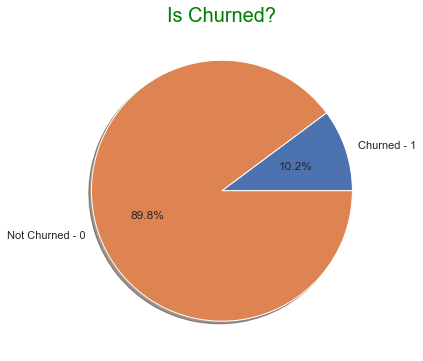

In [18]:
# Show the percentage of churned customers in September month in a plot format
sizes = [data['is_churned'].value_counts()[1], data['is_churned'].value_counts()[0]]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=['Churned - 1', 'Not Churned - 0'], autopct='%1.1f%%', shadow=True)
plt.title("Is Churned?", fontdict = {'fontsize' : 20, 'color':'green'})

### 2.2 Remove all the features related to September month

In [19]:
data.shape

(99999, 227)

In [20]:
# Drop all the features ending with _9
data.drop(list(data.filter(regex = '_9')), axis = 1, inplace = True) 

# Drop sep_vbc_3g feature as its related to 9th month
data.drop("sep_vbc_3g", axis = 1, inplace = True) 

In [21]:
data.shape

(99999, 172)

# 3. Treatment of Missing Values

In [22]:
# Get the null value percentages for each feature 
data.isnull().sum() * 100 / len(data)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2m_m

In [23]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
av_rech_amt_data_6          74.85
arpu_3g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_2g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
arpu_2g_8                   73.66
av_rech_amt_data_8          73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
night_pck_user_8            73.66
count_rech_3g_8             73.66
max_rech_data_8             73.66
total_rech_data_8           73.66
fb_user_8                   73.66
date_of_last_r

### 3.1 Investigate the columns where null values' percentage is more than 70%

In [24]:
# create list for the columns for which null values are more than 70%
cols_70_null = ['date_of_last_rech_data_6','count_rech_3g_6','night_pck_user_6','total_rech_data_6','arpu_3g_6',
                'fb_user_6','max_rech_data_6','av_rech_amt_data_6','count_rech_2g_6','arpu_2g_6','arpu_3g_7',
                'night_pck_user_7','av_rech_amt_data_7','count_rech_3g_7','count_rech_2g_7','max_rech_data_7',
                'fb_user_7','total_rech_data_7','date_of_last_rech_data_7','arpu_2g_7','count_rech_2g_8',
                'max_rech_data_8','count_rech_3g_8','av_rech_amt_data_8','total_rech_data_8',
                'date_of_last_rech_data_8','arpu_3g_8','night_pck_user_8','fb_user_8','arpu_2g_8',]

data[cols_70_null].head(30)

date_of_last_rech_data_6  count_rech_3g_6  night_pck_user_6  \
0                 6/21/2014              1.0               0.0   
1                       NaN              NaN               NaN   
2                       NaN              NaN               NaN   
3                       NaN              NaN               NaN   
4                  6/4/2014              0.0               0.0   
5                       NaN              NaN               NaN   
6                       NaN              NaN               NaN   
7                       NaN              NaN               NaN   
8                       NaN              NaN               NaN   
9                       NaN              NaN               NaN   
10                      NaN              NaN               NaN   
11                      NaN              NaN               NaN   
12                      NaN              NaN               NaN   
13                      NaN              NaN               NaN   
14                      NaN              NaN               NaN   
15                      NaN              NaN               NaN   
16                      NaN              NaN               NaN   
17                      NaN              NaN               NaN   
18                      NaN              NaN               NaN   
19                6/27/2014              0.0               0.0   
20                      NaN              NaN               NaN   
21                      NaN              NaN               NaN   
22                      NaN              NaN               NaN   
23                      NaN              NaN               NaN   
24                      NaN              NaN               NaN   
25                      NaN              NaN               NaN   
26                      NaN              NaN               NaN   
27                      NaN              NaN               NaN   
28                      NaN              NaN               NaN   
29                      NaN              NaN               NaN   

    total_rech_data_6  arpu_3g_6  fb_user_6  max_rech_data_6  \
0                 1.0     212.17        1.0            252.0   
1                 NaN        NaN        NaN              NaN   
2                 NaN        NaN        NaN              NaN   
3                 NaN        NaN        NaN              NaN   
4                 1.0       0.00        0.0             56.0   
5                 NaN        NaN        NaN              NaN   
6                 NaN        NaN        NaN              NaN   
7                 NaN        NaN        NaN              NaN   
8                 NaN        NaN        NaN              NaN   
9                 NaN        NaN        NaN              NaN   
10                NaN        NaN        NaN              NaN   
11                NaN        NaN        NaN              NaN   
12                NaN        NaN        NaN              NaN   
13                NaN        NaN        NaN              NaN   
14                NaN        NaN        NaN              NaN   
15                NaN        NaN        NaN              NaN   
16                NaN        NaN        NaN              NaN   
17                NaN        NaN        NaN              NaN   
18                NaN        NaN        NaN              NaN   
19                1.0       0.00        1.0            154.0   
20                NaN        NaN        NaN              NaN   
21                NaN        NaN        NaN              NaN   
22                NaN        NaN        NaN              NaN   
23                NaN        NaN        NaN              NaN   
24                NaN        NaN        NaN              NaN   
25                NaN        NaN        NaN              NaN   
26                NaN        NaN        NaN              NaN   
27                NaN        NaN        NaN              NaN   
28                NaN        NaN        NaN              NaN   
29                NaN        NaN    

In [25]:
data[cols_70_null].describe()

count_rech_3g_6  night_pck_user_6  total_rech_data_6     arpu_3g_6  \
count     25153.000000      25153.000000       25153.000000  25153.000000   
mean          0.599133          0.025086           2.463802     89.555057   
std           1.274428          0.156391           2.789128    193.124653   
min           0.000000          0.000000           1.000000    -30.820000   
25%           0.000000          0.000000           1.000000      0.000000   
50%           0.000000          0.000000           1.000000      0.480000   
75%           1.000000          0.000000           3.000000    122.070000   
max          29.000000          1.000000          61.000000   6362.280000   

          fb_user_6  max_rech_data_6  av_rech_amt_data_6  count_rech_2g_6  \
count  25153.000000     25153.000000        25153.000000     25153.000000   
mean       0.914404       126.393392          192.600982         1.864668   
std        0.279772       108.477235          192.646318         2.570254   
min        0.000000         1.000000            1.000000         0.000000   
25%        1.000000        25.000000           82.000000         1.000000   
50%        1.000000       145.000000          154.000000         1.000000   
75%        1.000000       177.000000          252.000000         2.000000   
max        1.000000      1555.000000         7546.000000        42.000000   

          arpu_2g_6     arpu_3g_7  night_pck_user_7  av_rech_amt_data_7  \
count  25153.000000  25571.000000      25571.000000        25571.000000   
mean      86.398003     89.384120          0.023034          200.981292   
std      172.767523    195.893924          0.150014          196.791224   
min      -35.830000    -26.040000          0.000000            0.500000   
25%        0.000000      0.000000          0.000000           92.000000   
50%       10.830000      0.420000          0.000000          154.000000   
75%      122.070000    119.560000          0.000000          252.000000   
max     6433.760000   4980.900000          1.000000         4365.000000   

       count_rech_3g_7  count_rech_2g_7  max_rech_data_7     fb_user_7  \
count     25571.000000     25571.000000     25571.000000  25571.000000   
mean          0.621720         2.044699       126.729459      0.908764   
std           1.394524         2.768332       109.765267      0.287950   
min           0.000000         0.000000         1.000000      0.000000   
25%           0.000000         1.000000        25.000000      1.000000   
50%           0.000000         1.000000       145.000000      1.000000   
75%           1.000000         2.000000       177.000000      1.000000   
max          35.000000        48.000000      1555.000000      1.000000   

       total_rech_data_7     arpu_2g_7  count_rech_2g_8  max_rech_data_8  \
count       25571.000000  25571.000000     26339.000000     26339.000000   
mean            2.666419     85.914450         2.016288       125.717301   
std             3.031593    176.379871         2.720132       109.437851   
min             1.000000    -15.480000         0.000000         1.000000   
25%             1.000000      0.000000         1.000000        25.000000   
50%             1.000000      8.810000         1.000000       145.000000   
75%             3.000000    122.070000         2.000000       179.000000   
max            54.000000   4809.360000        44.000000      1555.000000   

       count_rech_3g_8  av_rech_amt_data_8  total_rech_data_8     arpu_3g_8  \
count     26339.000000        26339.000000       26339.000000  26339.000000   
mean          0.635711          197.526489           2.651999     91.173849   
std           1.422827          191.301305           3.074987    188.180936   
min           0.000000            0.500000           1.000000    -24.490000   
25%           0.000000           87.000000           1.000000      0.000000   
50%           0.000000          154.000000           1.000000      0.880000   
75%           1.000000          252.00

### 3.2 Investigate night_pack and fb_user columns

In [26]:
data["night_pck_user_6"].value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [27]:
data["night_pck_user_7"].value_counts()

0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64

In [28]:
data["night_pck_user_8"].value_counts()

0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64

In [29]:
data["fb_user_6"].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [30]:
data["fb_user_7"].value_counts()

1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64

In [31]:
data["fb_user_8"].value_counts()

1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64

#### 3.2.1 Remove night_pack and fb_user columns as their null percentage is more than 70% and also the users using these features are quite low

In [32]:
drop_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
data.drop(drop_cols, axis=1, inplace=True)
data.shape

(99999, 166)

 #### 3.2.2 Replace all NaN values in Recharge columns with zero.
 
 (This is done based on assumption that all NaN values represent the scenarios of recharge not done in that month)

In [33]:
rechg_cols = ['count_rech_3g_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6','count_rech_2g_6','arpu_3g_6', 'arpu_2g_6',
'count_rech_3g_7','total_rech_data_7','max_rech_data_7','av_rech_amt_data_7','count_rech_2g_7','arpu_3g_7', 'arpu_2g_7',
'count_rech_2g_8','total_rech_data_8','max_rech_data_8','av_rech_amt_data_8','count_rech_3g_8','arpu_3g_8', 'arpu_2g_8' ]
for col in rechg_cols :
    data[col].fillna(0, inplace = True)

In [34]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
std_ic_t2m_mou_8             5.38
std_og_t2m_mou_8             5.38
loc_og_t2m_mou_8             5.38
loc_og_t2f_mou_8             5.38
isd_og_mou_8                 5.38
spl_og_mou_8                 5.38
loc_og_mou_8                 5.38
std_og_t2t_mou_8             5.38
std_ic_t2f_mou_8             5.38
loc_og_t2t_mou_8             5.38
og_others_8                  5.38
std_og_t2f_mou_8             5.38
std_ic_t2o_mou_8             5.38
std_og_t2c_mou_8             5.38
std_og_mou_8                 5.38
ic_others_8                  5.38
std_ic_mou_8                 5.38
isd_ic_mou_8                 5.38
spl_ic_mou_8                 5.38
std_ic_t2t_mou_8             5.38
loc_og_t2c_mou_8             5.38
loc_ic_mou_8                 5.38
roam_ic_mou_8                5.38
loc_ic_t2f_mou_8             5.38
loc_ic_t2m_mou_8             5.38
offnet_mou_8                 5.38
loc_ic_t2t_mou

#### 3.2.3 Replace all values in date columns with ranges

In [35]:
# Method to replace null values with "Never rechanged". 
# DateValues, 1-10 as EarlyMonth, 11-20 as MidMonth and remaining as LaterMonth

date_range_func = lambda x:"Never rechanged" if pd.isnull(x) else "EarlyMonth" if int(x.split("/")[1]) in range(11) \
                                    else "MidMonth" if int(x.split("/")[1]) in range(11,21) else "LaterMonth"

In [36]:
# Replace data values with date ranges
data["date_of_last_rech_data_6"] = data['date_of_last_rech_data_6'].apply(date_range_func)
data["date_of_last_rech_data_7"] = data['date_of_last_rech_data_7'].apply(date_range_func)
data["date_of_last_rech_data_8"] = data['date_of_last_rech_data_8'].apply(date_range_func)

data["date_of_last_rech_6"] = data['date_of_last_rech_6'].apply(date_range_func)
data["date_of_last_rech_7"] = data['date_of_last_rech_7'].apply(date_range_func)
data["date_of_last_rech_8"] = data['date_of_last_rech_8'].apply(date_range_func)

In [37]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

std_ic_t2m_mou_8            5.38
loc_og_t2t_mou_8            5.38
loc_og_t2f_mou_8            5.38
loc_og_t2c_mou_8            5.38
loc_og_mou_8                5.38
std_og_t2t_mou_8            5.38
std_og_t2m_mou_8            5.38
std_og_t2f_mou_8            5.38
std_og_mou_8                5.38
isd_og_mou_8                5.38
spl_og_mou_8                5.38
ic_others_8                 5.38
isd_ic_mou_8                5.38
spl_ic_mou_8                5.38
og_others_8                 5.38
std_ic_mou_8                5.38
std_ic_t2o_mou_8            5.38
std_ic_t2f_mou_8            5.38
std_ic_t2t_mou_8            5.38
loc_ic_mou_8                5.38
loc_ic_t2f_mou_8            5.38
loc_ic_t2m_mou_8            5.38
loc_ic_t2t_mou_8            5.38
loc_og_t2m_mou_8            5.38
std_og_t2c_mou_8            5.38
offnet_mou_8                5.38
roam_og_mou_8               5.38
roam_ic_mou_8               5.38
onnet_mou_8                 5.38
offnet_mou_6                3.94
std_og_t2c

#### 3.2.4 Remove the columns with single values. 

In [38]:
print(data["last_date_of_month_6"].value_counts())
print(data["last_date_of_month_7"].value_counts())
print(data["last_date_of_month_8"].value_counts())

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64


In [39]:
data[["loc_ic_t2o_mou","std_og_t2o_mou", "loc_og_t2o_mou"]].value_counts()

loc_ic_t2o_mou  std_og_t2o_mou  loc_og_t2o_mou
0.0             0.0             0.0               98981
dtype: int64

In [40]:
# Drop the columns since they all contain a single value
data.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)
data.drop(['loc_ic_t2o_mou', 'std_og_t2o_mou', 'loc_og_t2o_mou'], axis=1, inplace=True)

In [41]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

std_ic_t2f_mou_8            5.38
ic_others_8                 5.38
loc_og_t2c_mou_8            5.38
loc_og_mou_8                5.38
std_og_t2t_mou_8            5.38
std_og_t2m_mou_8            5.38
std_og_t2f_mou_8            5.38
std_og_t2c_mou_8            5.38
isd_og_mou_8                5.38
spl_og_mou_8                5.38
og_others_8                 5.38
isd_ic_mou_8                5.38
loc_og_t2m_mou_8            5.38
spl_ic_mou_8                5.38
loc_ic_t2t_mou_8            5.38
std_ic_mou_8                5.38
std_ic_t2o_mou_8            5.38
loc_ic_t2m_mou_8            5.38
std_ic_t2m_mou_8            5.38
std_ic_t2t_mou_8            5.38
loc_ic_mou_8                5.38
loc_ic_t2f_mou_8            5.38
loc_og_t2f_mou_8            5.38
std_og_mou_8                5.38
onnet_mou_8                 5.38
offnet_mou_8                5.38
roam_og_mou_8               5.38
loc_og_t2t_mou_8            5.38
roam_ic_mou_8               5.38
std_ic_mou_6                3.94
loc_ic_t2f

#### 3.2.6 Treat the null values in June, July and August

In [42]:
# create seperate lists for the columns with null values in each month
cols_8 = ['loc_ic_t2m_mou_8','loc_og_t2c_mou_8','loc_ic_t2t_mou_8','loc_og_t2t_mou_8','spl_ic_mou_8',
          'loc_og_t2m_mou_8','isd_ic_mou_8','loc_og_t2f_mou_8','ic_others_8','og_others_8','std_ic_mou_8',
          'loc_og_mou_8','spl_og_mou_8','std_og_t2t_mou_8','isd_og_mou_8','std_og_t2m_mou_8','std_og_mou_8',
          'std_og_t2c_mou_8','roam_og_mou_8','std_og_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2o_mou_8',
          'loc_ic_t2f_mou_8', 'offnet_mou_8','std_ic_t2f_mou_8','loc_ic_mou_8','onnet_mou_8','roam_ic_mou_8',
          'std_ic_t2m_mou_8']

cols_6 = ['std_ic_t2o_mou_6','loc_og_t2f_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6',
          'std_og_t2f_mou_6','std_og_t2c_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6',
          'loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','ic_others_6','isd_ic_mou_6','spl_ic_mou_6','loc_ic_t2f_mou_6',
          'loc_ic_mou_6','std_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2f_mou_6','loc_og_t2c_mou_6','std_ic_t2m_mou_6',
          'roam_og_mou_6','loc_og_t2m_mou_6','roam_ic_mou_6','onnet_mou_6','offnet_mou_6','loc_og_t2t_mou_6']

cols_7 = ['og_others_7','isd_ic_mou_7','spl_og_mou_7','loc_og_t2m_mou_7','loc_ic_t2t_mou_7','offnet_mou_7',
          'ic_others_7','loc_ic_t2m_mou_7','spl_ic_mou_7','isd_og_mou_7','onnet_mou_7','loc_ic_t2f_mou_7',
          'std_ic_mou_7','loc_ic_mou_7','std_ic_t2o_mou_7','std_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7',
          'roam_ic_mou_7','std_og_t2c_mou_7','std_og_t2t_mou_7','roam_og_mou_7','loc_og_t2f_mou_7','std_og_mou_7',
          'loc_og_t2t_mou_7','std_og_t2m_mou_7','loc_og_t2c_mou_7','std_og_t2f_mou_7','loc_og_mou_7']

In [43]:
data[cols_8 + cols_7 + cols_6].describe()

loc_ic_t2m_mou_8  loc_og_t2c_mou_8  loc_ic_t2t_mou_8  loc_og_t2t_mou_8  \
count      94621.000000      94621.000000      94621.000000      94621.000000   
mean         108.460515          1.433821         47.211362         45.887806   
std          169.723759          6.783335        137.239552        151.184830   
min            0.000000          0.000000          0.000000          0.000000   
25%           18.930000          0.000000          3.280000          1.600000   
50%           58.240000          0.000000         16.030000         11.730000   
75%          133.930000          0.000000         46.290000         40.110000   
max         6274.190000        502.090000      10696.230000      10752.560000   

       spl_ic_mou_8  loc_og_t2m_mou_8  isd_ic_mou_8  loc_og_t2f_mou_8  \
count  94621.000000      94621.000000  94621.000000      94621.000000   
mean       0.040361         91.755128      8.442001          3.677991   
std        0.146147        156.537048     63.813098         13.270996   
min        0.000000          0.000000      0.000000          0.000000   
25%        0.000000          9.810000      0.000000          0.000000   
50%        0.000000         40.360000      0.000000          0.000000   
75%        0.000000        109.090000      0.000000          2.040000   
max       16.860000       4961.330000   4127.010000        928.490000   

        ic_others_8   og_others_8  std_ic_mou_8  loc_og_mou_8  spl_og_mou_8  \
count  94621.000000  94621.000000  94621.000000  94621.000000  94621.000000   
mean       0.970800      0.033372     33.154735    141.328209      5.053769   
std       13.284348      2.323464    110.127008    245.914311     17.855111   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.010000     17.110000      0.000000   
50%        0.000000      0.000000      5.880000     63.730000      0.000000   
75%        0.000000      0.000000     27.710000    166.110000      3.990000   
max     2327.510000    394.930000   5957.140000  11039.910000   1390.880000   

       std_og_t2t_mou_8  isd_og_mou_8  std_og_t2m_mou_8  std_og_mou_8  \
count      94621.000000  94621.000000      94621.000000  94621.000000   
mean          83.282673      0.791247         89.838390    174.191498   
std          265.486090     25.544471        271.757783    411.633049   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000      0.000000          0.000000      0.000000   
50%            0.000000      0.000000          3.310000     10.410000   
75%           30.580000      0.000000         52.490000    147.940000   
max         8014.430000   5681.540000      13950.040000  13980.060000   

       std_og_t2c_mou_8  roam_og_mou_8  std_og_t2f_mou_8  std_ic_t2t_mou_8  \
count           94621.0   94621.000000      94621.000000      94621.000000   
mean                0.0       9.971890          1.067792          9.883921   
std                 0.0      64.713221          7.905971         55.073186   
min                 0.0       0.000000          0.000000          0.000000   
25%                 0.0       0.000000          0.000000          0.000000   
50%                 0.0       0.000000          0.000000          0.000000   
75%                 0.0       0.000000          0.000000          4.080000   
max                 0.0    5337.040000        516.910000       4309.290000   

       std_ic_t2o_mou_8  loc_ic_t2f_mou_8  offnet_mou_8  std_ic_t2f_mou_8  \
count           94621.0      94621.000000  94621.000000      94621.000000   
mean                0.0         11.751834    196.574803          2.085004   
std                 0.0         39.125379    327.170662         15.812580   
min                 0.0          0.000000      0.000000          0.000000   
25%                 0.0          0.000000     31.630000          0.000000   
50%                 0.0          0.930000     92.140000          0.000000   
75%    

In [44]:
# Get the columns with NaN rows and their respective number in 8th month
data[data["loc_ic_t2m_mou_8"].isna()][cols_8].isna().sum()

loc_ic_t2m_mou_8    5378
loc_og_t2c_mou_8    5378
loc_ic_t2t_mou_8    5378
loc_og_t2t_mou_8    5378
spl_ic_mou_8        5378
loc_og_t2m_mou_8    5378
isd_ic_mou_8        5378
loc_og_t2f_mou_8    5378
ic_others_8         5378
og_others_8         5378
std_ic_mou_8        5378
loc_og_mou_8        5378
spl_og_mou_8        5378
std_og_t2t_mou_8    5378
isd_og_mou_8        5378
std_og_t2m_mou_8    5378
std_og_mou_8        5378
std_og_t2c_mou_8    5378
roam_og_mou_8       5378
std_og_t2f_mou_8    5378
std_ic_t2t_mou_8    5378
std_ic_t2o_mou_8    5378
loc_ic_t2f_mou_8    5378
offnet_mou_8        5378
std_ic_t2f_mou_8    5378
loc_ic_mou_8        5378
onnet_mou_8         5378
roam_ic_mou_8       5378
std_ic_t2m_mou_8    5378
dtype: int64

In [45]:
# Get the columns with NaN rows and their respective number in 6th month
print(data[data["loc_ic_t2m_mou_6"].isna()][cols_6].isna().sum())

# Get the columns with NaN rows in 6th month for which 8th month also contain NaN values
data[data["loc_ic_t2m_mou_8"].isna()][cols_6].isna().sum()

std_ic_t2o_mou_6    3937
loc_og_t2f_mou_6    3937
loc_og_mou_6        3937
std_og_t2t_mou_6    3937
std_og_t2m_mou_6    3937
std_og_t2f_mou_6    3937
std_og_t2c_mou_6    3937
std_og_mou_6        3937
isd_og_mou_6        3937
spl_og_mou_6        3937
og_others_6         3937
loc_ic_t2t_mou_6    3937
loc_ic_t2m_mou_6    3937
ic_others_6         3937
isd_ic_mou_6        3937
spl_ic_mou_6        3937
loc_ic_t2f_mou_6    3937
loc_ic_mou_6        3937
std_ic_mou_6        3937
std_ic_t2t_mou_6    3937
std_ic_t2f_mou_6    3937
loc_og_t2c_mou_6    3937
std_ic_t2m_mou_6    3937
roam_og_mou_6       3937
loc_og_t2m_mou_6    3937
roam_ic_mou_6       3937
onnet_mou_6         3937
offnet_mou_6        3937
loc_og_t2t_mou_6    3937
dtype: int64


std_ic_t2o_mou_6    1299
loc_og_t2f_mou_6    1299
loc_og_mou_6        1299
std_og_t2t_mou_6    1299
std_og_t2m_mou_6    1299
std_og_t2f_mou_6    1299
std_og_t2c_mou_6    1299
std_og_mou_6        1299
isd_og_mou_6        1299
spl_og_mou_6        1299
og_others_6         1299
loc_ic_t2t_mou_6    1299
loc_ic_t2m_mou_6    1299
ic_others_6         1299
isd_ic_mou_6        1299
spl_ic_mou_6        1299
loc_ic_t2f_mou_6    1299
loc_ic_mou_6        1299
std_ic_mou_6        1299
std_ic_t2t_mou_6    1299
std_ic_t2f_mou_6    1299
loc_og_t2c_mou_6    1299
std_ic_t2m_mou_6    1299
roam_og_mou_6       1299
loc_og_t2m_mou_6    1299
roam_ic_mou_6       1299
onnet_mou_6         1299
offnet_mou_6        1299
loc_og_t2t_mou_6    1299
dtype: int64

In [46]:
# Get the columns with NaN rows and their respective number in 7th month
print(data[data["loc_ic_t2m_mou_7"].isna()][cols_7].isna().sum())

# Get the columns with NaN rows in 7th month for which 8th month also contain NaN values 
data[data["loc_ic_t2m_mou_8"].isna()][cols_7].isna().sum()

og_others_7         3859
isd_ic_mou_7        3859
spl_og_mou_7        3859
loc_og_t2m_mou_7    3859
loc_ic_t2t_mou_7    3859
offnet_mou_7        3859
ic_others_7         3859
loc_ic_t2m_mou_7    3859
spl_ic_mou_7        3859
isd_og_mou_7        3859
onnet_mou_7         3859
loc_ic_t2f_mou_7    3859
std_ic_mou_7        3859
loc_ic_mou_7        3859
std_ic_t2o_mou_7    3859
std_ic_t2f_mou_7    3859
std_ic_t2t_mou_7    3859
std_ic_t2m_mou_7    3859
roam_ic_mou_7       3859
std_og_t2c_mou_7    3859
std_og_t2t_mou_7    3859
roam_og_mou_7       3859
loc_og_t2f_mou_7    3859
std_og_mou_7        3859
loc_og_t2t_mou_7    3859
std_og_t2m_mou_7    3859
loc_og_t2c_mou_7    3859
std_og_t2f_mou_7    3859
loc_og_mou_7        3859
dtype: int64


og_others_7         2364
isd_ic_mou_7        2364
spl_og_mou_7        2364
loc_og_t2m_mou_7    2364
loc_ic_t2t_mou_7    2364
offnet_mou_7        2364
ic_others_7         2364
loc_ic_t2m_mou_7    2364
spl_ic_mou_7        2364
isd_og_mou_7        2364
onnet_mou_7         2364
loc_ic_t2f_mou_7    2364
std_ic_mou_7        2364
loc_ic_mou_7        2364
std_ic_t2o_mou_7    2364
std_ic_t2f_mou_7    2364
std_ic_t2t_mou_7    2364
std_ic_t2m_mou_7    2364
roam_ic_mou_7       2364
std_og_t2c_mou_7    2364
std_og_t2t_mou_7    2364
roam_og_mou_7       2364
loc_og_t2f_mou_7    2364
std_og_mou_7        2364
loc_og_t2t_mou_7    2364
std_og_t2m_mou_7    2364
loc_og_t2c_mou_7    2364
std_og_t2f_mou_7    2364
loc_og_mou_7        2364
dtype: int64

In [47]:
data[(data["loc_ic_t2m_mou_6"].isna()) & (data["loc_ic_t2m_mou_7"].isna()) & \
     (data["loc_ic_t2m_mou_8"].isna())][cols_8+cols_6+cols_7].isna().sum()

loc_ic_t2m_mou_8    1099
loc_og_t2c_mou_8    1099
loc_ic_t2t_mou_8    1099
loc_og_t2t_mou_8    1099
spl_ic_mou_8        1099
loc_og_t2m_mou_8    1099
isd_ic_mou_8        1099
loc_og_t2f_mou_8    1099
ic_others_8         1099
og_others_8         1099
std_ic_mou_8        1099
loc_og_mou_8        1099
spl_og_mou_8        1099
std_og_t2t_mou_8    1099
isd_og_mou_8        1099
std_og_t2m_mou_8    1099
std_og_mou_8        1099
std_og_t2c_mou_8    1099
roam_og_mou_8       1099
std_og_t2f_mou_8    1099
std_ic_t2t_mou_8    1099
std_ic_t2o_mou_8    1099
loc_ic_t2f_mou_8    1099
offnet_mou_8        1099
std_ic_t2f_mou_8    1099
loc_ic_mou_8        1099
onnet_mou_8         1099
roam_ic_mou_8       1099
std_ic_t2m_mou_8    1099
std_ic_t2o_mou_6    1099
loc_og_t2f_mou_6    1099
loc_og_mou_6        1099
std_og_t2t_mou_6    1099
std_og_t2m_mou_6    1099
std_og_t2f_mou_6    1099
std_og_t2c_mou_6    1099
std_og_mou_6        1099
isd_og_mou_6        1099
spl_og_mou_6        1099
og_others_6         1099


In [48]:
data.shape

(99999, 160)

In [49]:
# Drop the rows that are having null values in the columns of 6, 7, and 8 months
data.dropna(thresh=len(cols_6 + cols_7 + cols_8), inplace=True)
data.shape

(98900, 160)

In [50]:
# Get the churned customers count and percentage when loc_ic_t2m_mou_8 is NaN
print(data[data["loc_ic_t2m_mou_8"].isna()]["is_churned"].value_counts())
data[data["loc_ic_t2m_mou_8"].isna()]["is_churned"].value_counts(1) * 100

1    3464
0     815
Name: is_churned, dtype: int64


1    80.953494
0    19.046506
Name: is_churned, dtype: float64

In [51]:
# Verify whether the null values under 8th month features are consistent in the rows
data[data["loc_ic_t2m_mou_8"].isna()][cols_8].head(30)

loc_ic_t2m_mou_8  loc_og_t2c_mou_8  loc_ic_t2t_mou_8  loc_og_t2t_mou_8  \
35                NaN               NaN               NaN               NaN   
45                NaN               NaN               NaN               NaN   
111               NaN               NaN               NaN               NaN   
129               NaN               NaN               NaN               NaN   
138               NaN               NaN               NaN               NaN   
143               NaN               NaN               NaN               NaN   
144               NaN               NaN               NaN               NaN   
161               NaN               NaN               NaN               NaN   
188               NaN               NaN               NaN               NaN   
194               NaN               NaN               NaN               NaN   
216               NaN               NaN               NaN               NaN   
222               NaN               NaN               NaN               NaN   
227               NaN               NaN               NaN               NaN   
239               NaN               NaN               NaN               NaN   
248               NaN               NaN               NaN               NaN   
276               NaN               NaN               NaN               NaN   
287               NaN               NaN               NaN               NaN   
330               NaN               NaN               NaN               NaN   
355               NaN               NaN               NaN               NaN   
358               NaN               NaN               NaN               NaN   
375               NaN               NaN               NaN               NaN   
392               NaN               NaN               NaN               NaN   
404               NaN               NaN               NaN               NaN   
416               NaN               NaN               NaN               NaN   
463               NaN               NaN               NaN               NaN   
490               NaN               NaN               NaN               NaN   
500               NaN               NaN               NaN               NaN   
527               NaN               NaN               NaN               NaN   
539               NaN               NaN               NaN               NaN   
571               NaN               NaN               NaN               NaN   

     spl_ic_mou_8  loc_og_t2m_mou_8  isd_ic_mou_8  loc_og_t2f_mou_8  \
35            NaN               NaN           NaN               NaN   
45            NaN               NaN           NaN               NaN   
111           NaN               NaN           NaN               NaN   
129           NaN               NaN           NaN               NaN   
138           NaN               NaN           NaN               NaN   
143           NaN               NaN           NaN               NaN   
144           NaN               NaN           NaN               NaN   
161           NaN               NaN           NaN               NaN   
188           NaN               NaN           NaN               NaN   
194           NaN               NaN           NaN               NaN   
216           NaN               NaN           NaN               NaN   
222           NaN               NaN           NaN               NaN   
227           NaN               NaN           NaN               NaN   
239           NaN               NaN           NaN               NaN   
248           NaN               NaN           NaN               NaN   
276           NaN               NaN           NaN               NaN   
287           NaN               NaN           NaN               NaN   
330           NaN               NaN           NaN               NaN   
355           NaN               NaN           NaN               NaN   
358           NaN               NaN           NaN               NaN   
375           NaN               NaN           NaN               

In [52]:
# Check data volumes for non-churned rows with the rows having null values in 8th month
data[(data["loc_ic_t2m_mou_8"].isna()) & (data["is_churned"] == 0)][["vol_2g_mb_8","vol_3g_mb_8"]].value_counts()

vol_2g_mb_8  vol_3g_mb_8
0.00         0.00           624
1647.62      0.00             1
8.62         748.20           1
8.43         286.27           1
8.29         1433.21          1
8.23         2553.58          1
7.99         8574.50          1
4.91         288.96           1
4.39         715.95           1
4.36         874.46           1
4.26         783.72           1
3.16         1290.04          1
3.05         343.77           1
2.66         398.15           1
2.52         374.39           1
2.41         560.23           1
1.94         116.76           1
1.55         4235.22          1
1.53         1743.06          1
1.12         1101.46          1
1.10         896.65           1
1.01         1236.79          1
0.99         2391.03          1
9.53         1163.43          1
9.85         1914.34          1
9.95         317.98           1
22.06        403.04           1
27.54        534.09           1
27.36        5739.82          1
26.20        990.20           1
26.09        98

In [53]:
# Check ONNET volumes for non-churned rows with the rows having null values in 8th month
data[(data["loc_ic_t2m_mou_8"].isna()) & (data["is_churned"] == 0)]["onnet_mou_8"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: onnet_mou_8, dtype: float64

##### 3.2.6.1 Replace all nullvalues in 8th month with zero
Since all null values for 8th month are present in same rows and also 79% of them are churned and the remaining 21% non-churned customers also not using any data, we can impute null values with zero

In [54]:
for col in cols_8 :
    data[col].fillna(0, inplace = True)

In [55]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

std_ic_t2t_mou_6            2.87
loc_ic_t2t_mou_6            2.87
loc_og_mou_6                2.87
ic_others_6                 2.87
loc_og_t2c_mou_6            2.87
loc_ic_t2m_mou_6            2.87
og_others_6                 2.87
loc_og_t2f_mou_6            2.87
isd_ic_mou_6                2.87
std_og_mou_6                2.87
loc_og_t2m_mou_6            2.87
std_og_t2m_mou_6            2.87
spl_ic_mou_6                2.87
loc_og_t2t_mou_6            2.87
loc_ic_t2f_mou_6            2.87
std_og_t2t_mou_6            2.87
roam_og_mou_6               2.87
spl_og_mou_6                2.87
std_ic_mou_6                2.87
roam_ic_mou_6               2.87
loc_ic_mou_6                2.87
std_og_t2f_mou_6            2.87
offnet_mou_6                2.87
std_ic_t2o_mou_6            2.87
onnet_mou_6                 2.87
isd_og_mou_6                2.87
std_ic_t2f_mou_6            2.87
std_og_t2c_mou_6            2.87
std_ic_t2m_mou_6            2.87
isd_og_mou_7                2.79
og_others_

In [56]:
# Verify whether the same rows in 7th column contain null values
print(data[data["loc_ic_t2m_mou_7"].isna()][cols_7].isna().sum())
data[~data["loc_ic_t2m_mou_7"].isna()][cols_7].isna().sum()

og_others_7         2760
isd_ic_mou_7        2760
spl_og_mou_7        2760
loc_og_t2m_mou_7    2760
loc_ic_t2t_mou_7    2760
offnet_mou_7        2760
ic_others_7         2760
loc_ic_t2m_mou_7    2760
spl_ic_mou_7        2760
isd_og_mou_7        2760
onnet_mou_7         2760
loc_ic_t2f_mou_7    2760
std_ic_mou_7        2760
loc_ic_mou_7        2760
std_ic_t2o_mou_7    2760
std_ic_t2f_mou_7    2760
std_ic_t2t_mou_7    2760
std_ic_t2m_mou_7    2760
roam_ic_mou_7       2760
std_og_t2c_mou_7    2760
std_og_t2t_mou_7    2760
roam_og_mou_7       2760
loc_og_t2f_mou_7    2760
std_og_mou_7        2760
loc_og_t2t_mou_7    2760
std_og_t2m_mou_7    2760
loc_og_t2c_mou_7    2760
std_og_t2f_mou_7    2760
loc_og_mou_7        2760
dtype: int64


og_others_7         0
isd_ic_mou_7        0
spl_og_mou_7        0
loc_og_t2m_mou_7    0
loc_ic_t2t_mou_7    0
offnet_mou_7        0
ic_others_7         0
loc_ic_t2m_mou_7    0
spl_ic_mou_7        0
isd_og_mou_7        0
onnet_mou_7         0
loc_ic_t2f_mou_7    0
std_ic_mou_7        0
loc_ic_mou_7        0
std_ic_t2o_mou_7    0
std_ic_t2f_mou_7    0
std_ic_t2t_mou_7    0
std_ic_t2m_mou_7    0
roam_ic_mou_7       0
std_og_t2c_mou_7    0
std_og_t2t_mou_7    0
roam_og_mou_7       0
loc_og_t2f_mou_7    0
std_og_mou_7        0
loc_og_t2t_mou_7    0
std_og_t2m_mou_7    0
loc_og_t2c_mou_7    0
std_og_t2f_mou_7    0
loc_og_mou_7        0
dtype: int64

In [57]:
# Verify whether the same rows in 6th column contain null values
print(data[data["loc_ic_t2m_mou_6"].isna()][cols_6].isna().sum())
data[~data["loc_ic_t2m_mou_6"].isna()][cols_6].isna().sum()

std_ic_t2o_mou_6    2838
loc_og_t2f_mou_6    2838
loc_og_mou_6        2838
std_og_t2t_mou_6    2838
std_og_t2m_mou_6    2838
std_og_t2f_mou_6    2838
std_og_t2c_mou_6    2838
std_og_mou_6        2838
isd_og_mou_6        2838
spl_og_mou_6        2838
og_others_6         2838
loc_ic_t2t_mou_6    2838
loc_ic_t2m_mou_6    2838
ic_others_6         2838
isd_ic_mou_6        2838
spl_ic_mou_6        2838
loc_ic_t2f_mou_6    2838
loc_ic_mou_6        2838
std_ic_mou_6        2838
std_ic_t2t_mou_6    2838
std_ic_t2f_mou_6    2838
loc_og_t2c_mou_6    2838
std_ic_t2m_mou_6    2838
roam_og_mou_6       2838
loc_og_t2m_mou_6    2838
roam_ic_mou_6       2838
onnet_mou_6         2838
offnet_mou_6        2838
loc_og_t2t_mou_6    2838
dtype: int64


std_ic_t2o_mou_6    0
loc_og_t2f_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_t2c_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
og_others_6         0
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
ic_others_6         0
isd_ic_mou_6        0
spl_ic_mou_6        0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2f_mou_6    0
loc_og_t2c_mou_6    0
std_ic_t2m_mou_6    0
roam_og_mou_6       0
loc_og_t2m_mou_6    0
roam_ic_mou_6       0
onnet_mou_6         0
offnet_mou_6        0
loc_og_t2t_mou_6    0
dtype: int64

##### 3.2.6.2 Impute null values with zero in 6th and 7th months
Since all null values for 6th and 7th months are present in same rows, we can consider that these people doesn't recharge and hence the value is zero

In [58]:
for col in (cols_6+cols_7) :
    data[col].fillna(0, inplace = True)

In [59]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

is_churned                  0.0
jun_vbc_3g                  0.0
total_og_mou_7              0.0
total_og_mou_6              0.0
og_others_8                 0.0
og_others_7                 0.0
og_others_6                 0.0
spl_og_mou_8                0.0
spl_og_mou_7                0.0
spl_og_mou_6                0.0
isd_og_mou_8                0.0
isd_og_mou_7                0.0
isd_og_mou_6                0.0
std_og_mou_8                0.0
std_og_mou_7                0.0
std_og_mou_6                0.0
std_og_t2c_mou_8            0.0
std_og_t2c_mou_7            0.0
std_og_t2c_mou_6            0.0
total_og_mou_8              0.0
loc_ic_t2t_mou_6            0.0
loc_ic_t2t_mou_7            0.0
loc_ic_mou_8                0.0
std_ic_t2f_mou_6            0.0
std_ic_t2m_mou_8            0.0
std_ic_t2m_mou_7            0.0
std_ic_t2m_mou_6            0.0
std_ic_t2t_mou_8            0.0
std_ic_t2t_mou_7            0.0
std_ic_t2t_mou_6            0.0
loc_ic_mou_7                0.0
loc_ic_t

In [60]:
print(data.shape)
data.dtypes

(98900, 160)


mobile_number                 int64
circle_id                     int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            

In [61]:
# Get the unique count of mobile numbers
data["mobile_number"].nunique()

98900

In [62]:
# Dropping mobile number as it contains unique values in each of the rows and ID can be used instead
data.drop("mobile_number", axis = 1, inplace = True) 

In [63]:
# Change the datatype of circle_id to String
data["circle_id"] = data[ "circle_id"].astype(str)
data.dtypes

circle_id                    object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            

# 4. Filter High Value customers

In [64]:
data.head(5)

circle_id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       109  197.385  214.816  213.803         0.00         0.00         0.00   
1       109   34.047  355.074  268.321        24.11        78.68         7.68   
2       109  167.690  189.058  210.226        11.54        55.24        37.26   
3       109  221.338  251.102  508.054        99.91        54.39       310.98   
4       109  261.636  309.876  238.174        50.31       149.44        83.89   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         15.74         99.84        304.76            0.0           0.00   
2        143.33        220.59        208.36            0.0           0.00   
3        123.31        109.01         71.68            0.0          54.86   
4         76.96         91.88        124.26            0.0           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            0.0           0.00           0.00   
1           0.00            0.0           0.00           0.00   
2           0.00            0.0           0.00           0.00   
3          44.38            0.0          28.09          39.04   
4           0.00            0.0           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             11.51   
2              7.19             28.74             13.58             29.34   
3             73.68             34.81             10.61            107.43   
4             50.31            149.44             83.89             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1             75.94            291.86              0.00              0.00   
2             16.86             38.46             24.11             21.79   
3             83.21             22.46              1.91              0.65   
4             91.88            124.26              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             15.61               0.0            135.54             45.76   
3              4.91               0.0              0.00              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54              0.23   
2         60.66         67.41         67.66              4.34   
3        183.03        118.68         37.99             26.23   
4        117.96        241.33        208.16              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1              4.11              0.00              0.00              0.46   
2             26.49             22.58             41.81             67.41   
3             14.89            289.58              2.99              1.73   
4              0.00              0.00              9.31              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.13              0.00              0.00              0.00   
2             75.53              1.48             14.76             22.83   
3              6.53              0.00              0.00              0.00   
4              0.00              

### 4.1 Get Total recharge amount and other recharge related values for data and calls

In [65]:
# Get the data for recharge columns
recharge_cols= ['total_rech_num_6','total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6', 
                'total_rech_num_7', 'total_rech_amt_7','total_rech_data_7','av_rech_amt_data_7',
                'total_rech_num_8', 'total_rech_amt_8','total_rech_data_8','av_rech_amt_data_8']
data[recharge_cols].head(10)

total_rech_num_6  total_rech_amt_6  total_rech_data_6  av_rech_amt_data_6  \
0                 4               362                1.0               252.0   
1                 4                74                0.0                 0.0   
2                 5               168                0.0                 0.0   
3                10               230                0.0                 0.0   
4                 5               196                1.0                56.0   
5                 2               120                0.0                 0.0   
6                15               499                0.0                 0.0   
7                 5              1580                0.0                 0.0   
8                19               437                0.0                 0.0   
9                 4               220                0.0                 0.0   

   total_rech_num_7  total_rech_amt_7  total_rech_data_7  av_rech_amt_data_7  \
0                 3               252                1.0               252.0   
1                 9               384                1.0               154.0   
2                 4               315                0.0                 0.0   
3                11               310                0.0                 0.0   
4                 6               350                0.0                 0.0   
5                 2                 0                0.0                 0.0   
6                10               222                0.0                 0.0   
7                 5               790                0.0                 0.0   
8                21               601                2.0               177.0   
9                 2               195                1.0               154.0   

   total_rech_num_8  total_rech_amt_8  total_rech_data_8  av_rech_amt_data_8  
0                 2               252                1.0               252.0  
1                11               283                2.0                50.0  
2                 2               116                0.0                 0.0  
3                18               601                0.0                 0.0  
4                 3               287                0.0                 0.0  
5                 3               130                0.0                 0.0  
6                11               294                0.0                 0.0  
7                 7              3638                0.0                 0.0  
8                14               120                3.0                69.0  
9                 5               210                0.0                 0.0

In [66]:
data[recharge_cols].describe()

total_rech_num_6  total_rech_amt_6  total_rech_data_6  \
count      98900.000000      98900.000000       98900.000000   
mean           7.616512        329.090101           0.620465   
std            7.090443        398.852161           1.765754   
min            0.000000          0.000000           0.000000   
25%            3.000000        110.000000           0.000000   
50%            6.000000        230.000000           0.000000   
75%            9.000000        440.000000           1.000000   
max          307.000000      35190.000000          61.000000   

       av_rech_amt_data_6  total_rech_num_7  total_rech_amt_7  \
count        98900.000000      98900.000000      98900.000000   
mean            47.593155          7.765288        325.175693   
std            125.749200          7.078556        409.125266   
min              0.000000          0.000000          0.000000   
25%              0.000000          4.000000        100.000000   
50%              0.000000          6.000000        220.000000   
75%              5.000000         10.000000        430.000000   
max           7546.000000        138.000000      40335.000000   

       total_rech_data_7  av_rech_amt_data_7  total_rech_num_8  \
count       98900.000000        98900.000000      98900.000000   
mean            0.683640           50.730107          7.277604   
std             1.928294          130.982529          7.214783   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000          3.000000   
50%             0.000000            0.000000          5.000000   
75%             1.000000           17.000000          9.000000   
max            54.000000         4365.000000        196.000000   

       total_rech_amt_8  total_rech_data_8  av_rech_amt_data_8  
count      98900.000000       98900.000000        98900.000000  
mean         326.436309           0.700779           51.443025  
std          417.565330           1.970131          129.822088  
min            0.000000           0.000000            0.000000  
25%           96.000000           0.000000            0.000000  
50%          227.000000           0.000000            0.000000  
75%          437.000000           1.000000           23.000000  
max        45320.000000          60.000000         4076.000000

In [67]:
# Calculate the total amount recharged for data in 6th, 7th and 8th months
data["total_rech_amt_data_6"] = data["total_rech_data_6"] * data['av_rech_amt_data_6']
data["total_rech_amt_data_7"] = data["total_rech_data_7"] * data['av_rech_amt_data_7']
data["total_rech_amt_data_8"] = data["total_rech_data_8"] * data['av_rech_amt_data_8']

In [68]:
# Calculate the average amount recharged for calls in 6th, 7th and 8th months
data["avg_rech_amt_6"] = data["total_rech_amt_6"] / data['total_rech_num_6']
data["avg_rech_amt_7"] = data["total_rech_amt_7"] / data['total_rech_num_7']
data["avg_rech_amt_8"] = data["total_rech_amt_8"] / data['total_rech_num_8']

# Replace NaN values generated by 0/0 to zero
data["avg_rech_amt_6"].fillna(0, inplace = True)
data["avg_rech_amt_7"].fillna(0, inplace = True)
data["avg_rech_amt_8"].fillna(0, inplace = True)

In [69]:
new_cols = ["total_rech_amt_data_6", "total_rech_amt_data_7", "total_rech_amt_data_8", "avg_rech_amt_6", "avg_rech_amt_7", "avg_rech_amt_8"]
recharge_cols = recharge_cols + new_cols
data[recharge_cols].describe()

total_rech_num_6  total_rech_amt_6  total_rech_data_6  \
count      98900.000000      98900.000000       98900.000000   
mean           7.616512        329.090101           0.620465   
std            7.090443        398.852161           1.765754   
min            0.000000          0.000000           0.000000   
25%            3.000000        110.000000           0.000000   
50%            6.000000        230.000000           0.000000   
75%            9.000000        440.000000           1.000000   
max          307.000000      35190.000000          61.000000   

       av_rech_amt_data_6  total_rech_num_7  total_rech_amt_7  \
count        98900.000000      98900.000000      98900.000000   
mean            47.593155          7.765288        325.175693   
std            125.749200          7.078556        409.125266   
min              0.000000          0.000000          0.000000   
25%              0.000000          4.000000        100.000000   
50%              0.000000          6.000000        220.000000   
75%              5.000000         10.000000        430.000000   
max           7546.000000        138.000000      40335.000000   

       total_rech_data_7  av_rech_amt_data_7  total_rech_num_8  \
count       98900.000000        98900.000000      98900.000000   
mean            0.683640           50.730107          7.277604   
std             1.928294          130.982529          7.214783   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000          3.000000   
50%             0.000000            0.000000          5.000000   
75%             1.000000           17.000000          9.000000   
max            54.000000         4365.000000        196.000000   

       total_rech_amt_8  total_rech_data_8  av_rech_amt_data_8  \
count      98900.000000       98900.000000        98900.000000   
mean         326.436309           0.700779           51.443025   
std          417.565330           1.970131          129.822088   
min            0.000000           0.000000            0.000000   
25%           96.000000           0.000000            0.000000   
50%          227.000000           0.000000            0.000000   
75%          437.000000           1.000000           23.000000   
max        45320.000000          60.000000         4076.000000   

       total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  \
count           98900.000000           98900.000000           98900.000000   
mean              147.946296             170.871963             174.525815   
std               804.609950             842.008188             947.367999   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 5.000000              17.000000              23.000000   
max            105644.000000           55080.000000           89106.500000   

       avg_rech_amt_6  avg_rech_amt_7  avg_rech_amt_8  
count    98900.000000    98900.000000    98900.000000  
mean        46.876442       46.486563       54.042187  
std         54.306099       57.109981       72.193159  
min          0.000000        0.000000        0.000000  
25%         17.272727       15.000000       15.000000  
50%         36.000000       32.750000       34.666667  
75%         63.333333       62.500000       72.314103  
max       4010.000000     2505.500000     4449.000000

In [70]:
data[recharge_cols].head()

total_rech_num_6  total_rech_amt_6  total_rech_data_6  av_rech_amt_data_6  \
0                 4               362                1.0               252.0   
1                 4                74                0.0                 0.0   
2                 5               168                0.0                 0.0   
3                10               230                0.0                 0.0   
4                 5               196                1.0                56.0   

   total_rech_num_7  total_rech_amt_7  total_rech_data_7  av_rech_amt_data_7  \
0                 3               252                1.0               252.0   
1                 9               384                1.0               154.0   
2                 4               315                0.0                 0.0   
3                11               310                0.0                 0.0   
4                 6               350                0.0                 0.0   

   total_rech_num_8  total_rech_amt_8  total_rech_data_8  av_rech_amt_data_8  \
0                 2               252                1.0               252.0   
1                11               283                2.0                50.0   
2                 2               116                0.0                 0.0   
3                18               601                0.0                 0.0   
4                 3               287                0.0                 0.0   

   total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  \
0                  252.0                  252.0                  252.0   
1                    0.0                  154.0                  100.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                   56.0                    0.0                    0.0   

   avg_rech_amt_6  avg_rech_amt_7  avg_rech_amt_8  
0            90.5       84.000000      126.000000  
1            18.5       42.666667       25.727273  
2            33.6       78.750000       58.000000  
3            23.0       28.181818       33.388889  
4            39.2       58.333333       95.666667

In [71]:
# Create average recharge column.
data["total_rcg_amt_call_data_avg_67"] = (data["total_rech_amt_6"] + data['total_rech_amt_data_6'] + 
                        data["total_rech_amt_7"] + data['total_rech_amt_data_7']) / 2

In [72]:
recharge_cols.append("total_rcg_amt_call_data_avg_67")
data[recharge_cols].head()

total_rech_num_6  total_rech_amt_6  total_rech_data_6  av_rech_amt_data_6  \
0                 4               362                1.0               252.0   
1                 4                74                0.0                 0.0   
2                 5               168                0.0                 0.0   
3                10               230                0.0                 0.0   
4                 5               196                1.0                56.0   

   total_rech_num_7  total_rech_amt_7  total_rech_data_7  av_rech_amt_data_7  \
0                 3               252                1.0               252.0   
1                 9               384                1.0               154.0   
2                 4               315                0.0                 0.0   
3                11               310                0.0                 0.0   
4                 6               350                0.0                 0.0   

   total_rech_num_8  total_rech_amt_8  total_rech_data_8  av_rech_amt_data_8  \
0                 2               252                1.0               252.0   
1                11               283                2.0                50.0   
2                 2               116                0.0                 0.0   
3                18               601                0.0                 0.0   
4                 3               287                0.0                 0.0   

   total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  \
0                  252.0                  252.0                  252.0   
1                    0.0                  154.0                  100.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                   56.0                    0.0                    0.0   

   avg_rech_amt_6  avg_rech_amt_7  avg_rech_amt_8  \
0            90.5       84.000000      126.000000   
1            18.5       42.666667       25.727273   
2            33.6       78.750000       58.000000   
3            23.0       28.181818       33.388889   
4            39.2       58.333333       95.666667   

   total_rcg_amt_call_data_avg_67  
0                           559.0  
1                           306.0  
2                           241.5  
3                           270.0  
4                           301.0

In [73]:
data["total_rcg_amt_call_data_avg_67"].describe()

count    98900.000000
mean       486.542027
std        869.546996
min          0.000000
25%        129.000000
50%        276.000000
75%        555.000000
max      61236.000000
Name: total_rcg_amt_call_data_avg_67, dtype: float64

In [74]:
# Get the 70 percentile of amount recharged
data["total_rcg_amt_call_data_avg_67"].quantile(0.7)

479.0

In [75]:
# Create total  recharge column for 8th month.
data["total_rcg_amt_call_data_8"] = data["total_rech_amt_8"] + data['total_rech_amt_data_8']

### 4.2 Get the data for High value customers only

In [76]:
# Get the number of rows having more than 70 percentile of avg_recharged
data[data["total_rcg_amt_call_data_avg_67"] >= data["total_rcg_amt_call_data_avg_67"].quantile(0.7)].shape

(29681, 167)

In [77]:
# Get only the rows having more than 70 percentile of avg_recharged
data = data[data["total_rcg_amt_call_data_avg_67"] >= data["total_rcg_amt_call_data_avg_67"].quantile(0.7)]
data.shape

(29681, 167)

In [78]:
data.dtypes

circle_id                          object
arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
onnet_mou_7                       float64
onnet_mou_8                       float64
offnet_mou_6                      float64
offnet_mou_7                      float64
offnet_mou_8                      float64
roam_ic_mou_6                     float64
roam_ic_mou_7                     float64
roam_ic_mou_8                     float64
roam_og_mou_6                     float64
roam_og_mou_7                     float64
roam_og_mou_8                     float64
loc_og_t2t_mou_6                  float64
loc_og_t2t_mou_7                  float64
loc_og_t2t_mou_8                  float64
loc_og_t2m_mou_6                  float64
loc_og_t2m_mou_7                  float64
loc_og_t2m_mou_8                  float64
loc_og_t2f_mou_6                  float64
loc_og_t2f_mou_7                  

# 5. Univariate Analysis

In [79]:
data.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29681.000000  29681.000000  29681.000000  29681.000000  29681.000000   
mean     560.380882    563.491715    511.362131    263.214714    270.391221   
std      461.179001    480.816399    503.109765    461.292010    481.812823   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      312.241000    313.199000    235.042000     18.110000     17.030000   
50%      483.977000    483.468000    430.230000     86.180000     84.890000   
75%      701.549000    700.617000    663.900000    294.090000    293.960000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29681.000000  29681.000000  29681.000000  29681.000000   29681.000000   
mean     236.386669    377.115190    381.575393    338.045465      16.269327   
std      460.301812    483.631625    500.147314    483.144935      76.677234   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       11.280000     74.540000     72.530000     49.460000       0.000000   
50%       67.160000    225.980000    223.580000    185.480000       0.000000   
75%      243.260000    491.280000    496.930000    442.030000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29681.000000   29681.000000   29681.000000   29681.000000   
mean       12.761810      12.626307      26.836463      20.339091   
std        76.170574      74.508675     116.777793      96.554273   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29681.000000      29681.000000      29681.000000      29681.000000   
mean       20.070169         85.326750         86.521529         78.840957   
std       105.261481        229.867364        241.665239        228.457856   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.690000          4.940000          2.790000   
50%         0.000000         24.930000         25.160000         21.240000   
75%         0.000000         78.990000         79.410000         72.930000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29681.000000      29681.000000      29681.000000      29681.000000   
mean         164.744863        164.511891        153.129364          6.401946   
std          250.881839        242.292221        234.366035         22.228389   
min            0.000000          0.000000          0.000000          0.000000   
25%           20.110000         21.590000         14.180000          0.000000   
50%           78.660000         80.210000         69.210000          0.010000   
75%          210.490000        210.190000        198.990000          4.300000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29681.000000      29681.000000      29681.000000      29681.000000   
mean           6.480299          5.940312          1.591587          1.904949   
std           22.044848         19.590767          6.335118          9.183136   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.160000          0.0000

In [80]:
data.quantile([.25, .5, .70, .75, .8, .9, .95, .99, 1], axis = 0)

arpu_6      arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  \
0.25    312.2410    313.1990    235.042        18.11       17.030   
0.50    483.9770    483.4680    430.230        86.18       84.890   
0.70    643.7190    643.5190    604.592       223.38      226.340   
0.75    701.5490    700.6170    663.900       294.09      293.960   
0.80    770.6650    772.3720    737.970       389.33      399.190   
0.90    995.8940    998.1060    981.848       760.26      789.360   
0.95   1242.4100   1264.9310   1260.640      1140.18     1193.510   
0.99   1985.9922   1999.8786   1988.393      2158.23     2213.766   
1.00  27731.0880  35145.8340  33543.624      7376.71     8157.780   

      onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0.25       11.280        74.540         72.53        49.460           0.00   
0.50       67.160       225.980        223.58       185.480           0.00   
0.70      184.860       419.310        425.43       374.480           0.00   
0.75      243.260       491.280        496.93       442.030           0.00   
0.80      327.540       582.940        594.99       530.260           1.01   
0.90      670.910       901.480        921.08       827.630          27.91   
0.95     1078.930      1260.980       1279.96      1173.110          86.08   
0.99     2163.254      2335.596       2421.75      2195.866         345.60   
1.00    10752.560      8362.360       9667.13     14007.340        2613.31   

      roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0.25          0.000           0.00          0.000          0.000   
0.50          0.000           0.00          0.000          0.000   
0.70          0.000           0.00          0.000          0.000   
0.75          0.000           0.00          0.000          0.000   
0.80          0.000           0.00          1.610          0.000   
0.90         14.530          15.39         51.340         31.740   
0.95         56.280          56.76        147.030        105.740   
0.99        283.884         283.78        533.828        440.826   
1.00       3813.290        4169.81       3775.110       2812.040   

      roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0.25          0.000              4.69              4.94             2.790   
0.50          0.000             24.93             25.16            21.240   
0.70          0.000             62.24             62.43            57.130   
0.75          0.000             78.99             79.41            72.930   
0.80          0.000            101.94            101.53            95.740   
0.90         29.610            189.76            191.99           180.190   
0.95        102.230            325.11            326.16           301.380   
0.99        427.734           1013.54           1022.79           917.336   
1.00       5337.040           6431.33           7400.66         10752.560   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0.25            20.110            21.590             14.18             0.000   
0.50            78.660            80.210             69.21             0.010   
0.70           172.180           174.880            161.86             2.810   
0.75           210.490           210.190            198.99             4.300   
0.80           258.460           259.710            244.59             6.590   
0.90           421.280           424.460            400.91            16.260   
0.95           606.590           603.090            577.16            30.710   
0.99          1147.816          1113.646           1091.21            87.844   
1.00          4729.740          4557.140           4961.33          1466.030   

      loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0.25              0.00              0.00             0.000             0.000   
0.50              0.16              0.00             0.000             0.000   
0.70              2.94              2.58     

In [81]:
# Get the percentage of churned customers in September month
print(data['is_churned'].value_counts())
data['is_churned'].value_counts(1) * 100

0    27341
1     2340
Name: is_churned, dtype: int64


0    92.116169
1     7.883831
Name: is_churned, dtype: float64

Text(0.5, 1.0, 'Is Churned?')

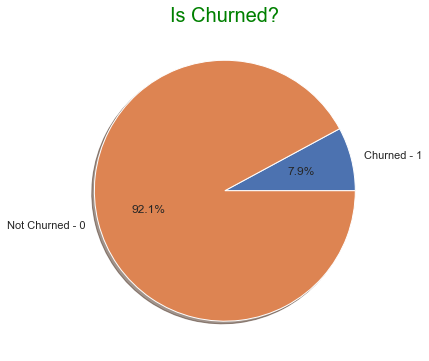

In [82]:
# Show the percentage of churned customers in September month in a plot format
sizes = [data['is_churned'].value_counts()[1], data['is_churned'].value_counts()[0]]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=['Churned - 1', 'Not Churned - 0'], autopct='%1.1f%%', shadow=True)
plt.title("Is Churned?", fontdict = {'fontsize' : 20, 'color':'green'})

In [83]:
for col in data.columns :
    print(col, data[data[col]== -1].shape[0], data[(data[col]== -1) & (data["is_churned"]== 1)].shape[0], sep=" : ")

circle_id : 0 : 0
arpu_6 : 1 : 0
arpu_7 : 1 : 0
arpu_8 : 6 : 5
onnet_mou_6 : 0 : 0
onnet_mou_7 : 0 : 0
onnet_mou_8 : 0 : 0
offnet_mou_6 : 0 : 0
offnet_mou_7 : 0 : 0
offnet_mou_8 : 0 : 0
roam_ic_mou_6 : 0 : 0
roam_ic_mou_7 : 0 : 0
roam_ic_mou_8 : 0 : 0
roam_og_mou_6 : 0 : 0
roam_og_mou_7 : 0 : 0
roam_og_mou_8 : 0 : 0
loc_og_t2t_mou_6 : 0 : 0
loc_og_t2t_mou_7 : 0 : 0
loc_og_t2t_mou_8 : 0 : 0
loc_og_t2m_mou_6 : 0 : 0
loc_og_t2m_mou_7 : 0 : 0
loc_og_t2m_mou_8 : 0 : 0
loc_og_t2f_mou_6 : 0 : 0
loc_og_t2f_mou_7 : 0 : 0
loc_og_t2f_mou_8 : 0 : 0
loc_og_t2c_mou_6 : 0 : 0
loc_og_t2c_mou_7 : 0 : 0
loc_og_t2c_mou_8 : 0 : 0
loc_og_mou_6 : 0 : 0
loc_og_mou_7 : 0 : 0
loc_og_mou_8 : 0 : 0
std_og_t2t_mou_6 : 0 : 0
std_og_t2t_mou_7 : 0 : 0
std_og_t2t_mou_8 : 0 : 0
std_og_t2m_mou_6 : 0 : 0
std_og_t2m_mou_7 : 0 : 0
std_og_t2m_mou_8 : 0 : 0
std_og_t2f_mou_6 : 0 : 0
std_og_t2f_mou_7 : 0 : 0
std_og_t2f_mou_8 : 0 : 0
std_og_t2c_mou_6 : 0 : 0
std_og_t2c_mou_7 : 0 : 0
std_og_t2c_mou_8 : 0 : 0
std_og_mou_6 : 0 : 

In [84]:
data.shape

(29681, 167)

In [85]:
# Rename columns aug_vbc_3g, jul_vbc_3g, and jun_vbc_3g columns
data.rename({'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6'}, axis=1, inplace=True)

In [86]:
data["circle_id"].value_counts()

109    29681
Name: circle_id, dtype: int64

In [87]:
# Drop circle_id as its values are uniform
data.drop("circle_id", axis=1, inplace=True)

### 5.1 Merge June and July columns into single column using average to reduce the features size

In [88]:
# Function to create a new column by adding columns of 6th and 7th months and then dropping columns of 6th and 7th months
def merge_june_july_cols(col_name) :
    col_6 = col_name+"_6"
    col_7 = col_name+"_7"
    data[col_name+"_avg_67"] = data[col_6] + data[col_7] / 2
    data.drop([col_6, col_7], axis=1, inplace=True)

In [89]:
# Loop through all columns ending with '_6' and call 'merge_june_july_cols' function
for col in list(data.filter(regex = '_6$')) :
                if(data[col].dtype != "object") :
                    merge_june_july_cols(col.replace("_6", ""))

In [90]:
print(data.shape)
data.dtypes

(29681, 114)


arpu_8                            float64
onnet_mou_8                       float64
offnet_mou_8                      float64
roam_ic_mou_8                     float64
roam_og_mou_8                     float64
loc_og_t2t_mou_8                  float64
loc_og_t2m_mou_8                  float64
loc_og_t2f_mou_8                  float64
loc_og_t2c_mou_8                  float64
loc_og_mou_8                      float64
std_og_t2t_mou_8                  float64
std_og_t2m_mou_8                  float64
std_og_t2f_mou_8                  float64
std_og_t2c_mou_8                  float64
std_og_mou_8                      float64
isd_og_mou_8                      float64
spl_og_mou_8                      float64
og_others_8                       float64
total_og_mou_8                    float64
loc_ic_t2t_mou_8                  float64
loc_ic_t2m_mou_8                  float64
loc_ic_t2f_mou_8                  float64
loc_ic_mou_8                      float64
std_ic_t2t_mou_8                  

In [91]:
data.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  29681.000000  29681.000000  29681.000000   29681.000000   29681.000000   
mean     511.362131    236.386669    338.045465      12.626307      20.070169   
std      503.109765    460.301812    483.144935      74.508675     105.261481   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
25%      235.042000     11.280000     49.460000       0.000000       0.000000   
50%      430.230000     67.160000    185.480000       0.000000       0.000000   
75%      663.900000    243.260000    442.030000       0.000000       0.000000   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      29681.000000      29681.000000      29681.000000      29681.000000   
mean          78.840957        153.129364          5.940312          1.717254   
std          228.457856        234.366035         19.590767          7.178374   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.790000         14.180000          0.000000          0.000000   
50%           21.240000         69.210000          0.000000          0.000000   
75%           72.930000        198.990000          3.980000          0.030000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  29681.000000      29681.000000      29681.000000      29681.000000   
mean     237.918564        149.871776        158.698123          1.600832   
std      364.520987        399.384930        410.616310         10.988961   
min        0.000000          0.000000          0.000000          0.000000   
25%       23.990000          0.000000          0.000000          0.000000   
50%      113.010000          0.780000         10.030000          0.000000   
75%      313.230000         80.310000        120.460000          0.000000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
count           29681.0  29681.000000  29681.000000  29681.000000   
mean                0.0    310.174099      1.969529      6.605333   
std                 0.0    611.172650     44.951919     20.370824   
min                 0.0      0.000000      0.000000      0.000000   
25%                 0.0      0.000000      0.000000      0.000000   
50%                 0.0     26.980000      0.000000      0.480000   
75%                 0.0    361.980000      0.000000      6.230000   
max                 0.0  13980.060000   5681.540000    954.510000   

        og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
count  29681.000000    29681.000000      29681.000000      29681.000000   
mean       0.058223      556.733357         63.221833        147.580849   
std        3.332943      701.850867        159.642406        215.533537   
min        0.000000        0.000000          0.000000          0.000000   
25%        0.000000       77.460000          5.210000         25.280000   
50%        0.000000      339.010000         23.110000         81.180000   
75%        0.000000      780.010000         65.690000        186.960000   
max      394.930000    14043.060000       4003.210000       4643.490000   

       loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
count      29681.000000  29681.000000      29681.000000      29681.000000   
mean          14.541442    225.353546         14.045511         28.167692   
std           43.511207    309.176065         71.701726        103.812300   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000     42.440000          0.000000          0.000000   
50%            1.760000    130.910000          0.160000          3.860000   
75%           11.34000

In [92]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(6).mul(100).sort_values(ascending=False)

avg_rech_amt_avg_67               0.0
total_ic_mou_8                    0.0
isd_ic_mou_8                      0.0
ic_others_8                       0.0
total_rech_num_8                  0.0
total_rech_amt_8                  0.0
max_rech_amt_8                    0.0
date_of_last_rech_6               0.0
date_of_last_rech_7               0.0
date_of_last_rech_8               0.0
last_day_rch_amt_8                0.0
date_of_last_rech_data_6          0.0
date_of_last_rech_data_7          0.0
date_of_last_rech_data_8          0.0
total_rech_data_8                 0.0
max_rech_data_8                   0.0
count_rech_2g_8                   0.0
count_rech_3g_8                   0.0
av_rech_amt_data_8                0.0
vol_2g_mb_8                       0.0
vol_3g_mb_8                       0.0
arpu_3g_8                         0.0
arpu_2g_8                         0.0
monthly_2g_8                      0.0
sachet_2g_8                       0.0
monthly_3g_8                      0.0
sachet_3g_8 

### 5.2 Remove columns that contain uniform data


In [93]:
# Get the columns containing single value and drop them as they are not useful for analysis
for col in data.columns:
    if((data[col]==0).sum() == len(data)):
        print(col)
        data.drop(col, axis=1, inplace=True)

std_og_t2c_mou_8
std_ic_t2o_mou_8
std_og_t2c_mou_avg_67
std_ic_t2o_mou_avg_67


In [94]:
data.shape

(29681, 110)

### 5.3 Derive new variables based on difference of 8th month with average of 6th and 7th months

In [95]:
# Create a new column ending with "-diff" by subtracting 8th month values with average of 6th and 7th months
for col in list(data.filter(regex = '_67$')) :
    data[col.replace("_avg_67", "_diff")] = data[col.replace("_avg_67", "_8")] - data[col]

In [96]:
data.shape

(29681, 161)

In [97]:
data.head(5)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0               0.00              0.00              0.00          0.00   
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
21              0.18            101.74              0.00        101.93   
23             13.38             43.91              0.00         57.29   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0             5.44           0.0          0.00         0.00                 2   
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
21          261.04           0.0          0.00         0.00                27   
23          298.33           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7  \
0                252             252          LaterMonth            MidMonth   
7               3638            1580          LaterMonth          LaterMonth   
8                120              30          LaterMonth          LaterMonth   
21               718              50          LaterMonth          LaterMonth   
23               439             179            MidMonth          EarlyMonth   

   date_of_last_rech_8  last_day_rch_amt_8 date_of_last_rech_data_6  \
0           EarlyMonth                 252               LaterMonth   
7           LaterMonth                 779          Never rechanged   
8           LaterMonth                  10          Never rechanged   
21          LaterMonth                  50      

In [98]:
data.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  29681.000000  29681.000000  29681.000000   29681.000000   29681.000000   
mean     511.362131    236.386669    338.045465      12.626307      20.070169   
std      503.109765    460.301812    483.144935      74.508675     105.261481   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
25%      235.042000     11.280000     49.460000       0.000000       0.000000   
50%      430.230000     67.160000    185.480000       0.000000       0.000000   
75%      663.900000    243.260000    442.030000       0.000000       0.000000   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      29681.000000      29681.000000      29681.000000      29681.000000   
mean          78.840957        153.129364          5.940312          1.717254   
std          228.457856        234.366035         19.590767          7.178374   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.790000         14.180000          0.000000          0.000000   
50%           21.240000         69.210000          0.000000          0.000000   
75%           72.930000        198.990000          3.980000          0.030000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  29681.000000      29681.000000      29681.000000      29681.000000   
mean     237.918564        149.871776        158.698123          1.600832   
std      364.520987        399.384930        410.616310         10.988961   
min        0.000000          0.000000          0.000000          0.000000   
25%       23.990000          0.000000          0.000000          0.000000   
50%      113.010000          0.780000         10.030000          0.000000   
75%      313.230000         80.310000        120.460000          0.000000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  29681.000000  29681.000000  29681.000000  29681.000000    29681.000000   
mean     310.174099      1.969529      6.605333      0.058223      556.733357   
std      611.172650     44.951919     20.370824      3.332943      701.850867   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000       77.460000   
50%       26.980000      0.000000      0.480000      0.000000      339.010000   
75%      361.980000      0.000000      6.230000      0.000000      780.010000   
max    13980.060000   5681.540000    954.510000    394.930000    14043.060000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      29681.000000      29681.000000      29681.000000  29681.000000   
mean          63.221833        147.580849         14.541442    225.353546   
std          159.642406        215.533537         43.511207    309.176065   
min            0.000000          0.000000          0.000000      0.000000   
25%            5.210000         25.280000          0.000000     42.440000   
50%           23.110000         81.180000          1.760000    130.910000   
75%           65.690000        186.960000         11.340000    287.230000   
max         4003.210000       4643.490000       1588.530000   5388.740000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      29681.000000      29681.000000      29681.000000  29681.000000   
mean          14.045511         28.167692          2.588349     44.804963   
std           71.701726        103.812300         20.002106    139.447836   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000         

### 5.4 Drop the variables related to average of June and July months.

This is done because we already have the difference of June and July months with respect to August and hence dropping the columns related to JUne and July

In [99]:
# Drop all the features ending with _67
data.drop(list(data.filter(regex = '_67')), axis = 1, inplace = True) 

In [100]:
data.shape

(29681, 110)

In [101]:
data.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  29681.000000  29681.000000  29681.000000   29681.000000   29681.000000   
mean     511.362131    236.386669    338.045465      12.626307      20.070169   
std      503.109765    460.301812    483.144935      74.508675     105.261481   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
25%      235.042000     11.280000     49.460000       0.000000       0.000000   
50%      430.230000     67.160000    185.480000       0.000000       0.000000   
75%      663.900000    243.260000    442.030000       0.000000       0.000000   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      29681.000000      29681.000000      29681.000000      29681.000000   
mean          78.840957        153.129364          5.940312          1.717254   
std          228.457856        234.366035         19.590767          7.178374   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.790000         14.180000          0.000000          0.000000   
50%           21.240000         69.210000          0.000000          0.000000   
75%           72.930000        198.990000          3.980000          0.030000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  29681.000000      29681.000000      29681.000000      29681.000000   
mean     237.918564        149.871776        158.698123          1.600832   
std      364.520987        399.384930        410.616310         10.988961   
min        0.000000          0.000000          0.000000          0.000000   
25%       23.990000          0.000000          0.000000          0.000000   
50%      113.010000          0.780000         10.030000          0.000000   
75%      313.230000         80.310000        120.460000          0.000000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  29681.000000  29681.000000  29681.000000  29681.000000    29681.000000   
mean     310.174099      1.969529      6.605333      0.058223      556.733357   
std      611.172650     44.951919     20.370824      3.332943      701.850867   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000       77.460000   
50%       26.980000      0.000000      0.480000      0.000000      339.010000   
75%      361.980000      0.000000      6.230000      0.000000      780.010000   
max    13980.060000   5681.540000    954.510000    394.930000    14043.060000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      29681.000000      29681.000000      29681.000000  29681.000000   
mean          63.221833        147.580849         14.541442    225.353546   
std          159.642406        215.533537         43.511207    309.176065   
min            0.000000          0.000000          0.000000      0.000000   
25%            5.210000         25.280000          0.000000     42.440000   
50%           23.110000         81.180000          1.760000    130.910000   
75%           65.690000        186.960000         11.340000    287.230000   
max         4003.210000       4643.490000       1588.530000   5388.740000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      29681.000000      29681.000000      29681.000000  29681.000000   
mean          14.045511         28.167692          2.588349     44.804963   
std           71.701726        103.812300         20.002106    139.447836   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000         

In [102]:
data.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0               0.00              0.00              0.00          0.00   
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
21              0.18            101.74              0.00        101.93   
23             13.38             43.91              0.00         57.29   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0             5.44           0.0          0.00         0.00                 2   
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
21          261.04           0.0          0.00         0.00                27   
23          298.33           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7  \
0                252             252          LaterMonth            MidMonth   
7               3638            1580          LaterMonth          LaterMonth   
8                120              30          LaterMonth          LaterMonth   
21               718              50          LaterMonth          LaterMonth   
23               439             179            MidMonth          EarlyMonth   

   date_of_last_rech_8  last_day_rch_amt_8 date_of_last_rech_data_6  \
0           EarlyMonth                 252               LaterMonth   
7           LaterMonth                 779          Never rechanged   
8           LaterMonth                  10          Never rechanged   
21          LaterMonth                  50      

### 5.3 Plot graphs for numeric variables ( with outliers )


In [103]:
print("Number of August features : ", len(list(data.filter(regex = '_8$'))))
print("Number of 'diff' features (averaged across months) : ", len(list(data.filter(regex = '_diff$'))))

## Two additional columns shown in August because of dates which are objects.

Number of August features :  53
Number of 'diff' features (averaged across months) :  51


In [104]:
# Dividing the list of features into four seperate buckets as drawing plots for all features at once takes lot of latency
cls = list(data.filter(regex = '_diff$'))
four_split = np.array_split(cls, 4)

In [105]:
# Draw the plots for the first half of numeric features
def draw_hist_box_plots(col_list) :
    rowsize = len(col_list)
    plt.figure(figsize=(15,32))
    for i, col in enumerate(col_list, 1):
        plt.subplot(rowsize,4,i*4-3) 
        plot = sns.histplot(data=data, x=col, kde=True)  # histogram for numerical variable
        plt.title(col, fontdict = {'fontsize' : 18, 'color':'green'})

        plt.subplot(rowsize,4,i*4-2)
        sns.boxplot(data=data, x=col);          # boxplot for numerical variable
        plt.title(col, fontdict = {'fontsize' : 18, 'color':'green'})

        # Get the name of August feature from June/July feature
        col8 = col.replace("_diff", "_8")

        plt.subplot(rowsize,4,i*4-1)
        plot = sns.histplot(data=data, x=col8, kde=True)  # histogram for numerical variable
        plt.title(col8, fontdict = {'fontsize' : 18, 'color':'green'})

        plt.subplot(rowsize,4,i*4)
        sns.boxplot(data=data, x=col8);          # boxplot for numerical variable
        plt.title(col8, fontdict = {'fontsize' : 18, 'color':'green'})
    plt.tight_layout()

####  **** Below 4 lines of code takes 20 minutes to execute, so, be patient and take a coffe break ***

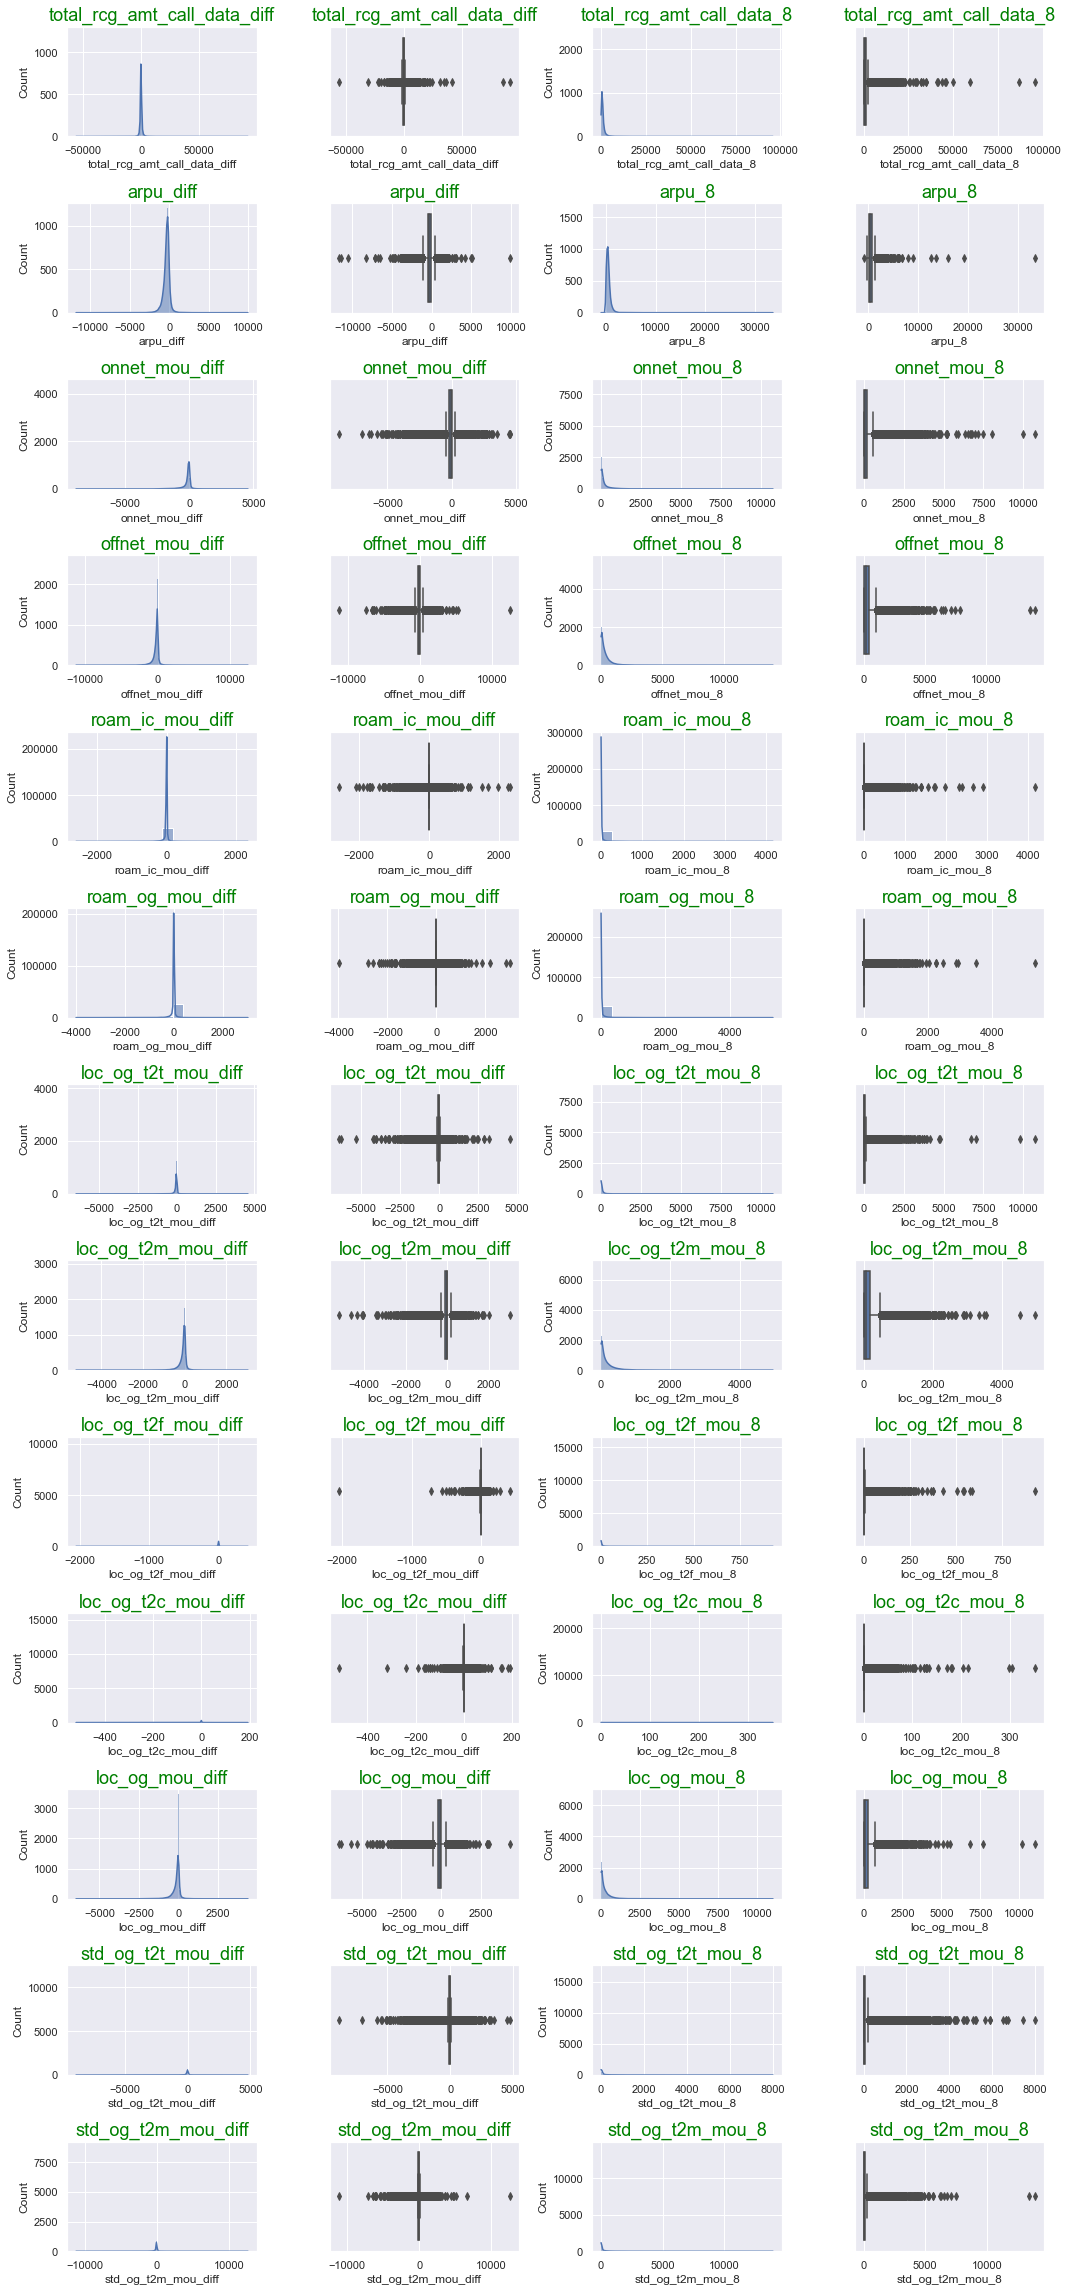

In [105]:
#draw_hist_box_plots(four_split[0])

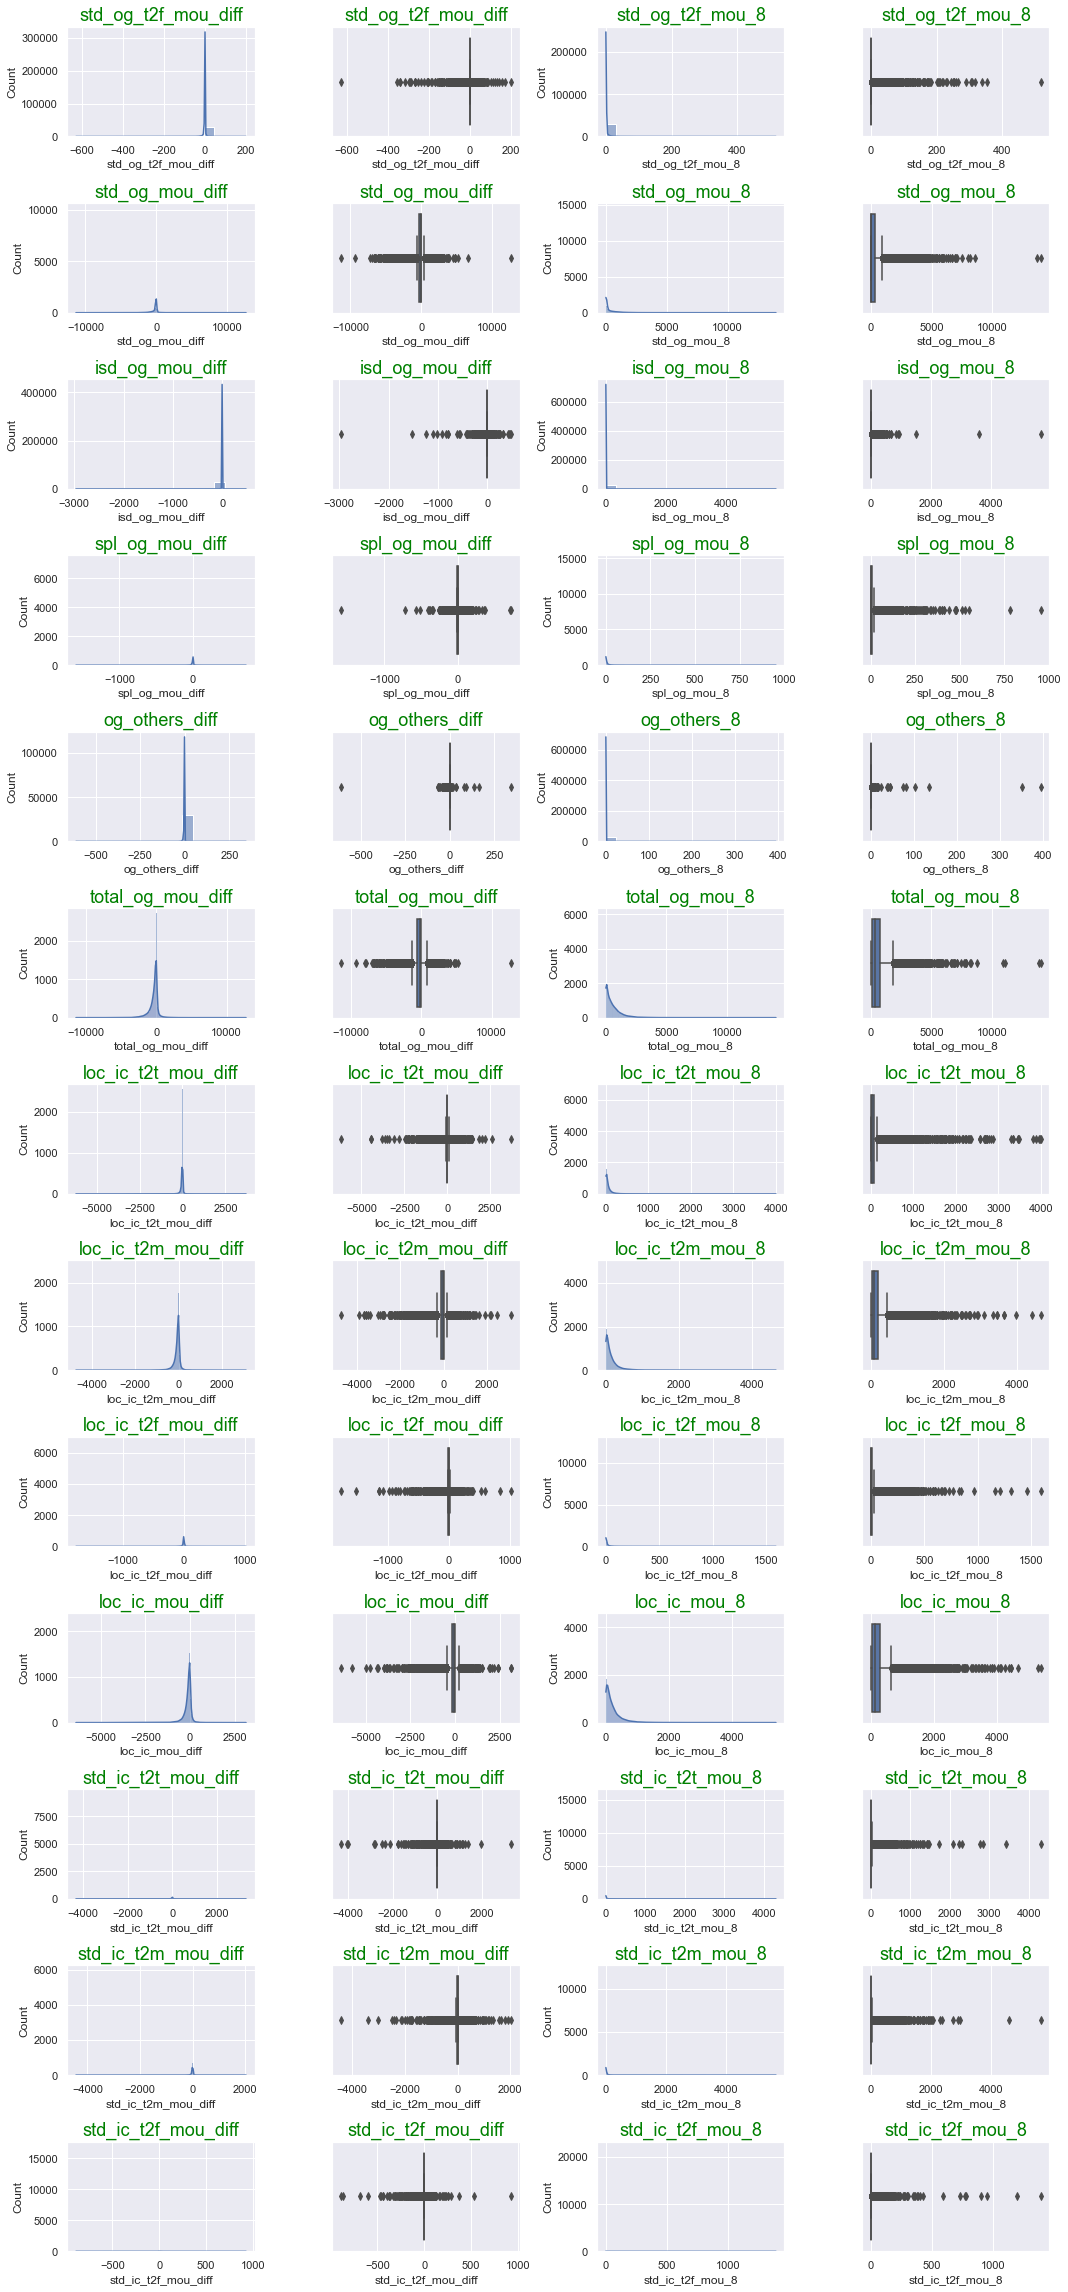

In [106]:
#draw_hist_box_plots(four_split[1])

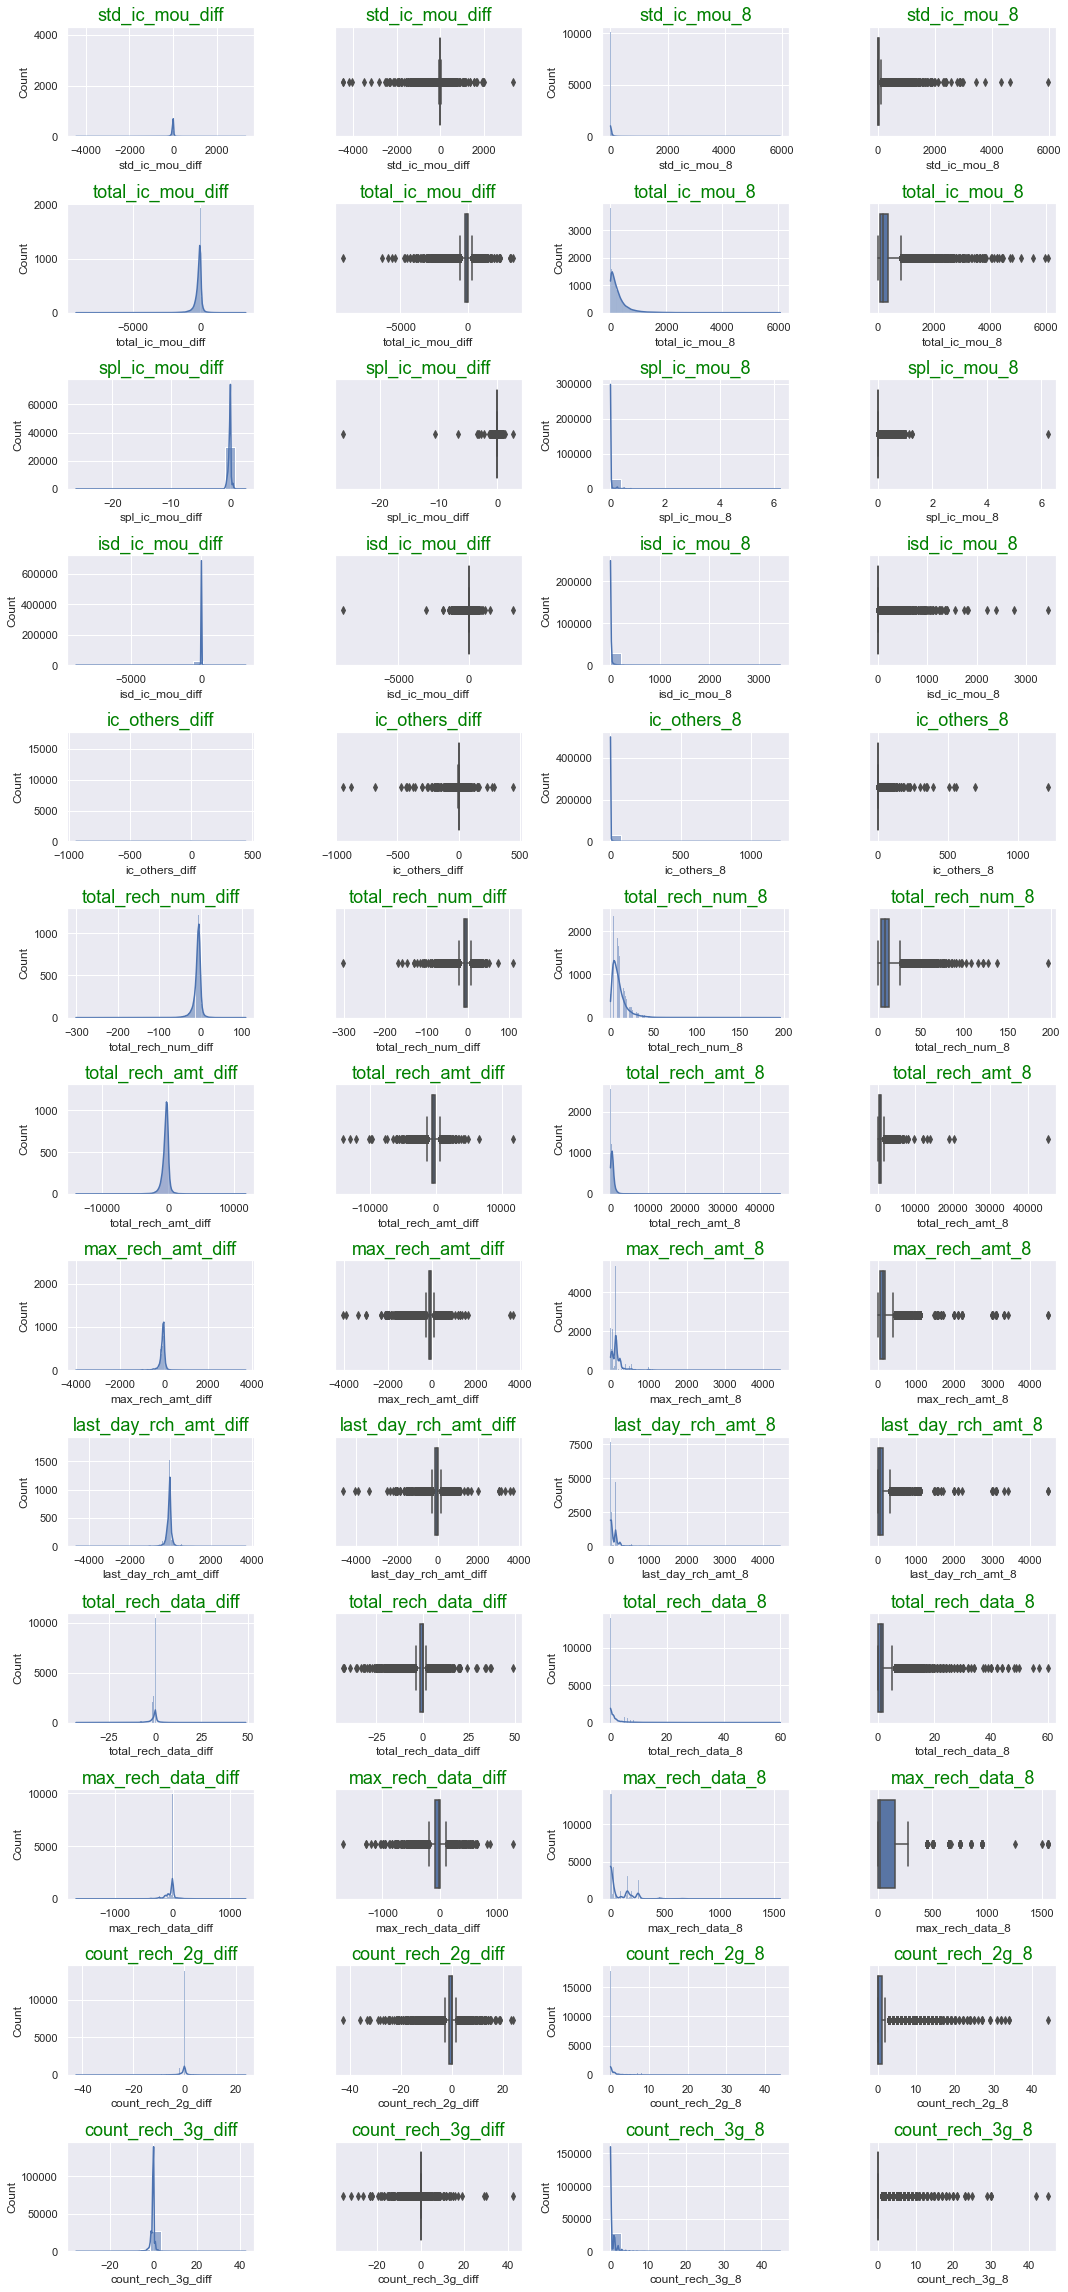

In [107]:
#draw_hist_box_plots(four_split[2])

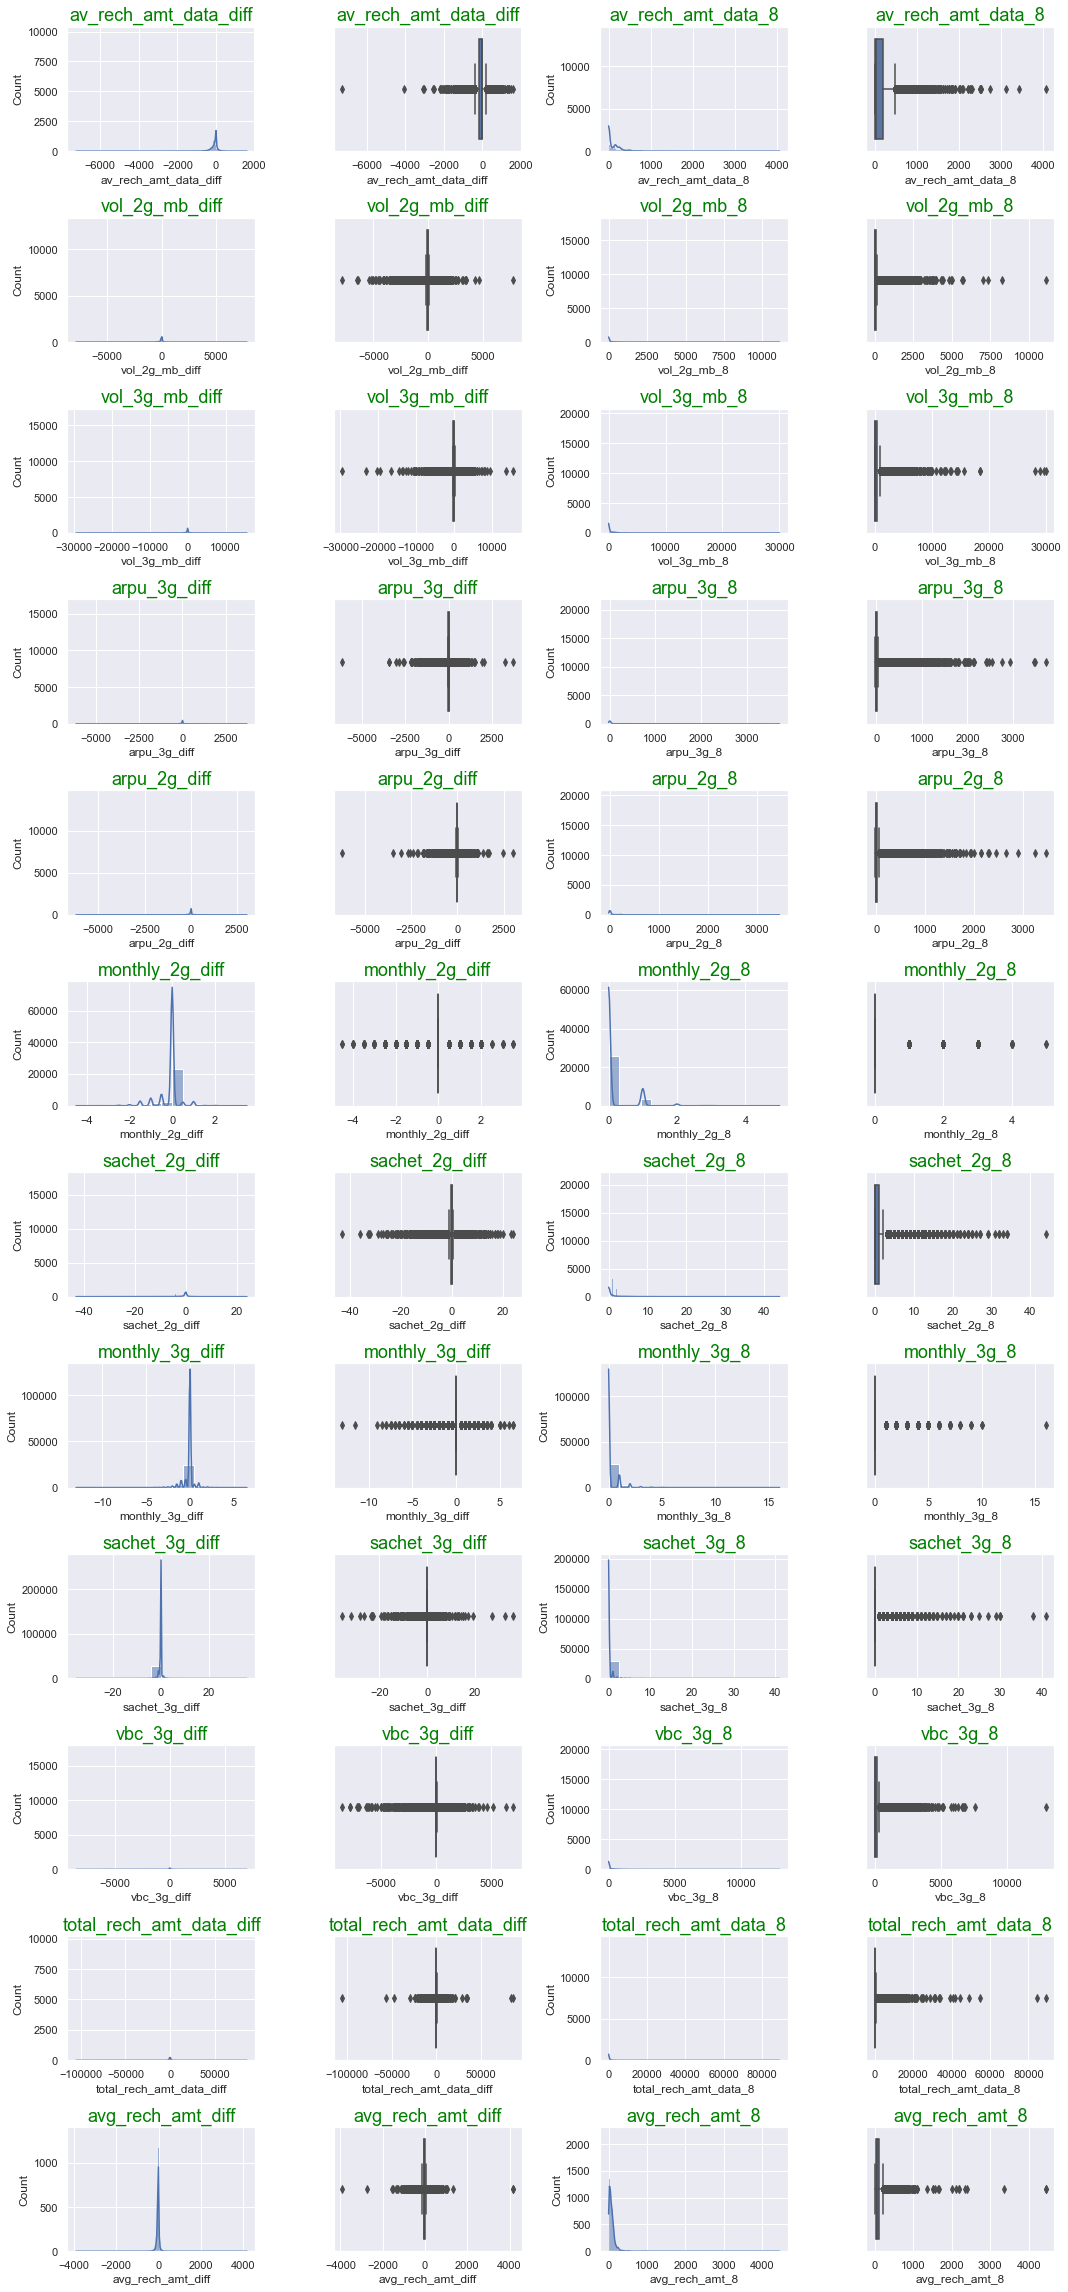

In [108]:
#draw_hist_box_plots(four_split[3])

### 5.4 Treat Outliers

In [106]:
# Define a method to replace outliers with values calculated at cut_off as 1.5 times IQR

def replace_with_iqr(col) :
    # calculate interquartile range
    q1, q3 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q3 - q1

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
        
    data[col] = data[col].apply(lambda x : lower if (x < lower and lower != 0) else upper if (x > upper and upper != 0) else x)
    #print(col, ":", round(lower,0), round(q1,0), round(q3,0), round(upper,0))

In [107]:
# Quantiles before treating values with IQR
data.quantile([.25, .5, .70, .75, .8, .9, .95, .99, 1], axis = 0)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0.25    235.042       11.280        49.460           0.00          0.000   
0.50    430.230       67.160       185.480           0.00          0.000   
0.70    604.592      184.860       374.480           0.00          0.000   
0.75    663.900      243.260       442.030           0.00          0.000   
0.80    737.970      327.540       530.260           0.00          0.000   
0.90    981.848      670.910       827.630          15.39         29.610   
0.95   1260.640     1078.930      1173.110          56.76        102.230   
0.99   1988.393     2163.254      2195.866         283.78        427.734   
1.00  33543.624    10752.560     14007.340        4169.81       5337.040   

      loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0.25             2.790             14.18              0.00              0.00   
0.50            21.240             69.21              0.00              0.00   
0.70            57.130            161.86              2.58              0.00   
0.75            72.930            198.99              3.98              0.03   
0.80            95.740            244.59              6.09              0.76   
0.90           180.190            400.91             15.31              4.65   
0.95           301.380            577.16             28.66              9.48   
0.99           917.336           1091.21             82.39             28.33   
1.00         10752.560           4961.33            928.49            351.83   

      loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0.25        23.990             0.000             0.000             0.000   
0.50       113.010             0.780            10.030             0.000   
0.70       258.480            42.060            77.980             0.000   
0.75       313.230            80.310           120.460             0.000   
0.80       380.290           145.860           184.380             0.000   
0.90       611.030           481.610           469.060             1.340   
0.95       863.630           895.780           848.340             6.000   
0.99      1670.934          1915.362          1899.942            35.392   
1.00     11039.910          8014.430         13950.040           516.910   

      std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0.25         0.000         0.000         0.000         0.00          77.460   
0.50        26.980         0.000         0.480         0.00         339.010   
0.70       239.480         0.000         4.430         0.00         665.660   
0.75       361.980         0.000         6.230         0.00         780.010   
0.80       519.760         0.000         8.600         0.00         915.930   
0.90      1009.610         0.000        17.690         0.00        1365.440   
0.95      1483.310         0.380        29.390         0.00        1867.590   
0.99      2775.386        29.046        71.044         0.00        3236.152   
1.00     13980.060      5681.540       954.510       394.93       14043.060   

      loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0.25             5.210            25.280              0.00        42.440   
0.50            23.110            81.180              1.76       130.910   
0.70            53.380           159.240              8.08       246.490   
0.75            65.690           186.960             11.34       287.230   
0.80            82.310           223.910             16.19       345.080   
0.90           141.430           354.410             36.94       539.860   
0.95           225.990           512.540             66.18       761.940   
0.99           630.822           984.442            185.20      1457.076   
1.00          4003.210          4643.490           1588.53      5388.740   

      std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0.25             0.000             0.000              0.00

In [108]:
# Replace outliers with IQR values
for col in cls :
    # Replace for derived features for 6th and 7th months
    replace_with_iqr(col)

    # Replace for 8th month features
    replace_with_iqr(col.replace("_diff", "_8"))

In [109]:
# Quantiles after treating values with IQR
data.quantile([.25, .5, .70, .75, .8, .9, .95, .99, 1], axis = 0)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0.25   235.042        11.28        49.460           0.00          0.000   
0.50   430.230        67.16       185.480           0.00          0.000   
0.70   604.592       184.86       374.480           0.00          0.000   
0.75   663.900       243.26       442.030           0.00          0.000   
0.80   737.970       327.54       530.260           0.00          0.000   
0.90   981.848       591.23       827.630          15.39         29.610   
0.95  1260.640       591.23      1030.885          56.76        102.230   
0.99  1307.187       591.23      1030.885         283.78        427.734   
1.00  1307.187       591.23      1030.885        4169.81       5337.040   

      loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0.25              2.79            14.180              0.00             0.000   
0.50             21.24            69.210              0.00             0.000   
0.70             57.13           161.860              2.58             0.000   
0.75             72.93           198.990              3.98             0.030   
0.80             95.74           244.590              6.09             0.075   
0.90            178.14           400.910              9.95             0.075   
0.95            178.14           476.205              9.95             0.075   
0.99            178.14           476.205              9.95             0.075   
1.00            178.14           476.205              9.95             0.075   

      loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0.25         23.99             0.000              0.00             0.000   
0.50        113.01             0.780             10.03             0.000   
0.70        258.48            42.060             77.98             0.000   
0.75        313.23            80.310            120.46             0.000   
0.80        380.29           145.860            184.38             0.000   
0.90        611.03           200.775            301.15             1.340   
0.95        747.09           200.775            301.15             6.000   
0.99        747.09           200.775            301.15            35.392   
1.00        747.09           200.775            301.15           516.910   

      std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0.25          0.00         0.000         0.000         0.00          77.460   
0.50         26.98         0.000         0.480         0.00         339.010   
0.70        239.48         0.000         4.430         0.00         665.660   
0.75        361.98         0.000         6.230         0.00         780.010   
0.80        519.76         0.000         8.600         0.00         915.930   
0.90        904.95         0.000        15.575         0.00        1365.440   
0.95        904.95         0.380        15.575         0.00        1833.835   
0.99        904.95        29.046        15.575         0.00        1833.835   
1.00        904.95      5681.540        15.575       394.93        1833.835   

      loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0.25              5.21             25.28              0.00        42.440   
0.50             23.11             81.18              1.76       130.910   
0.70             53.38            159.24              8.08       246.490   
0.75             65.69            186.96             11.34       287.230   
0.80             82.31            223.91             16.19       345.080   
0.90            141.43            354.41             28.35       539.860   
0.95            156.41            429.48             28.35       654.415   
0.99            156.41            429.48             28.35       654.415   
1.00            156.41            429.48             28.35       654.415   

      std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0.25             0.000              0.00             0.000         

In [110]:
data.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  29681.000000  29681.000000  29681.000000   29681.000000   29681.000000   
mean     485.261173    162.950565    295.243326      12.626307      20.070169   
std      337.108167    200.928829    307.903036      74.508675     105.261481   
min     -408.245000      0.000000      0.000000       0.000000       0.000000   
25%      235.042000     11.280000     49.460000       0.000000       0.000000   
50%      430.230000     67.160000    185.480000       0.000000       0.000000   
75%      663.900000    243.260000    442.030000       0.000000       0.000000   
max     1307.187000    591.230000   1030.885000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      29681.000000      29681.000000      29681.000000      29681.000000   
mean          48.430176        130.303330          2.486862          0.018744   
std           59.020039        147.771646          3.704735          0.032350   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.790000         14.180000          0.000000          0.000000   
50%           21.240000         69.210000          0.000000          0.000000   
75%           72.930000        198.990000          3.980000          0.030000   
max          178.140000        476.205000          9.950000          0.075000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  29681.000000      29681.000000      29681.000000      29681.000000   
mean     204.690033         50.554585         76.779630          1.600832   
std      228.566050         78.072900        111.415663         10.988961   
min        0.000000          0.000000          0.000000          0.000000   
25%       23.990000          0.000000          0.000000          0.000000   
50%      113.010000          0.780000         10.030000          0.000000   
75%      313.230000         80.310000        120.460000          0.000000   
max      747.090000        200.775000        301.150000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  29681.000000  29681.000000  29681.000000  29681.000000    29681.000000   
mean     223.122501      1.969529      3.851482      0.058223      512.202564   
std      323.365577     44.951919      5.508886      3.332943      528.811578   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000       77.460000   
50%       26.980000      0.000000      0.480000      0.000000      339.010000   
75%      361.980000      0.000000      6.230000      0.000000      780.010000   
max      904.950000   5681.540000     15.575000    394.930000     1833.835000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      29681.000000      29681.000000      29681.000000  29681.000000   
mean          43.771676        126.466382          7.334888    196.409841   
std           49.582891        128.524784         10.111756    195.102832   
min            0.000000          0.000000          0.000000      0.000000   
25%            5.210000         25.280000          0.000000     42.440000   
50%           23.110000         81.180000          1.760000    130.910000   
75%           65.690000        186.960000         11.340000    287.230000   
max          156.410000        429.480000         28.350000    654.415000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      29681.000000      29681.000000      29681.000000  29681.000000   
mean           4.500931         14.196995          0.068009     25.331048   
std            6.717339         19.221911          0.117575     32.449214   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000         

In [111]:
data.shape

(29681, 110)

### 5.5 Plot graphs for numeric variables ( without outliers )


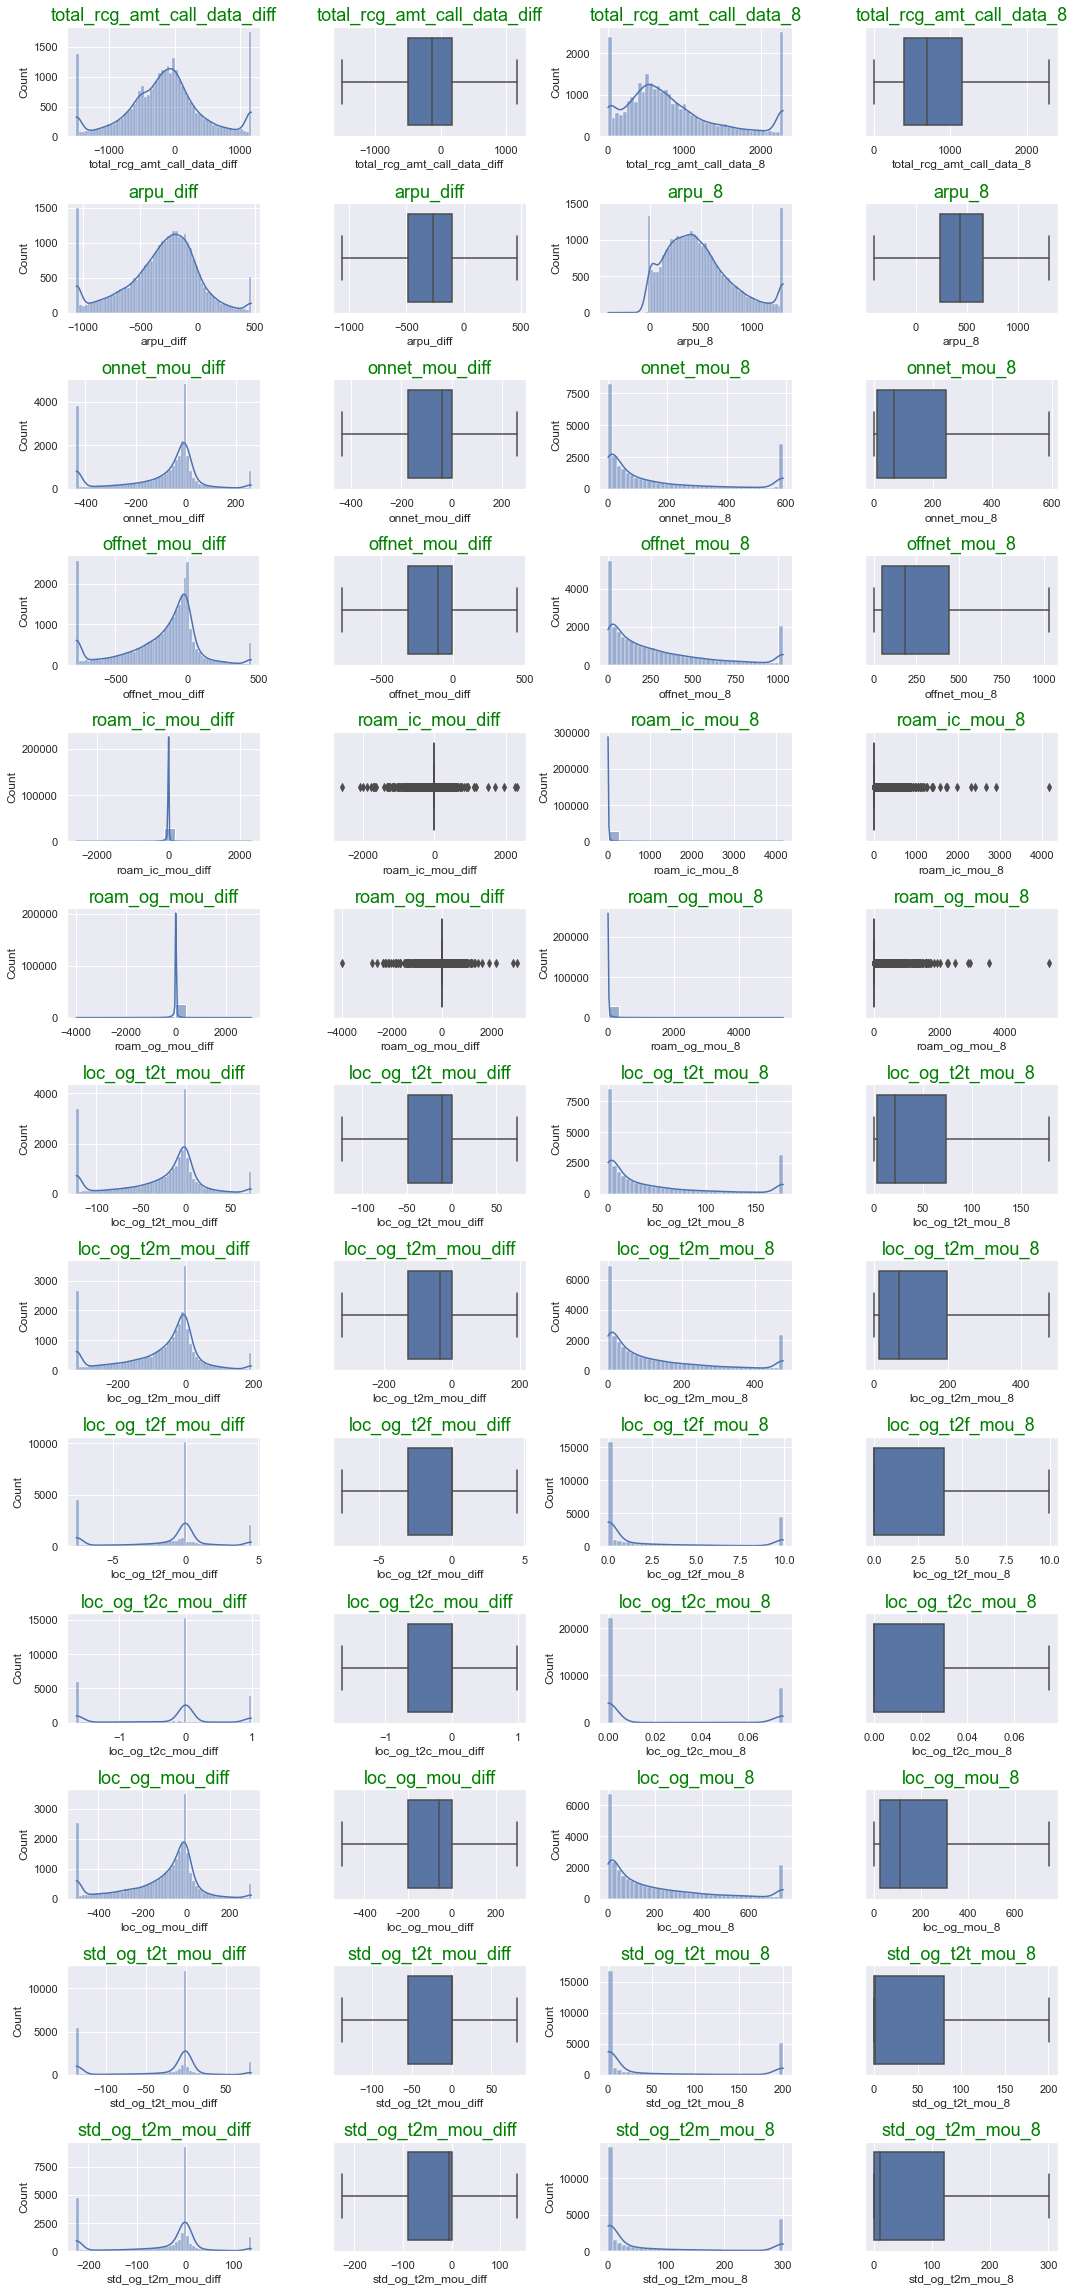

In [115]:
#draw_hist_box_plots(four_split[0])

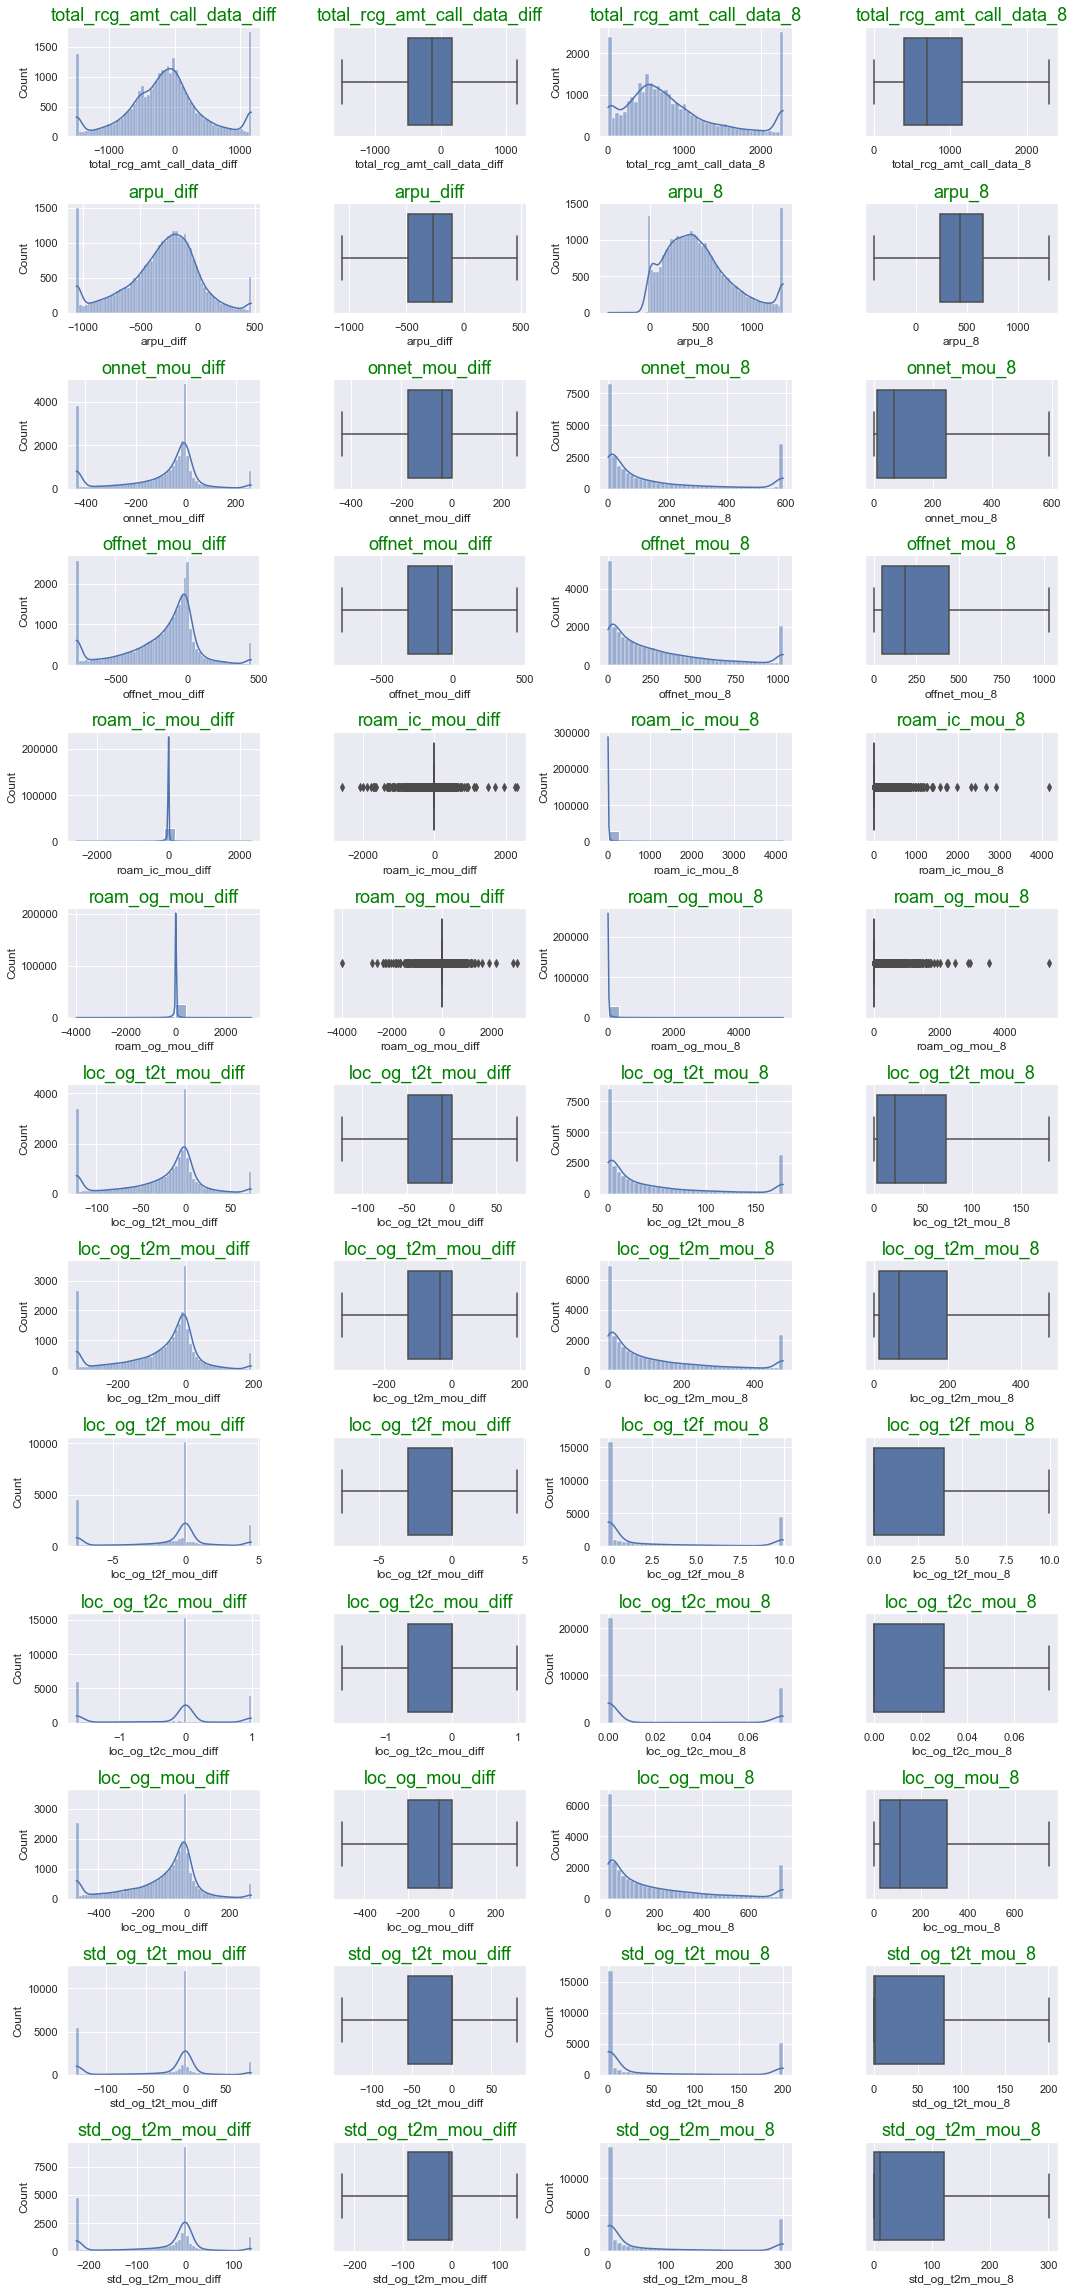

In [116]:
#draw_hist_box_plots(four_split[0])

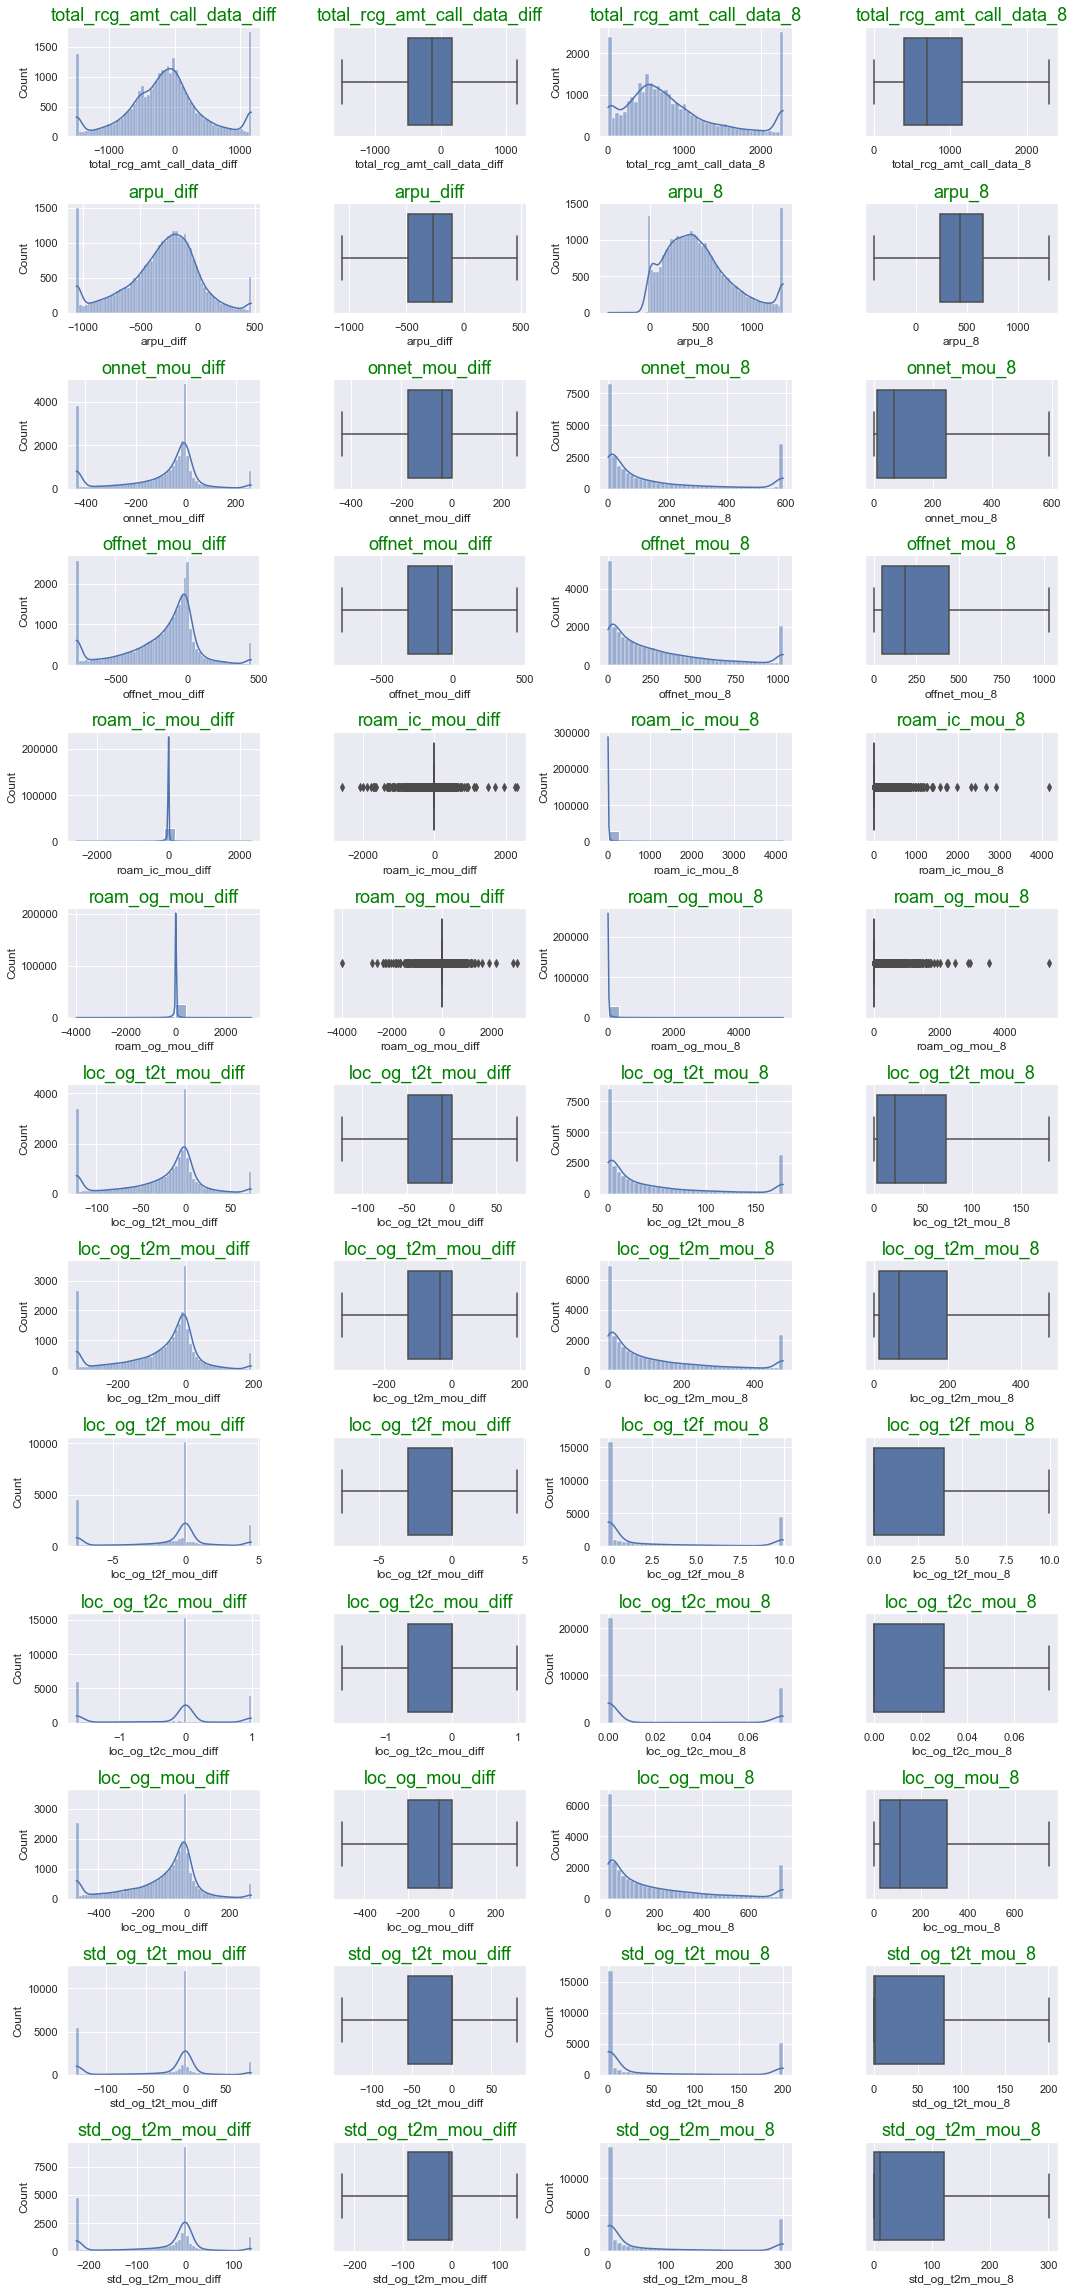

In [117]:
#draw_hist_box_plots(four_split[0])

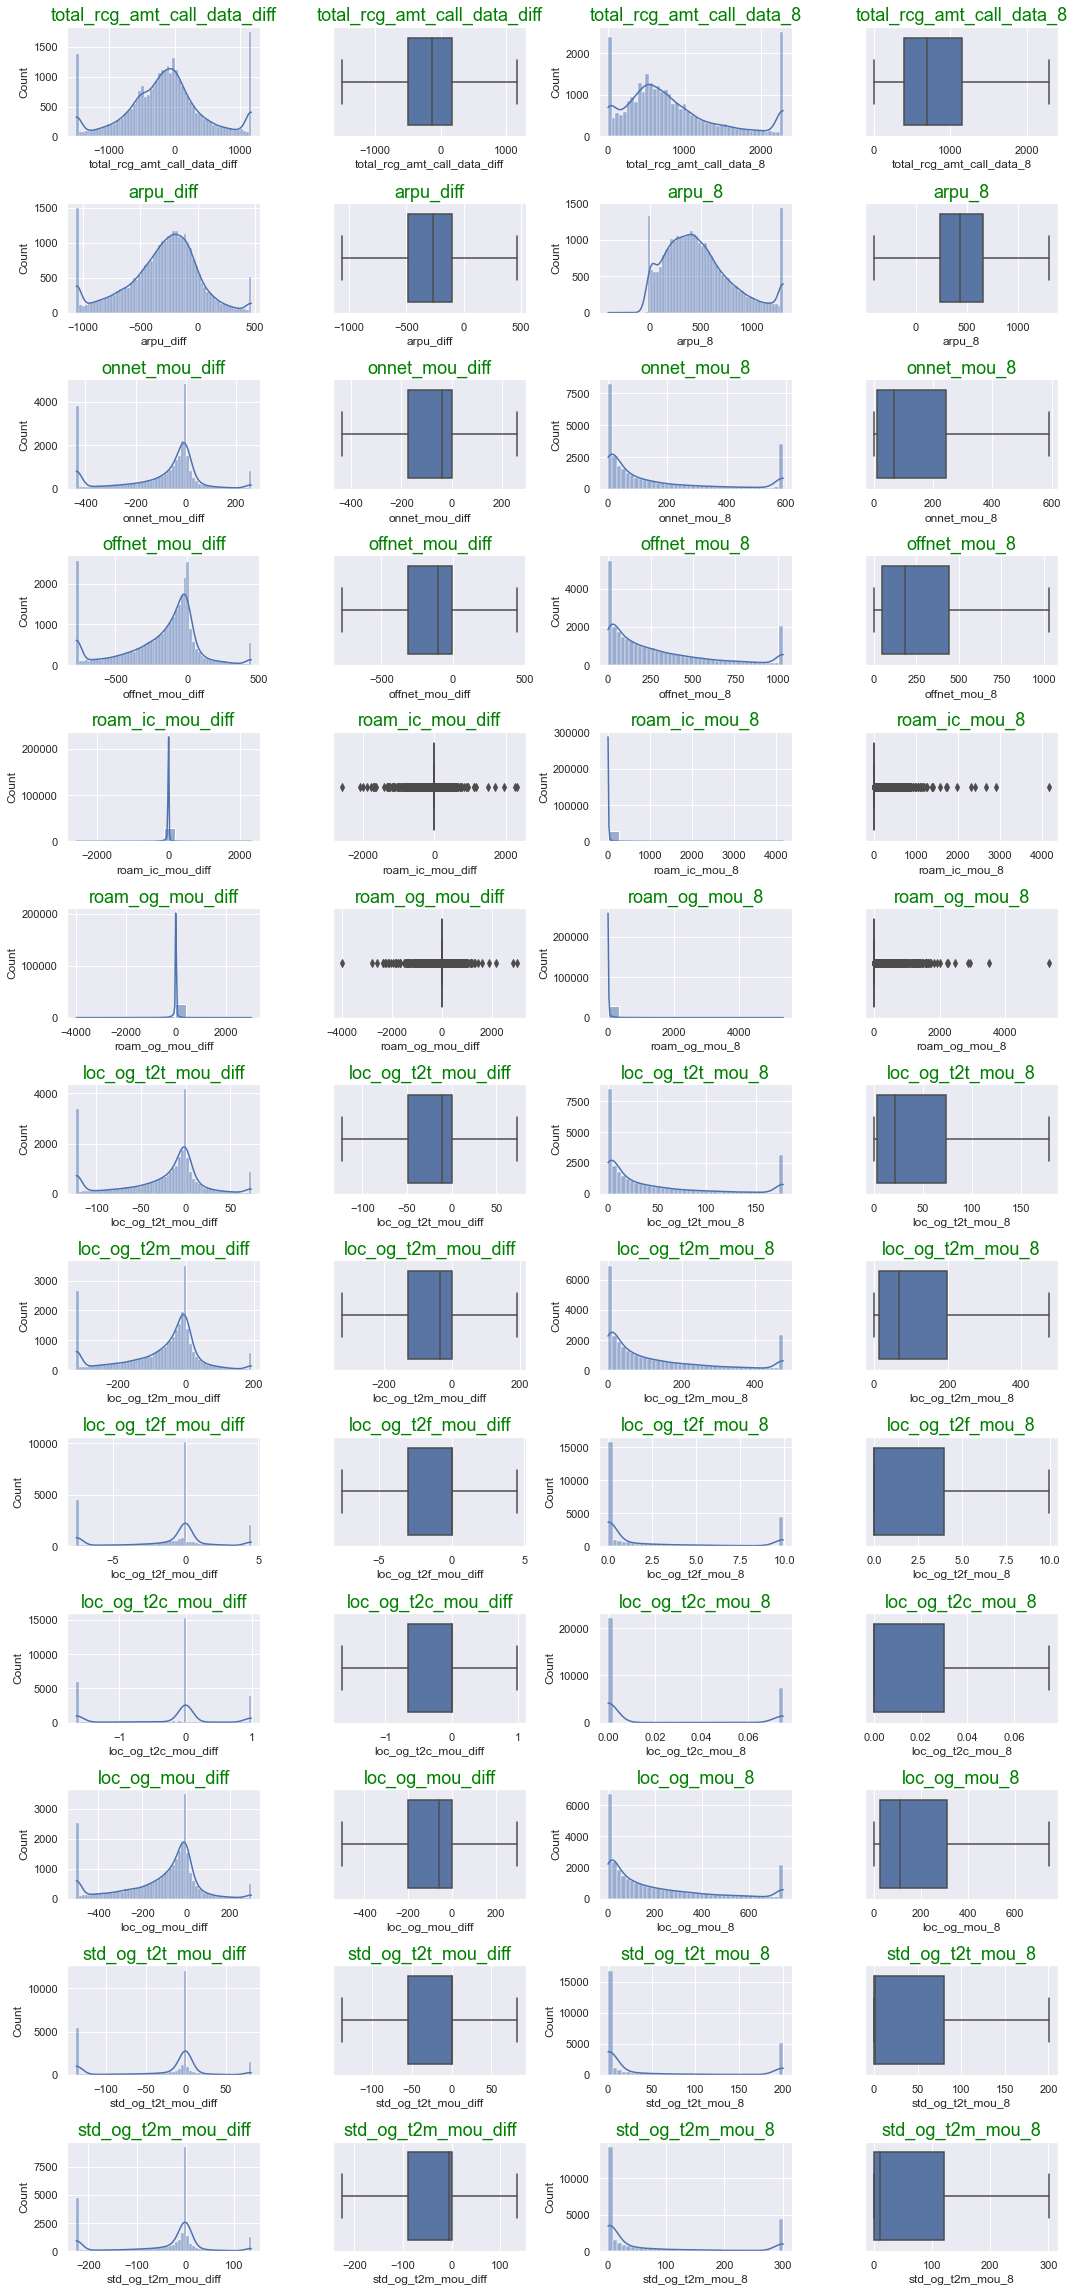

In [118]:
#draw_hist_box_plots(four_split[0])

In [431]:
# Get the null value percentages for each feature in descending order
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

avg_rech_amt_diff               0.0
total_rech_data_8               0.0
ic_others_8                     0.0
total_rech_num_8                0.0
total_rech_amt_8                0.0
max_rech_amt_8                  0.0
date_of_last_rech_6             0.0
date_of_last_rech_7             0.0
date_of_last_rech_8             0.0
last_day_rch_amt_8              0.0
date_of_last_rech_data_6        0.0
date_of_last_rech_data_7        0.0
date_of_last_rech_data_8        0.0
max_rech_data_8                 0.0
spl_ic_mou_8                    0.0
count_rech_2g_8                 0.0
count_rech_3g_8                 0.0
av_rech_amt_data_8              0.0
vol_2g_mb_8                     0.0
vol_3g_mb_8                     0.0
arpu_3g_8                       0.0
arpu_2g_8                       0.0
monthly_2g_8                    0.0
sachet_2g_8                     0.0
monthly_3g_8                    0.0
sachet_3g_8                     0.0
isd_ic_mou_8                    0.0
total_ic_mou_8              

### 5.6 Plot graphs for categorical variables

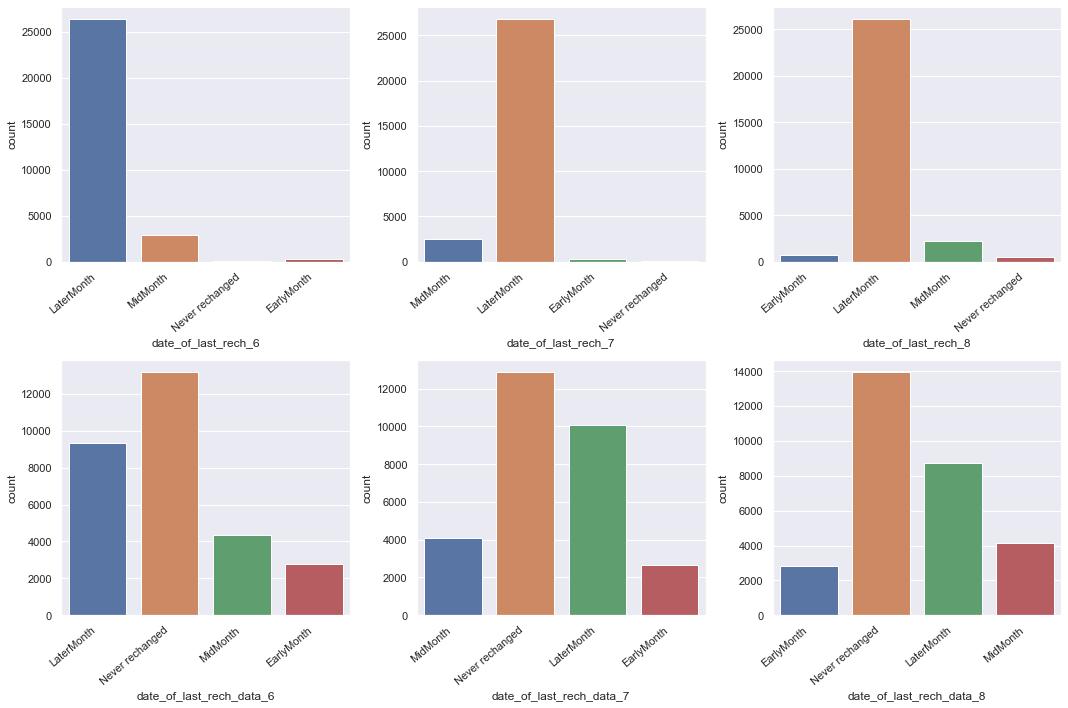

In [112]:
# Draw the graphs for all categoric variables
obj_cols = ['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8',
            "date_of_last_rech_data_6", "date_of_last_rech_data_7","date_of_last_rech_data_8"]
plt.figure(figsize=(15,10))
for i, col in enumerate(obj_cols, 1):
    plt.subplot(2,3,i) 
    plot = sns.countplot(x=col, data=data)                            
    plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right") 
plt.tight_layout()

# 6. Bivariate Analysis

### 6.1 Plot the graphs between categorical variables and "is_churned"

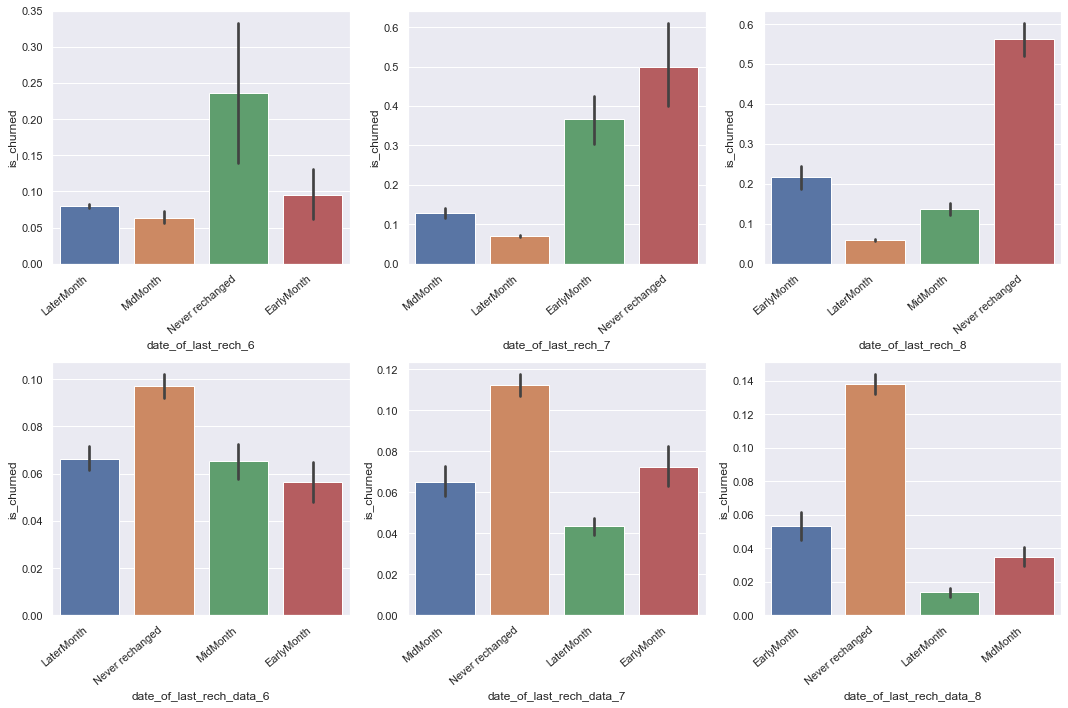

In [113]:
plt.figure(figsize=(15,10))
for i, col in enumerate(obj_cols, 1):
    plt.subplot(2,3,i) 
    plot = sns.barplot(x=col, data=data, y = "is_churned")                            
    plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right") 
plt.tight_layout()

### 6.2 Correlation between different variables

In [114]:
# Divide the list of features into two seperate buckets as drawing plots for all features at once takes lot of latency

cls_8 = list(data.filter(regex = '_8$'))
two_split = np.array_split(cls_8, 2)

<AxesSubplot:>

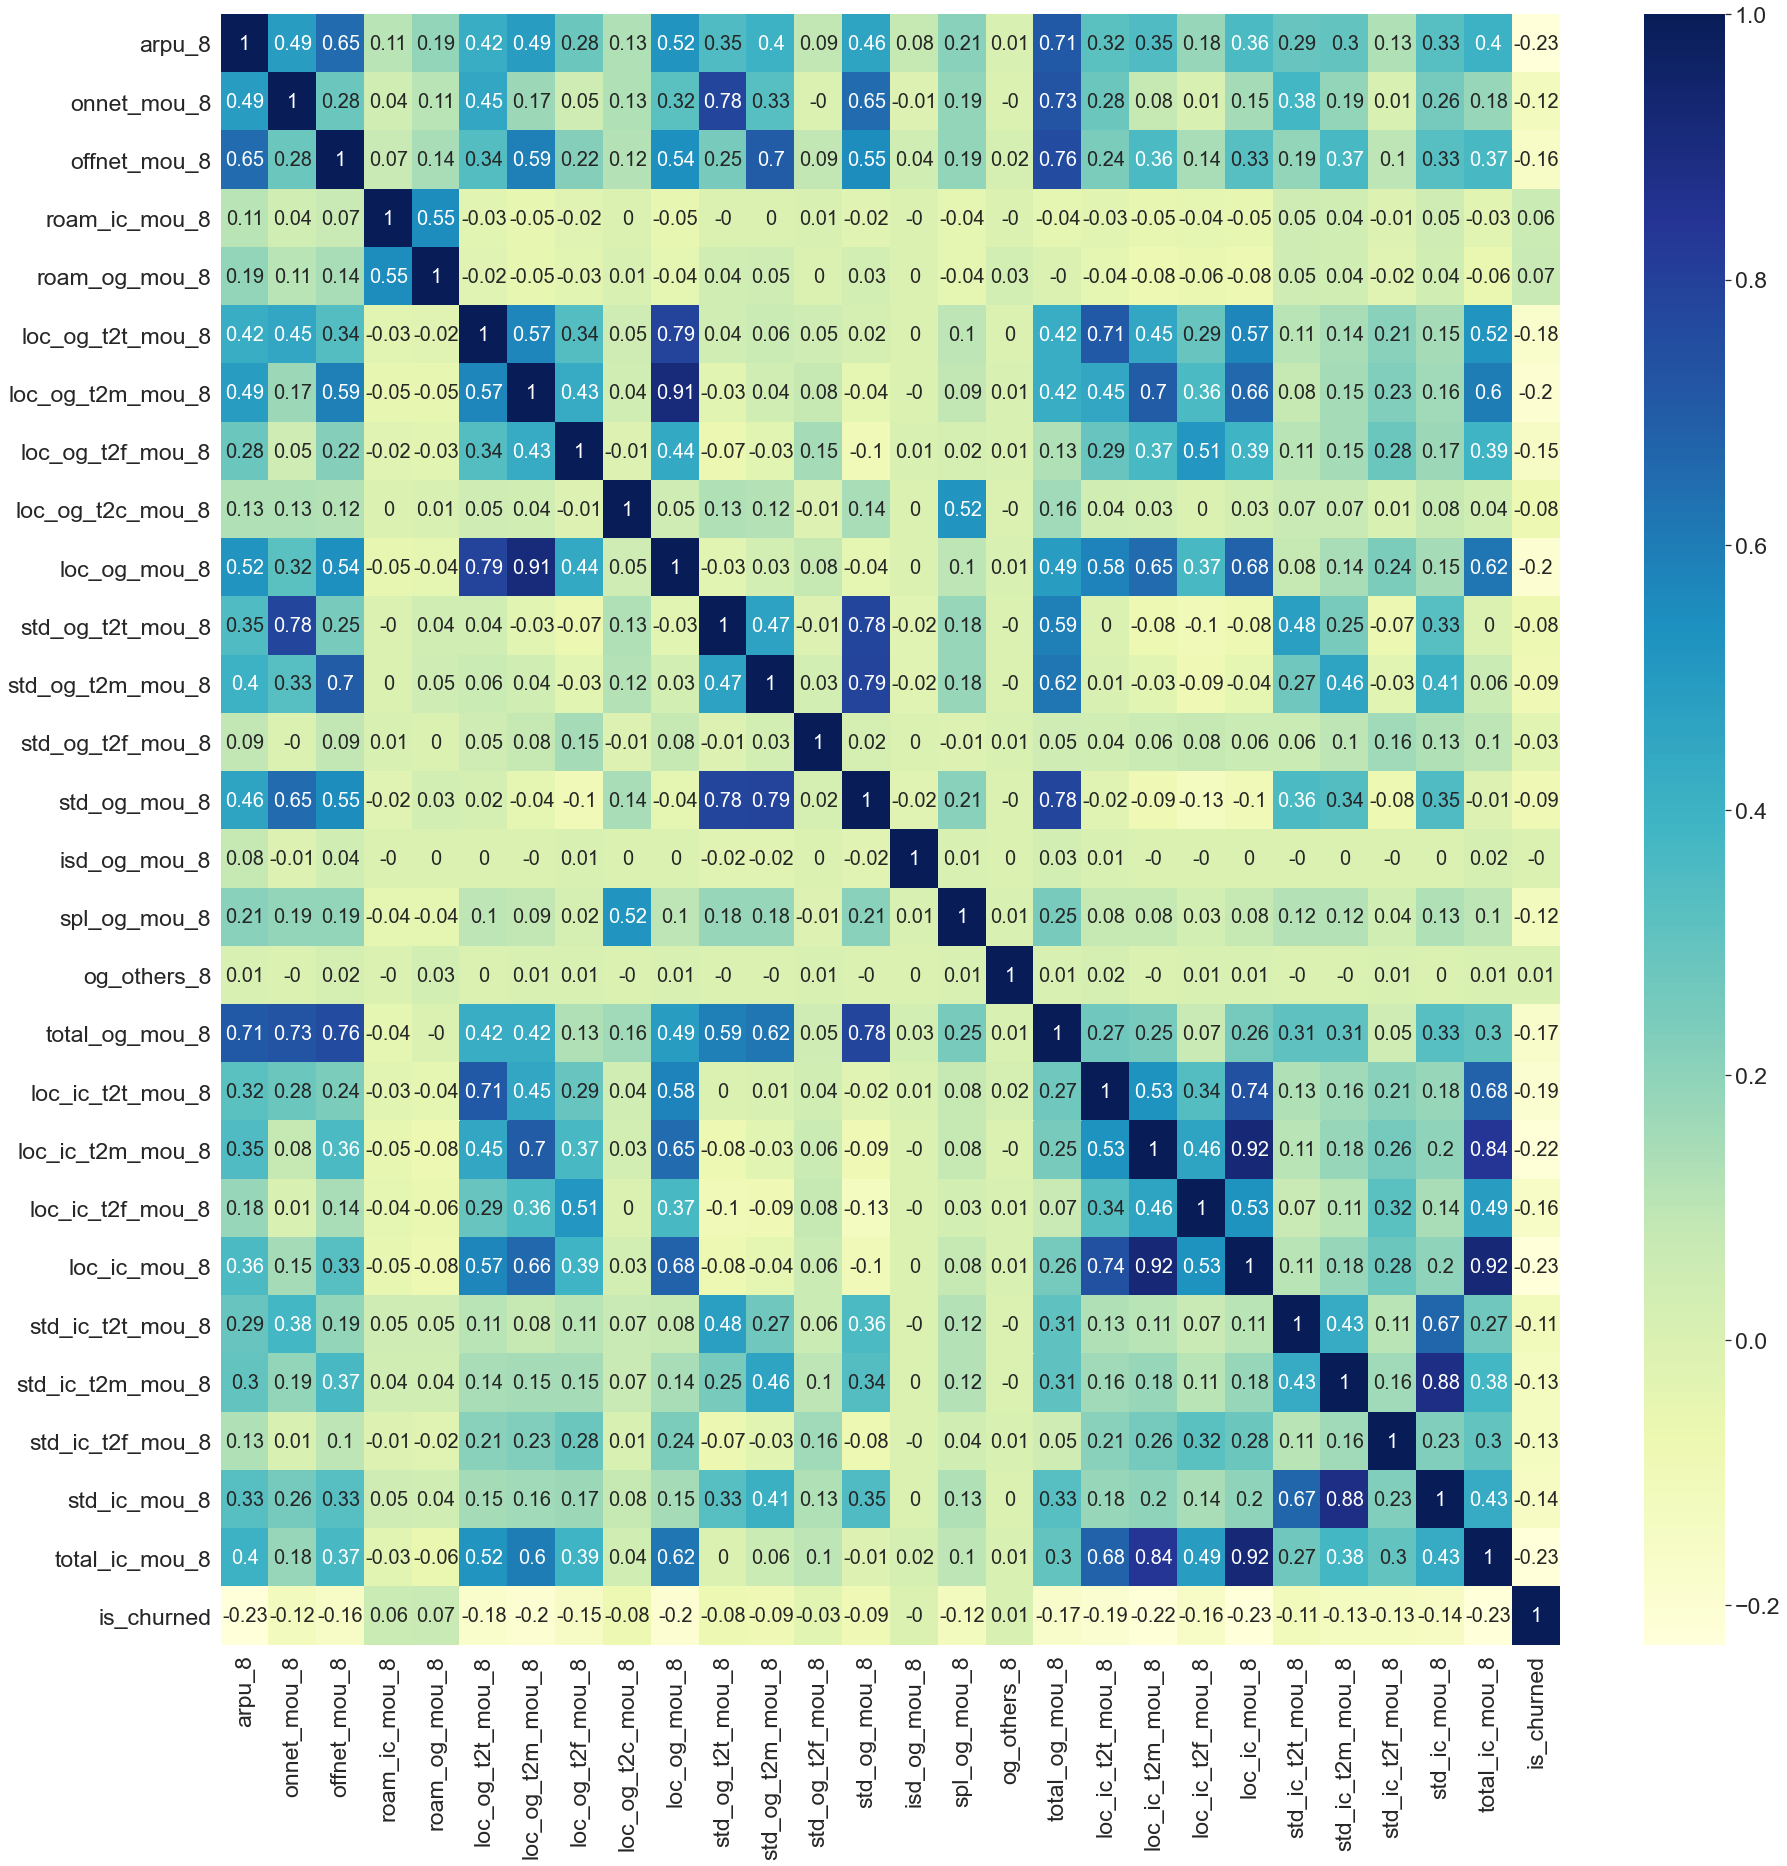

In [115]:
# Check the correlation betweeen different variables of first half of features in August
sns.set(font_scale=2.1)
plt.figure(figsize=(30, 30))
sns.heatmap(round(data[np.append(two_split[0], "is_churned")].corr(),2), 
            annot=True, cmap="YlGnBu", annot_kws={"size":20})

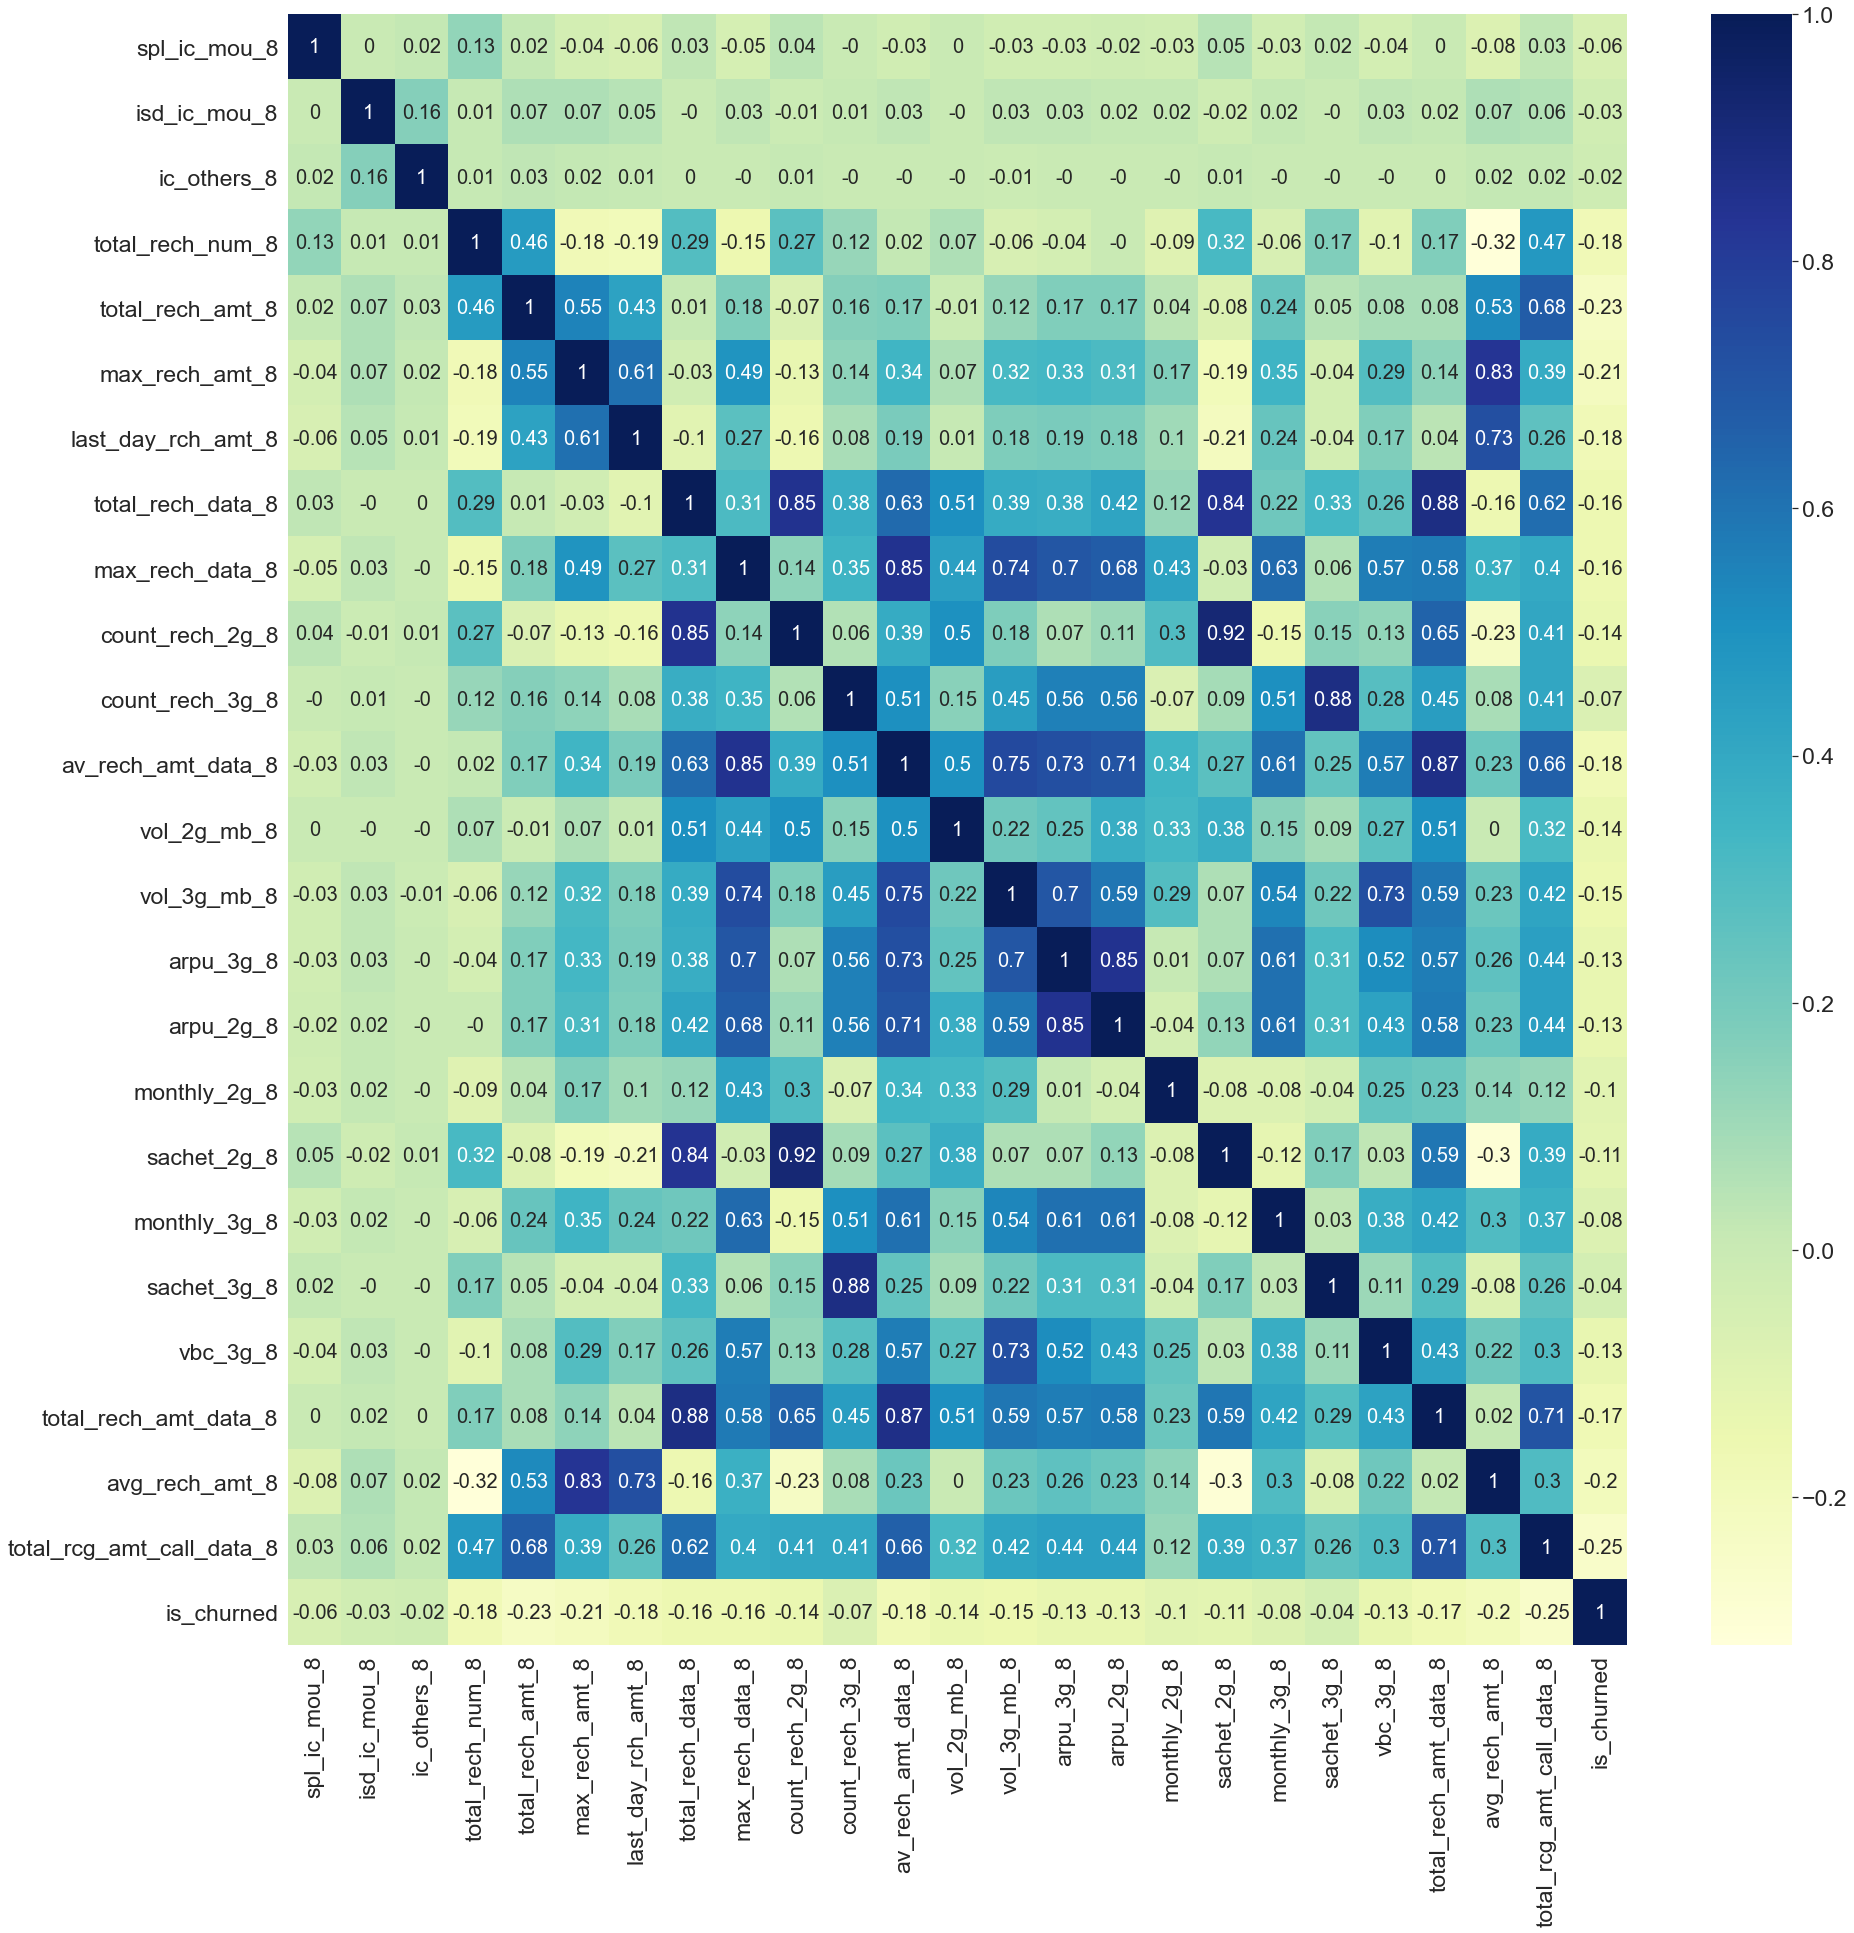

In [116]:
# Check the correlation betweeen different variables of first half of features in August
plt.figure(figsize=(30, 30))
sns.heatmap(round(data[np.append(two_split[1], "is_churned")].corr(),2), 
            annot=True, cmap="YlGnBu", annot_kws={"size":20})
sns.set(font_scale=2.1)

### 6.3 Since we cannot plot all variables in the heatmap, identify the important variables.

Since all kinds of incoming and outgoing calls are covered in 'total_ic_mou' and 'total_og_mou', we consider all other data related to incoming and outgoing as secondary variables.

In [117]:
cls_8_basic = ['arpu_8','arpu_2g_8','arpu_3g_8','av_rech_amt_data_8','avg_rech_amt_8','count_rech_2g_8',
                'count_rech_3g_8','monthly_2g_8','monthly_3g_8','total_ic_mou_8','total_og_mou_8',
                'total_rcg_amt_call_data_8','total_rech_amt_8','total_rech_amt_data_8','total_rech_data_8',
                'total_rech_num_8','vbc_3g_8','vol_2g_mb_8','vol_3g_mb_8','isd_ic_mou_8','isd_og_mou_8', 'max_rech_amt_8']

cls_8_secondary = [x for x in list(data.filter(regex = '_8$')) if x not in cls_8_basic]

# Remove categorical variables from the list
cls_8_secondary.remove("date_of_last_rech_8")

print(len(cls_8_basic))
print(len(cls_8_secondary))

cls_diff_basic = [sub.replace('_8', '_diff') for sub in cls_8_basic]
cls_diff_secondary = [x for x in list(data.filter(regex = '_diff')) if x not in cls_diff_basic]

print(len(cls_diff_basic))
print(len(cls_diff_secondary))

22
30
22
29


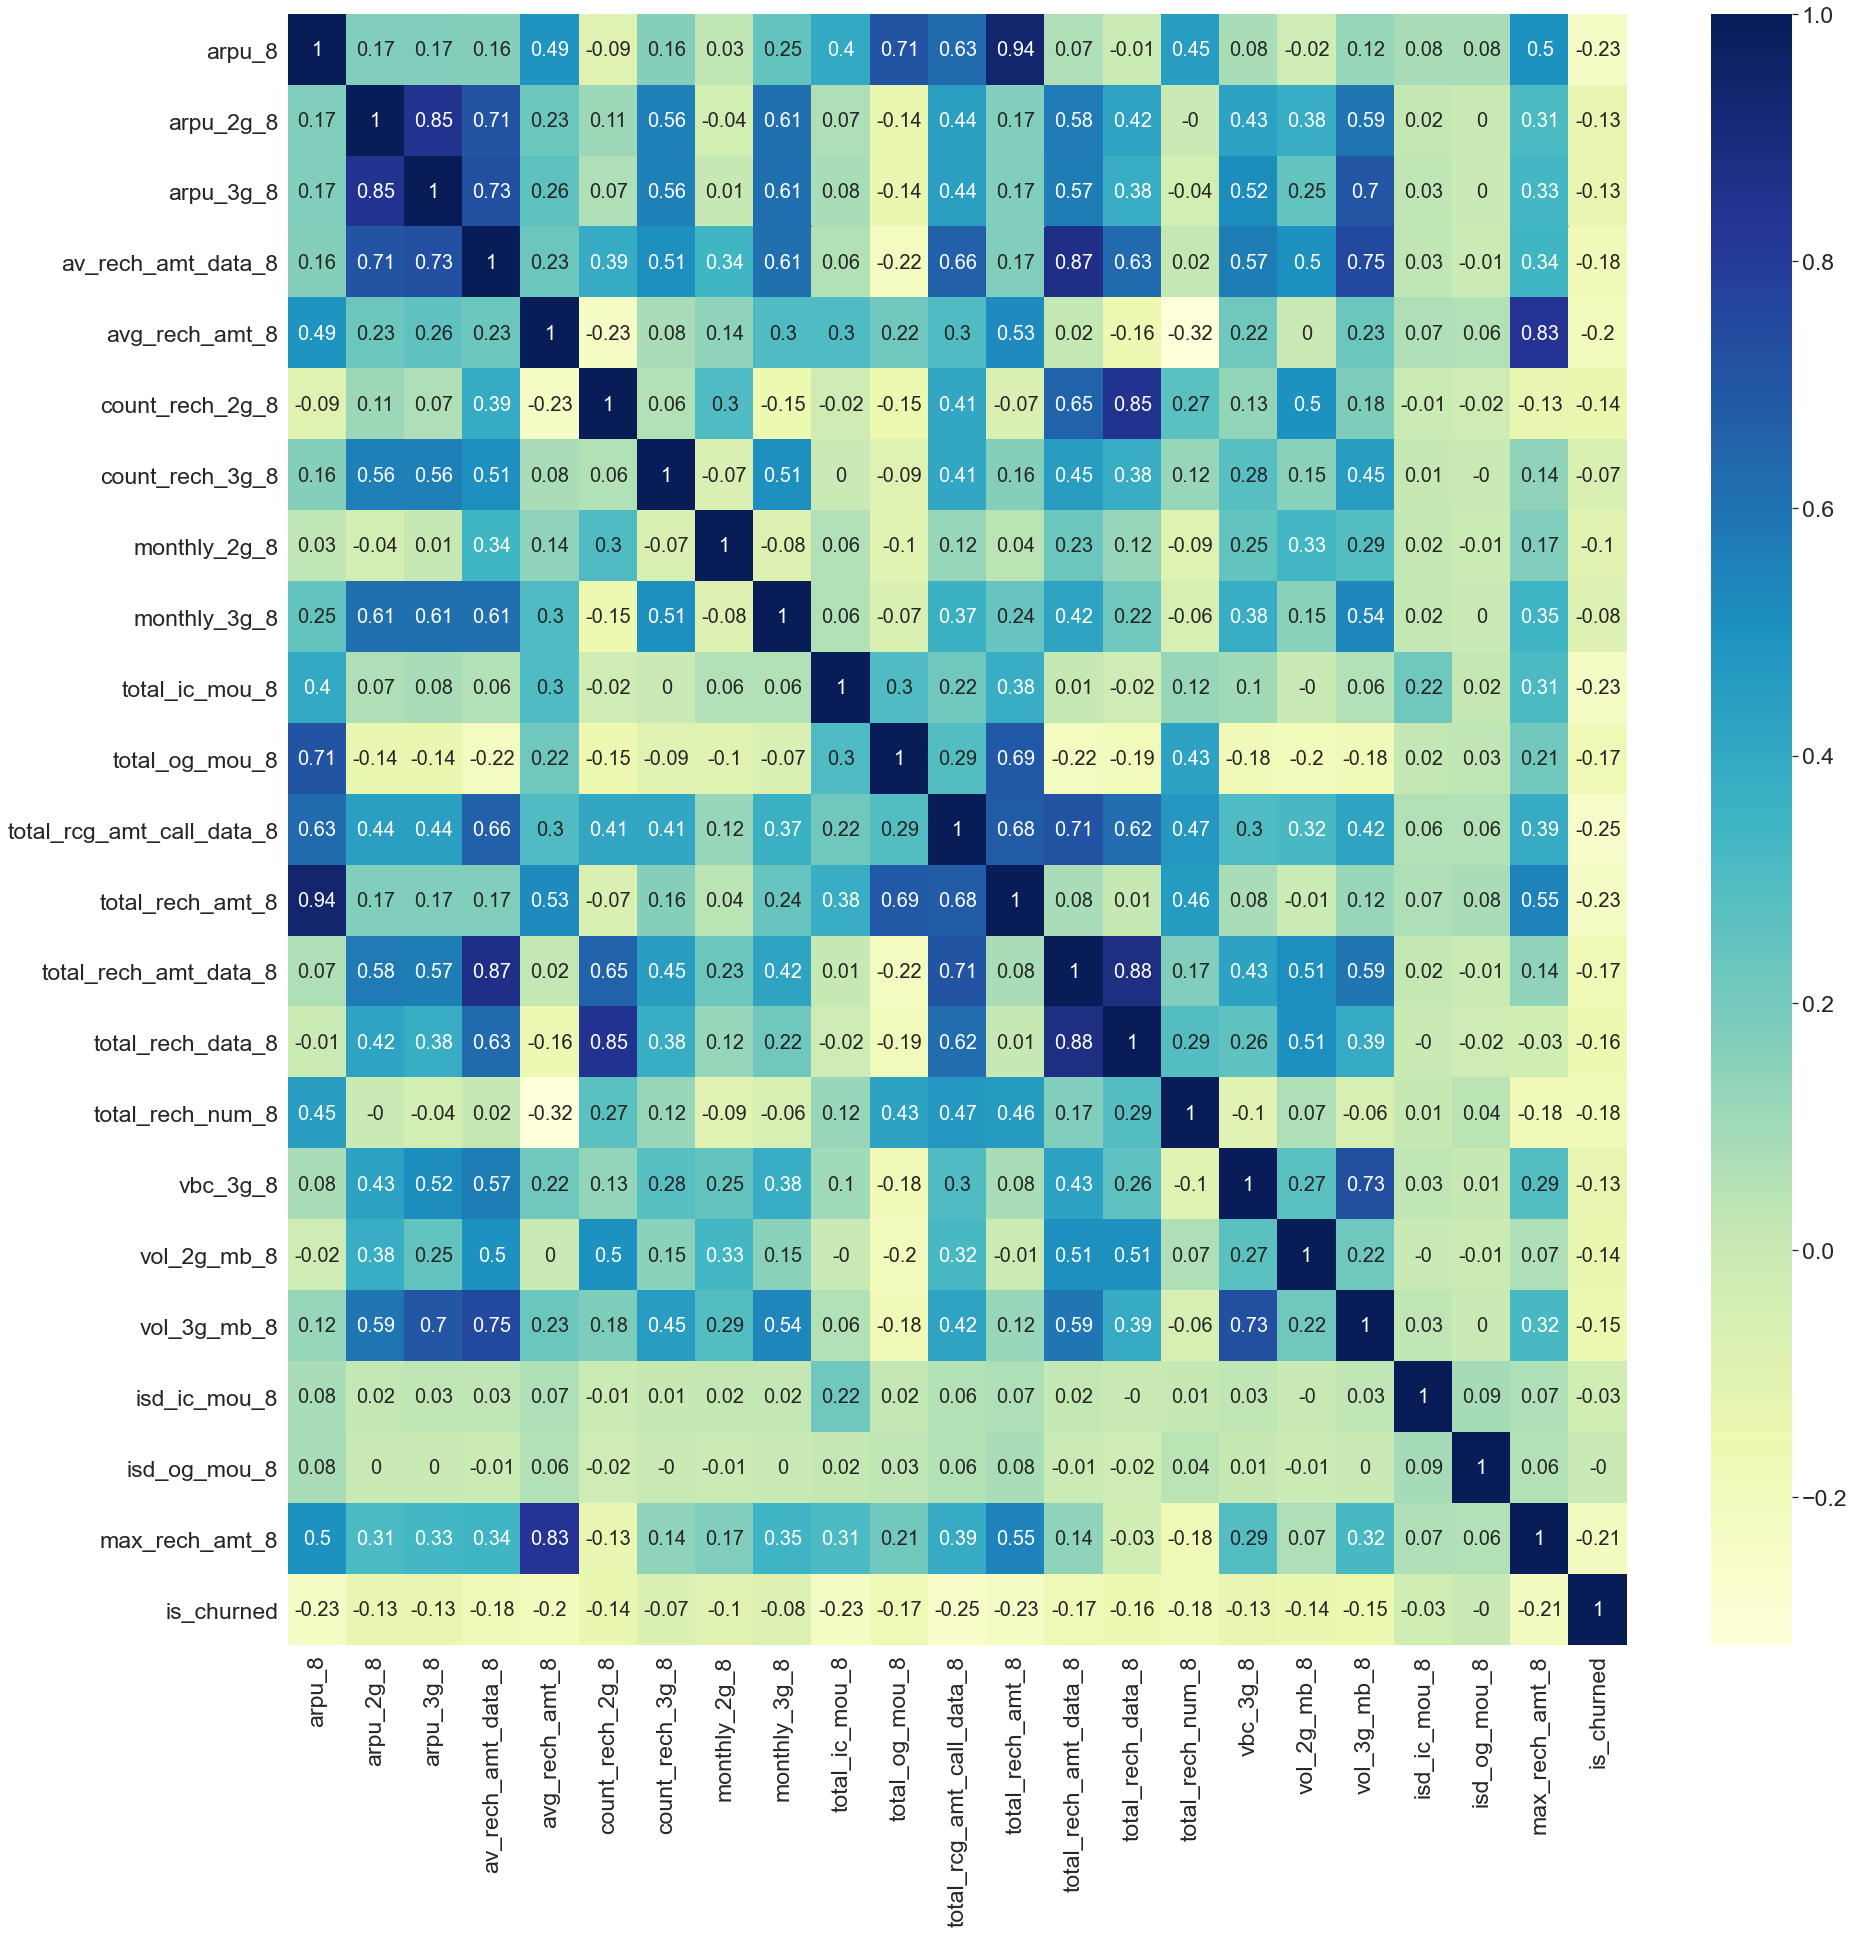

In [118]:
# Check the correlation betweeen basic variables in August
plt.figure(figsize=(30, 30))
sns.heatmap(round(data[np.append(cls_8_basic, "is_churned")].corr(),2), 
            annot=True, cmap="YlGnBu", annot_kws={"size":20})
sns.set(font_scale=2.1)

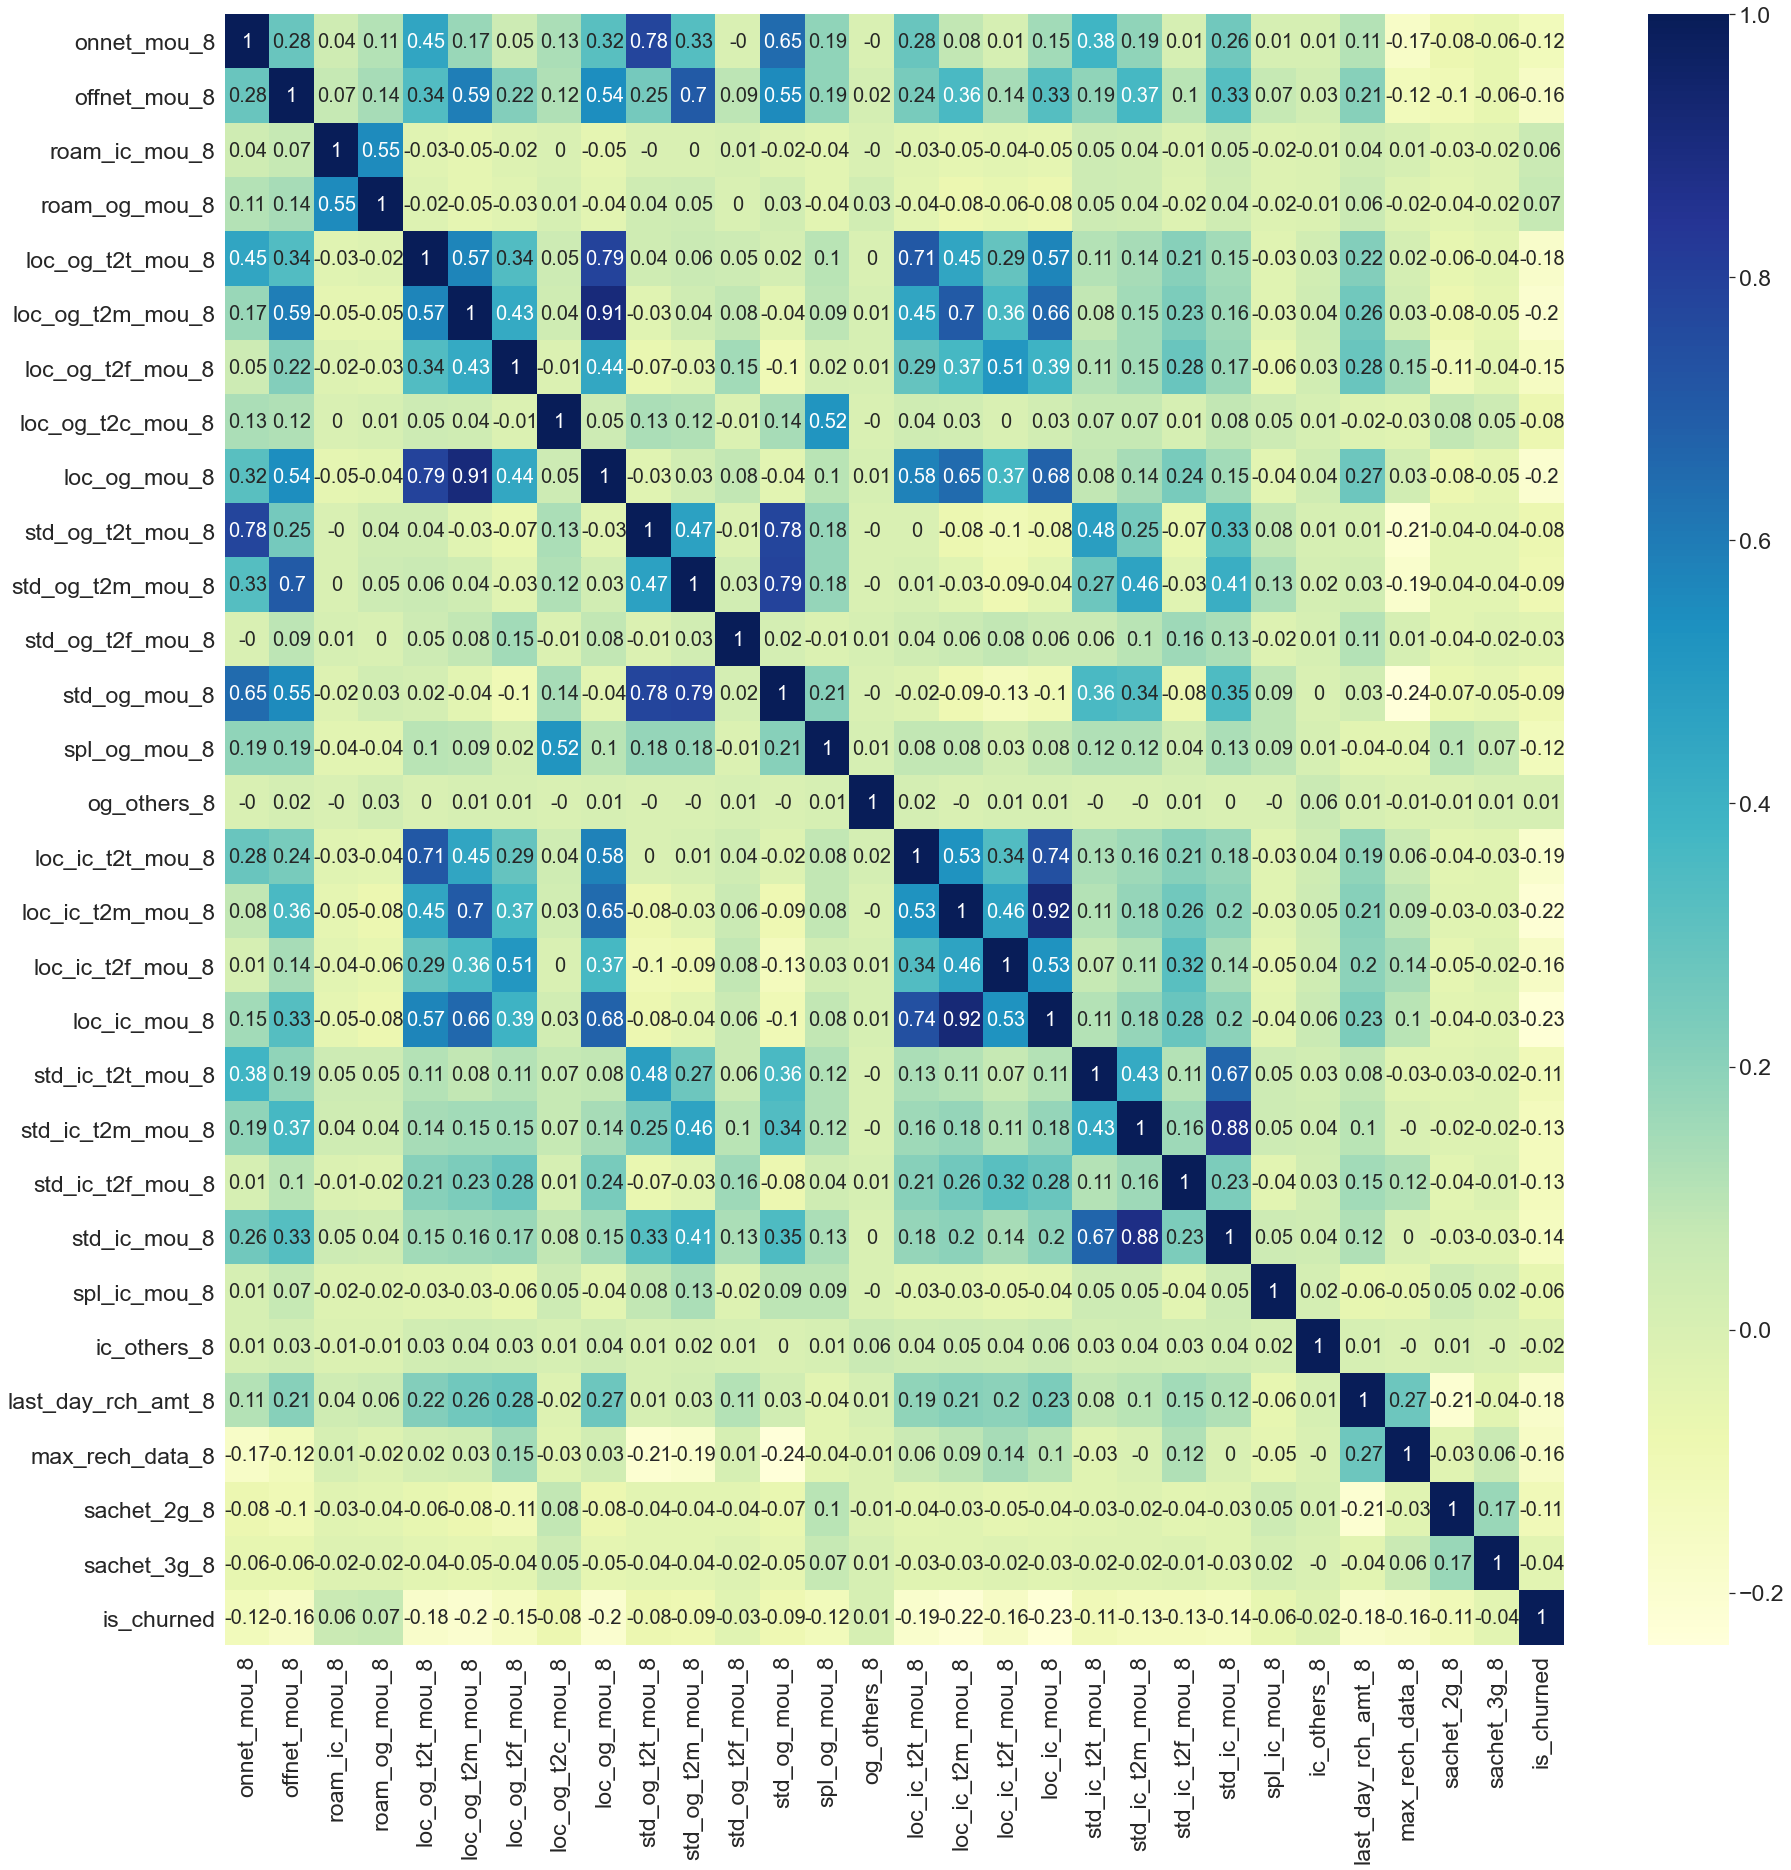

In [119]:
# Check the correlation betweeen secondary variables in August
plt.figure(figsize=(30, 30))
sns.heatmap(round(data[np.append(cls_8_secondary, "is_churned")].corr(),2), 
            annot=True, cmap="YlGnBu", annot_kws={"size":20})
sns.set(font_scale=1.1)

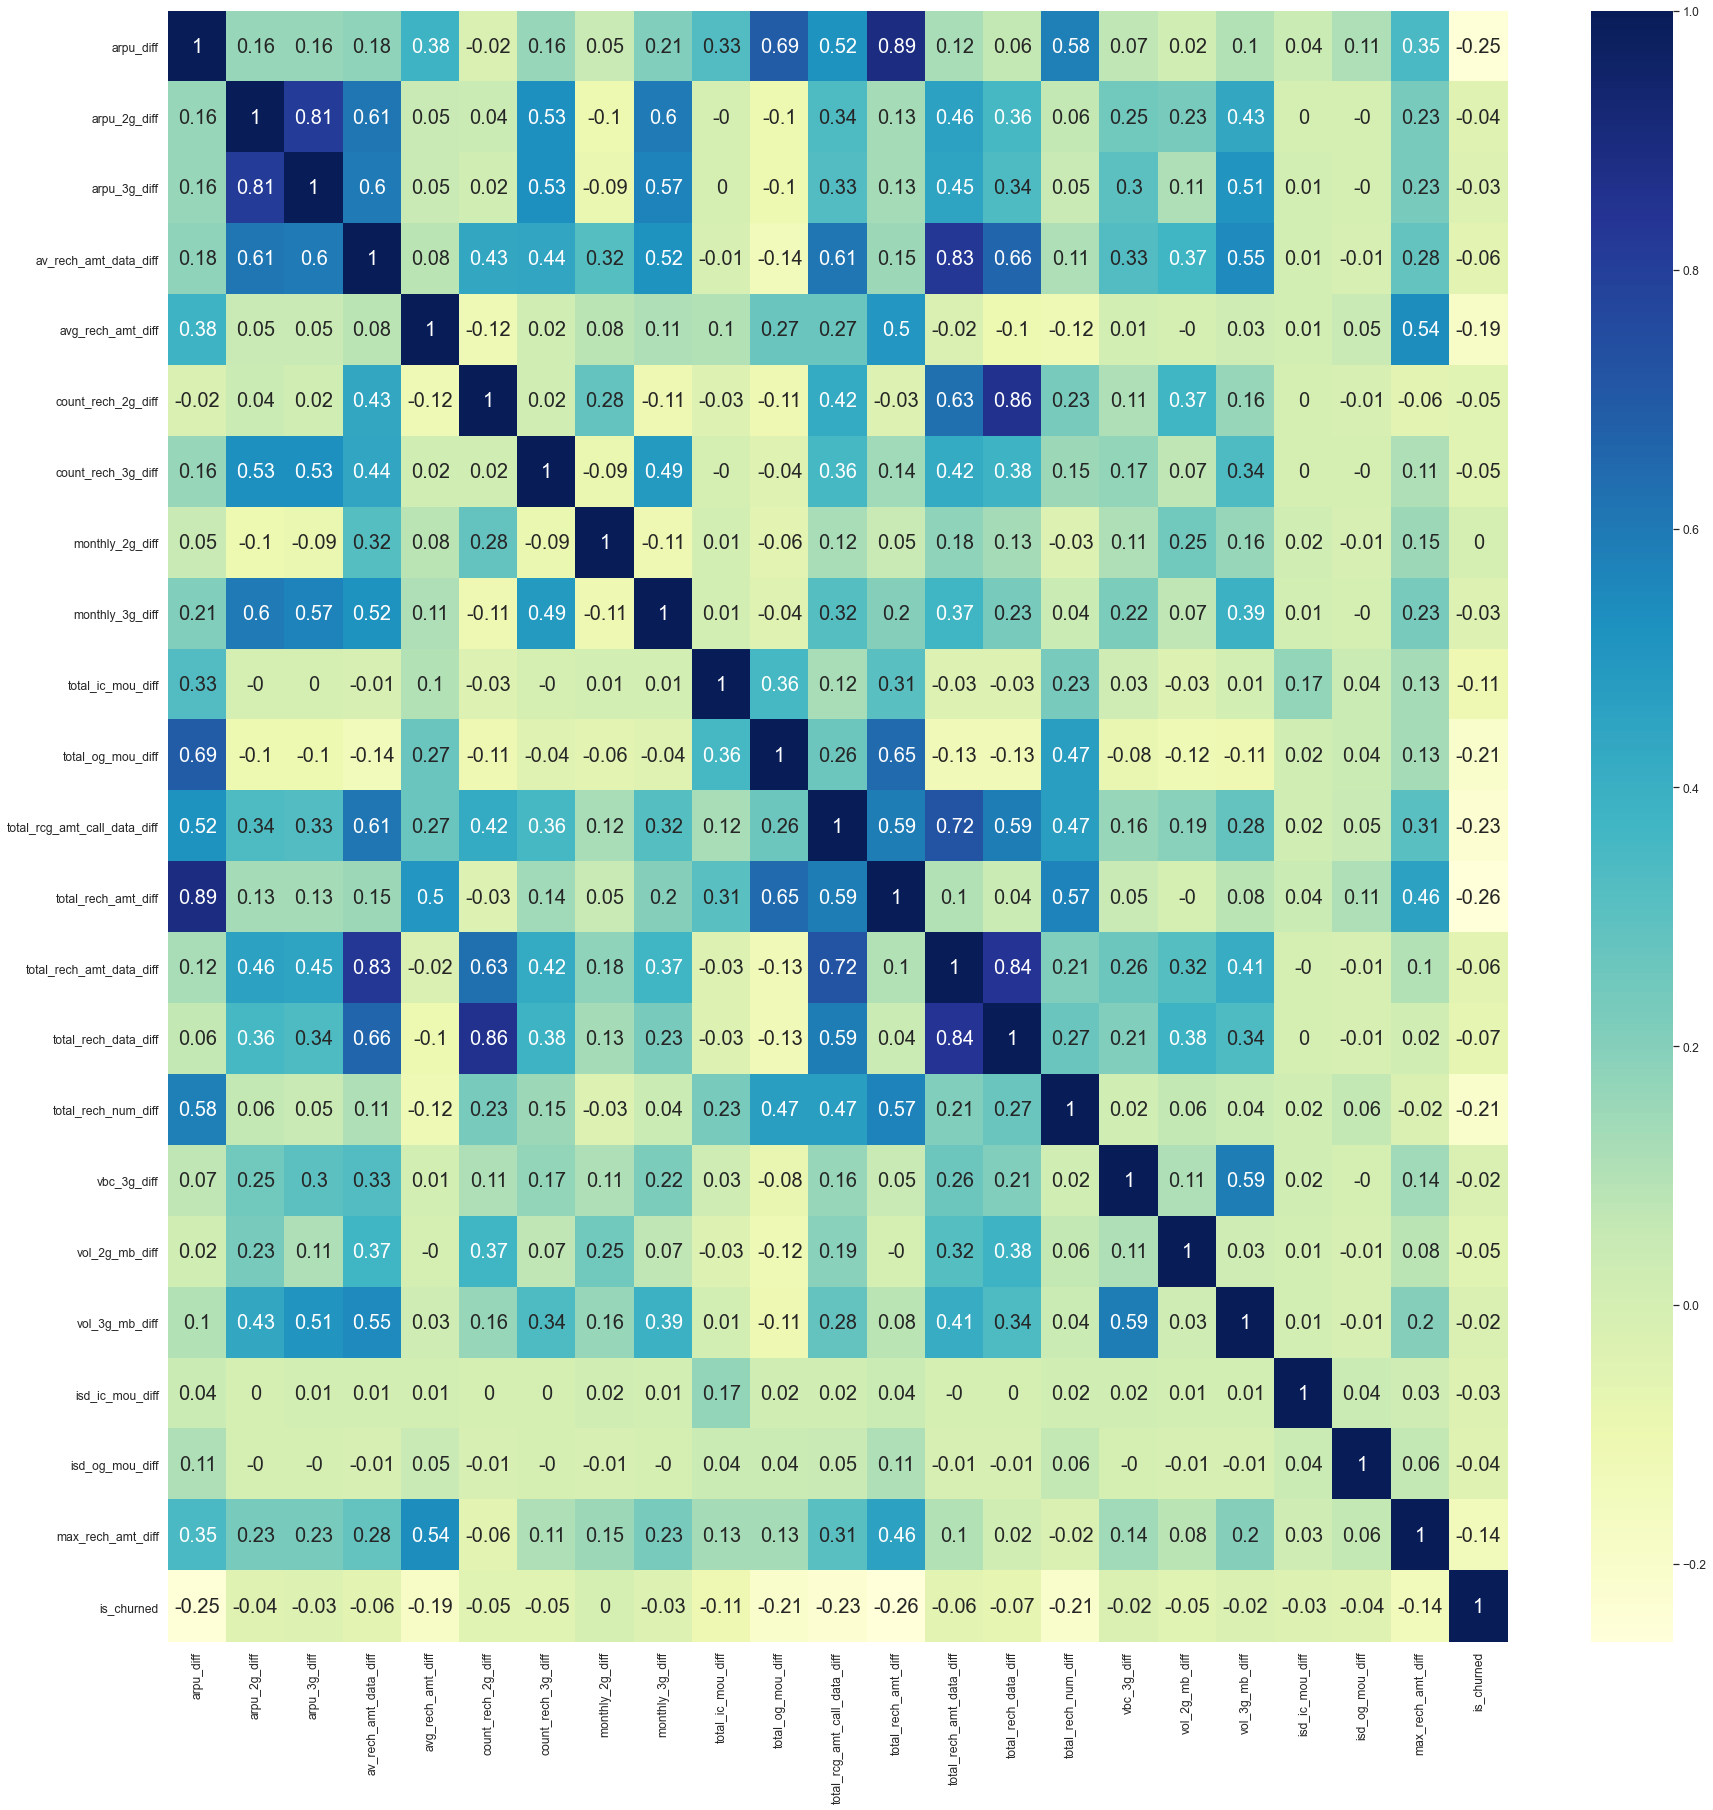

In [120]:
# Check the correlation betweeen basic variables of 'diff' columns
plt.figure(figsize=(30, 30))
sns.heatmap(round(data[np.append(cls_diff_basic, "is_churned")].corr(),2), 
            annot=True, cmap="YlGnBu", annot_kws={"size":20})
sns.set(font_scale=2.1)

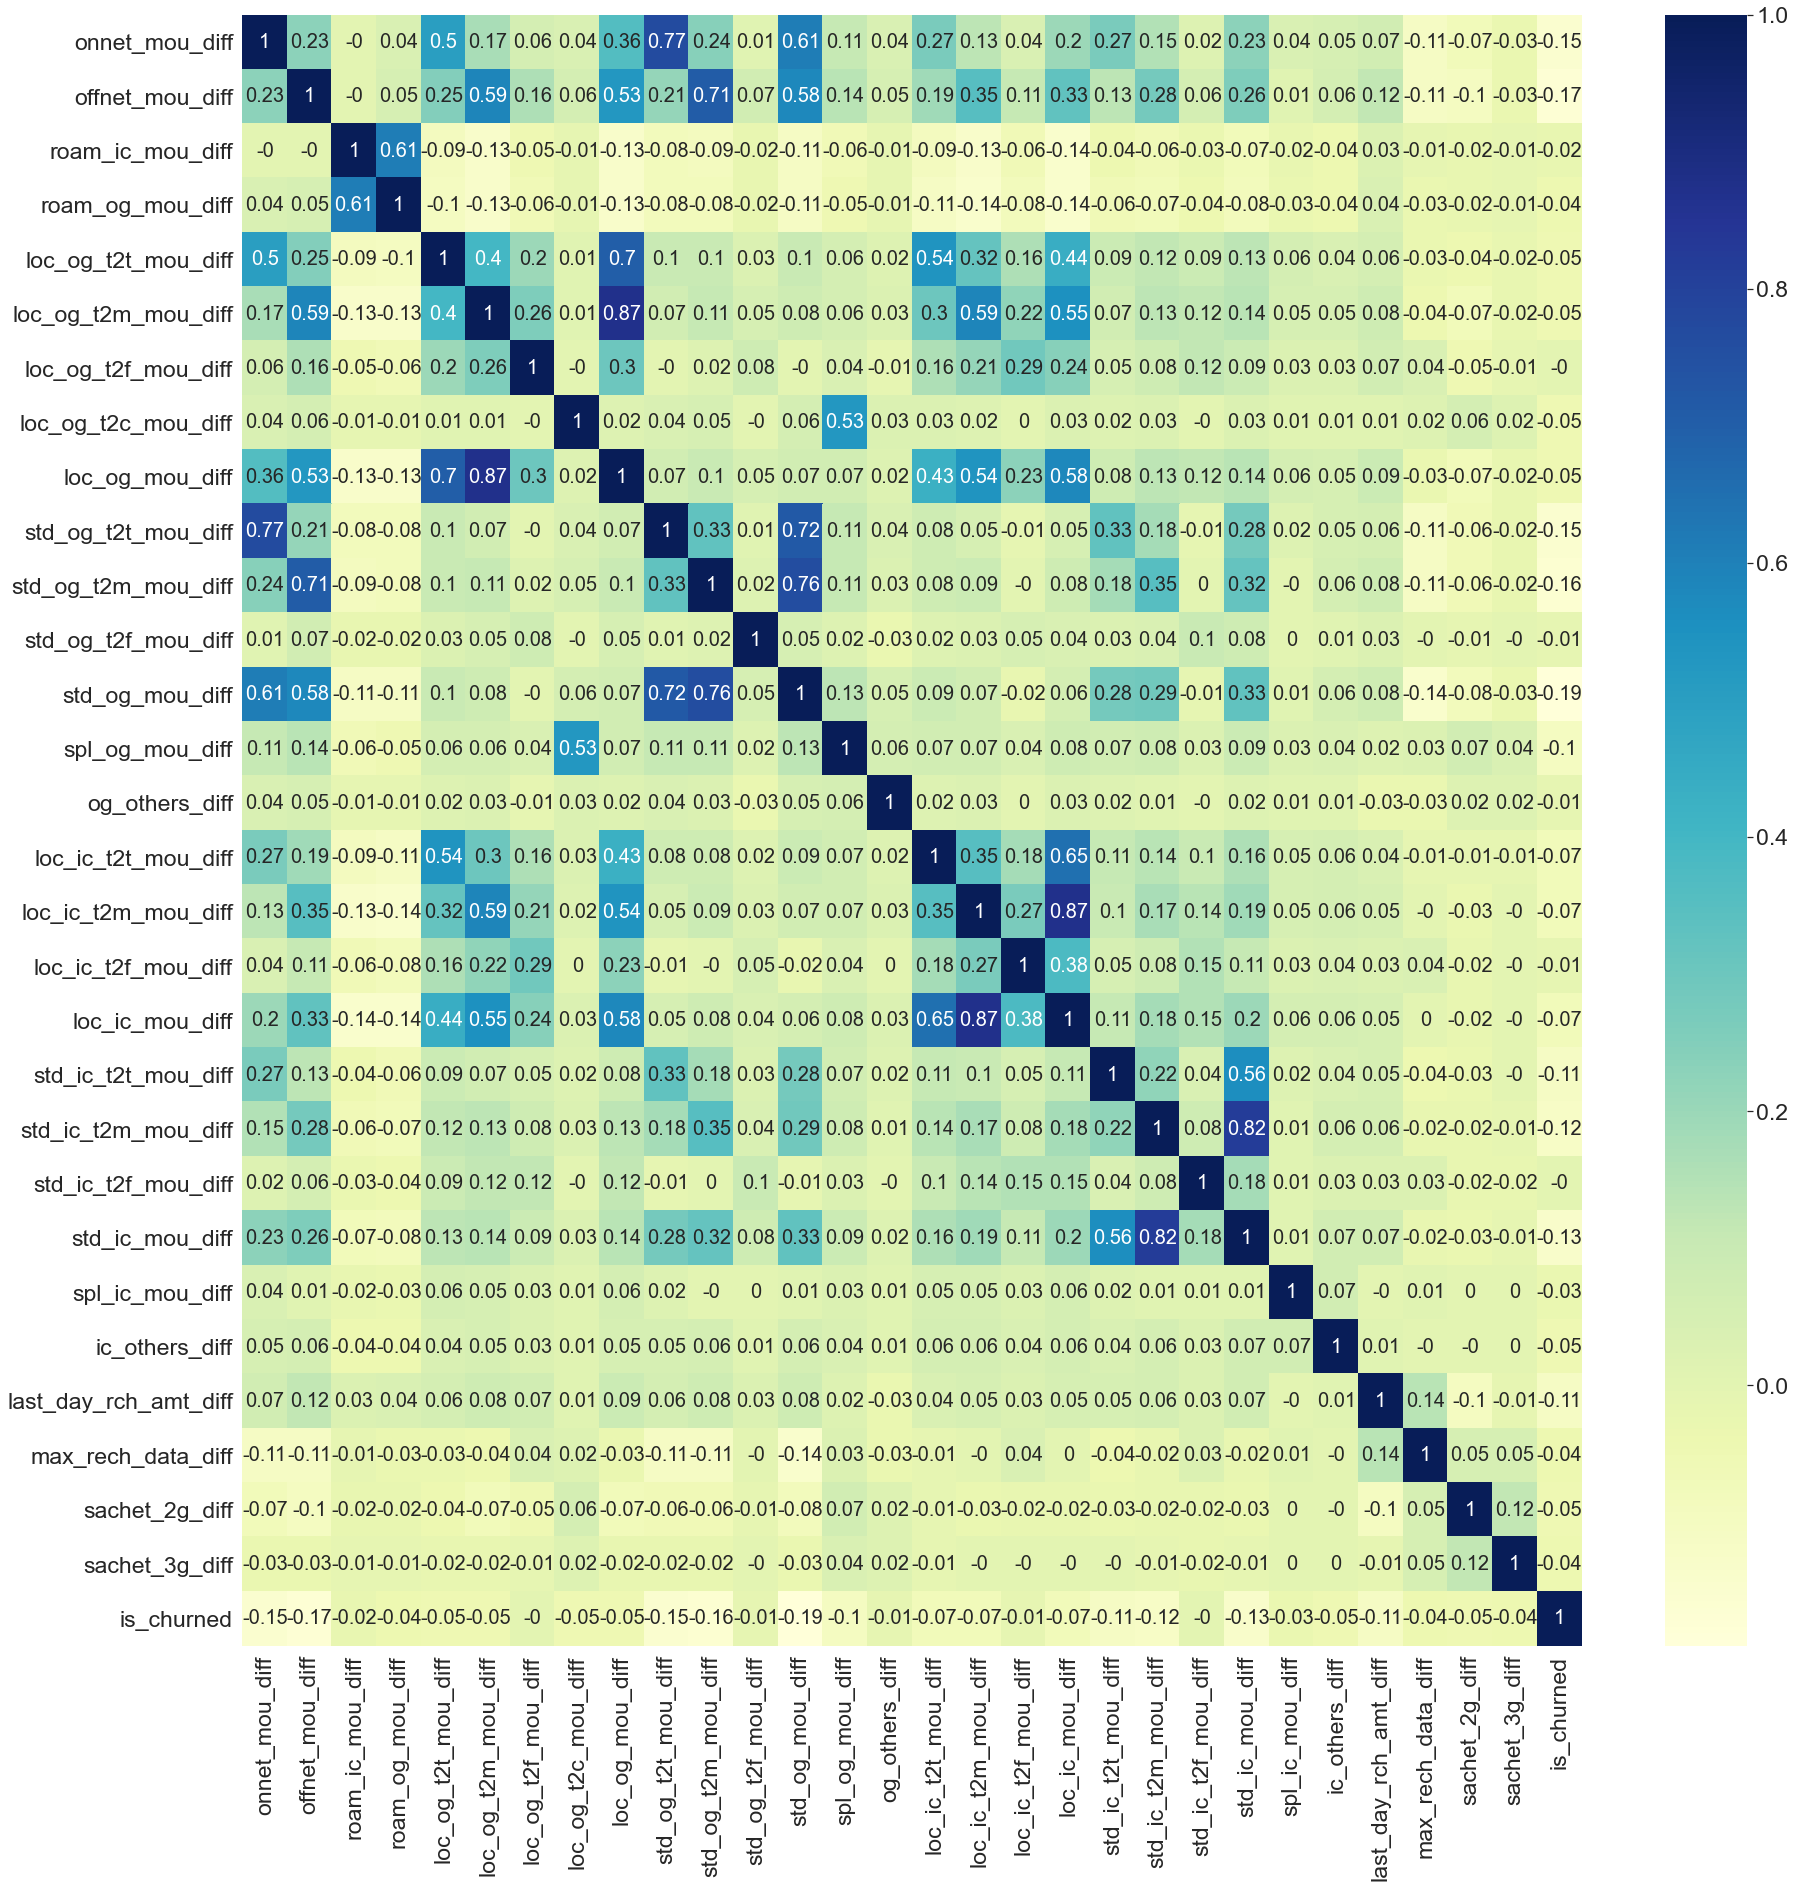

In [121]:
# Check the correlation betweeen secondary variables of 'diff' columns
sns.set(font_scale=2.1)
plt.figure(figsize=(30, 30))
sns.heatmap(round(data[np.append(cls_diff_secondary, "is_churned")].corr(),2), 
            annot=True, cmap="YlGnBu", annot_kws={"size":20})
sns.set(font_scale=1.5)

In [122]:
#sns.pairplot(data, vars = cls_diff_basic,  hue = 'is_churned')

In [123]:
two_8_basic_split = np.array_split(cls_8_basic, 2)
#sns.pairplot(data, vars = two_8_basic_split[0],  hue = 'is_churned')

In [124]:
#sns.pairplot(data, vars = two_8_basic_split[1],  hue = 'is_churned')

In [125]:
two_diff_basic_split = np.array_split(cls_diff_basic, 2)
#sns.pairplot(data, vars = two_diff_basic_split[0],  hue = 'is_churned')

In [126]:
#sns.pairplot(data, vars = two_diff_basic_split[1],  hue = 'is_churned')

# 7. Data Preparation

In [127]:
data.dtypes

arpu_8                          float64
onnet_mou_8                     float64
offnet_mou_8                    float64
roam_ic_mou_8                   float64
roam_og_mou_8                   float64
loc_og_t2t_mou_8                float64
loc_og_t2m_mou_8                float64
loc_og_t2f_mou_8                float64
loc_og_t2c_mou_8                float64
loc_og_mou_8                    float64
std_og_t2t_mou_8                float64
std_og_t2m_mou_8                float64
std_og_t2f_mou_8                float64
std_og_mou_8                    float64
isd_og_mou_8                    float64
spl_og_mou_8                    float64
og_others_8                     float64
total_og_mou_8                  float64
loc_ic_t2t_mou_8                float64
loc_ic_t2m_mou_8                float64
loc_ic_t2f_mou_8                float64
loc_ic_mou_8                    float64
std_ic_t2t_mou_8                float64
std_ic_t2m_mou_8                float64
std_ic_t2f_mou_8                float64


In [128]:
# Change the datatype of is_churned and circle_id to String
df_log = data.copy()

In [129]:
df_log.shape

(29681, 110)

### 7.1 Dummy Variables for categorical Variables


In [130]:
for col in obj_cols :
    print(col, ":", "\n")
    print(df_log[col].value_counts())

date_of_last_rech_6 : 

LaterMonth         26403
MidMonth            2932
EarlyMonth           274
Never rechanged       72
Name: date_of_last_rech_6, dtype: int64
date_of_last_rech_7 : 

LaterMonth         26817
MidMonth            2504
EarlyMonth           270
Never rechanged       90
Name: date_of_last_rech_7, dtype: int64
date_of_last_rech_8 : 

LaterMonth         26107
MidMonth            2254
EarlyMonth           763
Never rechanged      557
Name: date_of_last_rech_8, dtype: int64
date_of_last_rech_data_6 : 

Never rechanged    13172
LaterMonth          9349
MidMonth            4356
EarlyMonth          2804
Name: date_of_last_rech_data_6, dtype: int64
date_of_last_rech_data_7 : 

Never rechanged    12865
LaterMonth         10058
MidMonth            4089
EarlyMonth          2669
Name: date_of_last_rech_data_7, dtype: int64
date_of_last_rech_data_8 : 

Never rechanged    13929
LaterMonth          8758
MidMonth            4164
EarlyMonth          2830
Name: date_of_last_rech_data_8,

In [131]:
for col in obj_cols :
    print(col)
    # Prefix column name to the values 
    df_log[col] = col + "_" + df_log[col].astype(str)
    
    # Create the dummy variables for date_of_last_rech_6 column
    status = pd.get_dummies(df_log[col], drop_first = True)

    # Concat the status with main dataframe
    df_log = pd.concat([df_log, status], axis=1)

    # Drop 'season' as we have created the dummies for it
    df_log.drop([col], axis = 1, inplace = True)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [132]:
df_log.shape

(29681, 122)

In [133]:
df_log.dtypes

arpu_8                                      float64
onnet_mou_8                                 float64
offnet_mou_8                                float64
roam_ic_mou_8                               float64
roam_og_mou_8                               float64
loc_og_t2t_mou_8                            float64
loc_og_t2m_mou_8                            float64
loc_og_t2f_mou_8                            float64
loc_og_t2c_mou_8                            float64
loc_og_mou_8                                float64
std_og_t2t_mou_8                            float64
std_og_t2m_mou_8                            float64
std_og_t2f_mou_8                            float64
std_og_mou_8                                float64
isd_og_mou_8                                float64
spl_og_mou_8                                float64
og_others_8                                 float64
total_og_mou_8                              float64
loc_ic_t2t_mou_8                            float64
loc_ic_t2m_m

In [134]:
# Remove correlated values
df_log.drop(list(df_log.filter(regex = '_8$')), axis = 1, inplace = True) 
#df_log.drop(list(df_log.filter(regex = '_avg_67$')), axis = 1, inplace = True) 
#df_log.drop(list(df_log.filter(regex = '_diff$')), axis = 1, inplace = True) 

### 7.2. Splitting the Data into Training and Testing Sets

In [135]:
# set the seed to zero so that same rows are placed in test and training sets everytime, the notebook is executed.
np.random.seed(102) 

# Split the data with 30% as test size
df_log_train,df_log_test = train_test_split(df_log, test_size=.3, random_state=101)

In [136]:
print("Training data shape", df_log_train.shape, sep=" : ")
print("Test data shape", df_log_test.shape, sep=" : ")
df_log.shape

Training data shape : (20776, 71)
Test data shape : (8905, 71)


(29681, 71)

### 7.3. Scale the training data using MinMaxScaler

In [137]:
# scale the numerical columns in the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
df_log_train.describe()

aon    is_churned  total_rcg_amt_call_data_diff     arpu_diff  \
count  20776.000000  20776.000000                  20776.000000  20776.000000   
mean    1216.250626      0.077975                   -139.354276   -313.543299   
std      960.809378      0.268138                    622.979895    329.106543   
min      180.000000      0.000000                  -1495.250000  -1060.984000   
25%      461.000000      0.000000                   -495.000000   -486.526500   
50%      856.000000      0.000000                   -132.000000   -268.869750   
75%     1772.000000      0.000000                    173.000000   -105.051750   
max     4321.000000      1.000000                   1166.750000    468.616000   

       onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  roam_og_mou_diff  \
count    20776.000000     20776.000000       20776.00000      20776.000000   
mean       -99.407390      -186.819588         -10.58821        -17.847657   
std        172.309493       275.184734          92.73965        132.621525   
min       -436.237500      -774.080000       -2006.16000      -2597.650000   
25%       -174.255000      -318.883750           0.00000          0.000000   
50%        -36.722500      -107.220000           0.00000          0.000000   
75%          0.000000       -10.006250           0.00000          0.000000   
max        261.742500       448.800000        2330.20000       3018.670000   

       loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  loc_og_t2f_mou_diff  \
count         20776.000000         20776.000000         20776.000000   
mean            -26.440273           -71.660845            -1.346992   
std              48.760071           118.145623             3.424848   
min            -122.725000          -321.800000            -7.537500   
25%             -49.042500          -127.952500            -3.030000   
50%             -10.795000           -34.562500             0.000000   
75%               0.000000             0.000000             0.000000   
max              73.635000           193.080000             4.522500   

       loc_og_t2c_mou_diff  loc_og_mou_diff  std_og_t2t_mou_diff  \
count         20776.000000     20776.000000         20776.000000   
mean             -0.254657      -115.322560           -28.250258   
std               0.831550       179.835036            61.385880   
min              -1.650000      -501.487500          -137.300000   
25%              -0.660000      -202.110000           -55.447500   
50%               0.000000       -58.935000             0.000000   
75%               0.000000        -1.840000             0.000000   
max               0.990000       297.892500            82.380000   

       std_og_t2m_mou_diff  std_og_t2f_mou_diff  std_og_mou_diff  \
count         20776.000000         20776.000000     20776.000000   
mean            -48.332629            -1.133787      -138.639902   
std              96.330112            11.191941       259.651028   
min            -225.050000          -353.970000      -635.850000   
25%             -92.986250             0.000000      -259.270000   
50%              -4.580000             0.000000       -12.877500   
75%               0.000000             0.000000         0.000000   
max             135.030000           172.820000       381.510000   

       isd_og_mou_diff  spl_og_mou_diff  og_others_diff  total_og_mou_diff  \
count     20776.000000     20776.000000    20776.000000       20776.000000   
mean         -1.454978        -1.808272       -0.629159        -326.964215   
std          33.142887         6.405656        5.596142         478.552991   
min       -2964.260000       -13.540000     -609.810000       -1365.492500   
25%           0.000000        -5.116250        0.000000        -559.937500   
50%           0.000000        -0.030000        0.000000        -191.575000   
75%           0.000000         0.560000        0.000000         -16.880000   
max         460.125000         9.020000      343.120000         791.727500   

     

In [139]:
# Apply scaler() to all the columns except the 'dummy' variables

pd.options.mode.chained_assignment = None  # to mitigate SettingWithCopyWarning

# Get the non dummy variables. All dummy variables starts with date_of_last_rech.
nonobj_columns = [x for x in df_log_train.columns if x not in list(df_log_train.filter(regex = 'date_of_last_rech'))]

df_log_train[nonobj_columns] = scaler.fit_transform(df_log_train[nonobj_columns])

In [140]:
# Copy the training set into another variable
df_log_train_pca = df_log_train.copy()
df_log_train.describe()

aon    is_churned  total_rcg_amt_call_data_diff     arpu_diff  \
count  20776.000000  20776.000000                  20776.000000  20776.000000   
mean       0.250242      0.077975                      0.509352      0.488651   
std        0.232024      0.268138                      0.234027      0.215159   
min        0.000000      0.000000                      0.000000      0.000000   
25%        0.067858      0.000000                      0.375751      0.375561   
50%        0.163246      0.000000                      0.512115      0.517857   
75%        0.384448      0.000000                      0.626690      0.624956   
max        1.000000      1.000000                      1.000000      1.000000   

       onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  roam_og_mou_diff  \
count    20776.000000     20776.000000      20776.000000      20776.000000   
mean         0.482578         0.480227          0.460195          0.459340   
std          0.246869         0.225030          0.021387          0.023614   
min          0.000000         0.000000          0.000000          0.000000   
25%          0.375344         0.372233          0.462637          0.462518   
50%          0.572387         0.545319          0.462637          0.462518   
75%          0.625000         0.624815          0.462637          0.462518   
max          1.000000         1.000000          1.000000          1.000000   

       loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  loc_og_t2f_mou_diff  \
count         20776.000000         20776.000000         20776.000000   
mean              0.490348             0.485820             0.513309   
std               0.248320             0.229462             0.283984   
min               0.000000             0.000000             0.000000   
25%               0.375242             0.376491             0.373756   
50%               0.570024             0.557873             0.625000   
75%               0.625000             0.625000             0.625000   
max               1.000000             1.000000             1.000000   

       loc_og_t2c_mou_diff  loc_og_mou_diff  std_og_t2t_mou_diff  \
count         20776.000000     20776.000000         20776.000000   
mean              0.528539         0.483081             0.496403   
std               0.314981         0.224968             0.279433   
min               0.000000         0.000000             0.000000   
25%               0.375000         0.374512             0.372599   
50%               0.625000         0.553620             0.625000   
75%               0.625000         0.625044             0.625000   
max               1.000000         1.000000             1.000000   

       std_og_t2m_mou_diff  std_og_t2f_mou_diff  std_og_mou_diff  \
count         20776.000000         20776.000000     20776.000000   
mean              0.490773             0.669785         0.488726   
std               0.267524             0.021246         0.255220   
min               0.000000             0.000000         0.000000   
25%               0.366762             0.671938         0.370154   
50%               0.612281             0.671938         0.612342   
75%               0.625000             0.671938         0.625000   
max               1.000000             1.000000         1.000000   

       isd_og_mou_diff  spl_og_mou_diff  og_others_diff  total_og_mou_diff  \
count     20776.000000     20776.000000    20776.000000       20776.000000   
mean          0.865208         0.520023        0.639271           0.481420   
std           0.009678         0.283939        0.005873           0.221838   
min           0.000000         0.000000        0.000000           0.000000   
25%           0.865633         0.373393        0.639932           0.373423   
50%           0.865633         0.598848        0.639932           0.544181   
75%           0.865633         0.625000        0.639932           0.625162   
max           1.000000         1.000000        1.000000           1.000000   

     

In [141]:
y_train = df_log_train.pop("is_churned")
X_train = df_log_train

In [142]:
X_train.shape

(20776, 70)

# 8. Build the model

### 8.1 Feature Selection Using RFE

In [143]:
logreg = LogisticRegression(class_weight='balanced')
rfe = RFE(logreg, 50)             
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [144]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('aon', True, 1),
 ('total_rcg_amt_call_data_diff', True, 1),
 ('arpu_diff', True, 1),
 ('onnet_mou_diff', True, 1),
 ('offnet_mou_diff', False, 6),
 ('roam_ic_mou_diff', True, 1),
 ('roam_og_mou_diff', True, 1),
 ('loc_og_t2t_mou_diff', True, 1),
 ('loc_og_t2m_mou_diff', True, 1),
 ('loc_og_t2f_mou_diff', False, 7),
 ('loc_og_t2c_mou_diff', False, 9),
 ('loc_og_mou_diff', True, 1),
 ('std_og_t2t_mou_diff', True, 1),
 ('std_og_t2m_mou_diff', True, 1),
 ('std_og_t2f_mou_diff', False, 16),
 ('std_og_mou_diff', True, 1),
 ('isd_og_mou_diff', True, 1),
 ('spl_og_mou_diff', False, 8),
 ('og_others_diff', True, 1),
 ('total_og_mou_diff', True, 1),
 ('loc_ic_t2t_mou_diff', True, 1),
 ('loc_ic_t2m_mou_diff', True, 1),
 ('loc_ic_t2f_mou_diff', True, 1),
 ('loc_ic_mou_diff', True, 1),
 ('std_ic_t2t_mou_diff', True, 1),
 ('std_ic_t2m_mou_diff', False, 2),
 ('std_ic_t2f_mou_diff', False, 5),
 ('std_ic_mou_diff', False, 21),
 ('total_ic_mou_diff', True, 1),
 ('spl_ic_mou_diff', False, 18),
 ('isd_

In [145]:
col = X_train.columns[rfe.support_]

##### 8.2 Assessing the model with StatsModels

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(), class_weight='balanced')
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             is_churned   No. Observations:                20776
Model:                            GLM   Df Residuals:                    20726
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4034.8
Date:                Mon, 31 May 2021   Deviance:                       8069.5
Time:                        17:41:21   Pearson chi2:                 3.10e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1651      4.070     -0.778      0.437     -11.143       4.813
aon                                         -1.5201      0.168     -9.048      0.000      -1.849      -1.191
total_rcg_amt_call_data_diff                -3.4388      0.368     -9.354      0.000      -4.159      -2.718
arpu_diff                                   -1.7873      0.328     -5.444      0.000      -2.431      -1.144
onnet_mou_diff                               0.3295      0.285      1.158      0.247      -0.228       0.887
roam_ic_mou_diff                            -2.5292      1.579     -1.602      0.109      -5.624       0.565
roam_og_mou_diff                            -1.2949      1.493     -0.867      0.386      -4.222       1.632
loc_og_t2t_mou_diff                         -0.4449      0.258     -1.722      0.085      -0.951       0.061
loc_og_t2m_mou_diff                         -0.0154      0.421     -0.037      0.971      -0.841       0.810
loc_og_mou_diff                              1.1849      0.554      2.138      0.032       0.099       2.271
std_og_t2t_mou_diff                         -0.6409      0.231     -2.775      0.006      -1.094      -0.188
std_og_t2m_mou_diff                         -0.4136      0.191     -2.168      0.030      -0.788      -0.040
std_og_mou_diff                              0.0759      0.357      0.213      0.832      -0.624       0.776
isd_og_mou_diff                             -0.6167      2.659     -0.232      0.817      -5.828       4.595
og_others_diff                              10.0711      4.539      2.219      0.026       1.176      18.967
total_og_mou_diff                           -0.6551      0.379     -1.728      0.084      -1.398       0.088
loc_ic_t2t_mou_diff                         -0.4639      0.242     -1.916      0.055      -0.938       0.011
loc_ic_t2m_mou_diff                         -1.3163      0.410     -3.209      0.001      -2.120      -0.512
loc_ic_t2f_mou_diff                          0.1269      0.137      0.925      0.355      -0.142       0.396
loc_ic_mou_diff                              1.6105      0.582      2.766      0.006       0.469       2.752
std_ic_t2t_mou_diff                         -0.2456      0.118     -2.076      0.038      -0.478      -0.014
total_ic_mou_diff                           -1.1204      0.304     -3.689      0.000      -1.716      -0.525
ic_others_diff                              -0.2145      0.094     -2.277      0.023      -0.399      -0.030
total_rech_num_diff                         -1.8887      0.218     -8.647      0.000      -2.317      -1.461
total_rech_amt_diff                          3.1788      0.421      7.549      0.000       2.353       4.004
max_rech_amt_diff              

In [147]:
# Function to show vif and p-values in a single dataframe
def get_vif_and_pvalue(df, is_pvalue_sort=True, is_print=True) :
    # Add constant
    df = sm.add_constant(df)
    
    # Build linear model using OLS
    model = sm.GLM(y_train, df, family = sm.families.Binomial(), class_weight='balanced').fit()
    
    #print("R-squared", model.rsquared, sep = " : ")
    #print("Adjusted R-squared", model.rsquared_adj, end = "\n\n", sep = " : ")
    
    # Create a dataframe for p-values
    result = model.pvalues.to_frame()
    result = pd.concat([result, model.params], axis = 1)     # add regression coefficient to dataframe
    result.drop(result.index[[0]], inplace=True)            # remove values of constant from dataframe
    
    # Add column names to result dataframe
    result.columns = ['p-value', 'coeff']  
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    result['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    
    # Round the values to 2-3 decimals in the dataframe
    result['p-value'] = round(result['p-value'], 3)
    result['VIF'] = round(result['VIF'], 2)
    result['coeff'] = round(result['coeff'], 3)
    
    # Sort the dataframe
    if(is_pvalue_sort) : 
        result = result.sort_values(by = "VIF", ascending = False)
        if(is_print) : 
            print(result)
        result = result.sort_values(by = "p-value", ascending = False)
    else : 
        result = result.sort_values(by = "VIF", ascending = False)
        
    return result

In [148]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

                                          p-value   coeff        VIF
count_rech_3g_diff                          0.432  -0.972  290295.85
sachet_3g_diff                              0.195  -1.360  285728.07
monthly_3g_diff                             0.035   3.312   45590.65
count_rech_2g_diff                          0.618  -0.300      23.57
loc_ic_mou_diff                             0.040   1.263      19.34
total_rech_data_diff                        0.677  -0.254      18.11
loc_og_mou_diff                             0.045   1.124      16.34
total_og_mou_diff                           0.193  -0.556      14.85
std_og_mou_diff                             0.946   0.024      12.76
total_rech_amt_data_diff                    0.202   0.636      12.29
sachet_2g_diff                              0.068   0.704      12.07
date_of_last_rech_6_LaterMonth              0.162  -0.399      11.37
av_rech_amt_data_diff                       0.019   1.230      10.96
date_of_last_rech_6_MidMonth      

p-value   coeff        VIF
std_ic_t2f_mou_diff                         0.994  -0.001       1.14
std_og_mou_diff                             0.946   0.024      12.76
loc_og_t2m_mou_diff                         0.904   0.052       9.56
date_of_last_rech_data_6_Never rechanged    0.849   0.034       6.92
std_og_t2f_mou_diff                         0.846   0.276       1.04
arpu_3g_diff                                0.786  -0.066       3.54
isd_og_mou_diff                             0.784  -0.733       1.05
date_of_last_rech_data_7_Never rechanged    0.762  -0.040       4.91
date_of_last_rech_data_7_MidMonth           0.719   0.051       2.41
arpu_2g_diff                                0.690  -0.097       3.70
total_rech_data_diff                        0.677  -0.254      18.11
offnet_mou_diff                             0.662  -0.146       9.83
vol_3g_mb_diff                              0.658  -0.087       2.29
count_rech_2g_diff                          0.618  -0.300      23.57
date_of_last_rech_data_6_MidMonth           0.584   0.081       2.39
date_of_last_rech_data_7_LaterMonth         0.542  -0.082       3.96
std_ic_mou_diff                             0.498   0.203       7.08
loc_og_t2f_mou_diff                         0.489   0.091       1.21
onnet_mou_diff                              0.454   0.235       9.09
roam_og_mou_diff                            0.451  -1.207       2.29
vbc_3g_diff                                 0.436  -0.113       1.56
count_rech_3g_diff                          0.432  -0.972  290295.85
loc_ic_t2f_mou_diff                         0.375   0.126       1.34
date_of_last_rech_6_MidMonth                0.364  -0.267      10.78
loc_og_t2c_mou_diff                         0.289   0.119       1.39
std_og_t2m_mou_diff                         0.252  -0.270       5.28
date_of_last_rech_7_Never rechanged         0.219   0.457       1.35
total_rech_amt_data_diff                    0.202   0.636      12.29
sachet_3g_diff                              0.195  -1.360  285728.07
total_og_mou_diff                           0.193  -0.556      14.85
date_of_last_rech_6_LaterMonth              0.162  -0.399      11.37
max_rech_amt_diff                           0.130   0.326       2.10
loc_og_t2t_mou_diff                         0.120  -0.402       4.05
roam_ic_mou_diff                            0.116  -2.500       1.61
max_rech_data_diff                          0.109  -0.596       5.29
date_of_last_rech_data_6_LaterMonth         0.093   0.245       3.89
loc_ic_t2t_mou_diff                         0.085  -0.419       3.16
std_ic_t2m_mou_diff                         0.078  -0.406       4.37
sachet_2g_diff                              0.068   0.704      12.07
spl_og_mou_diff                             0.062  -0.238       1.47
spl_ic_mou_diff                             0.061  -3.618       1.02
isd_ic_mou_diff                             0.057  -5.567       1.17
std_ic_t2t_mou_diff                         0.047  -0.301       2.12
loc_og_mou_diff                             0.045   1.124      16.34
ic_others_diff                              0.044  -0.191       1.03
total_ic_mou_diff                           0.041  -0.783      10.47
loc_ic_mou_diff                             0.040   1.263      19.34
date_of_last_rech_8_Never rechanged         0.038   0.357       1.81
monthly_3g_diff                             0.035   3.312   45590.65
date_of_last_rech_8_MidMonth                0.029  -0.322       3.76
og_others_diff                              0.026  10.312       1.02
av_rech_amt_data_diff                       0.019   1.230      10.96
std_og_t2t_mou_diff                         0.011  -0.594       5.12
monthly_2g_diff                             0.003   3.169       3.91
date_of_last_rech_7_MidMonth                0.003  -0.629       9.57
loc_ic_t2m_mou_diff                         0.003  -1.236       7.46
date_of_last_rech_data_8_MidMonth           0.001  -0.537       2.29
date_of_last_rech_8_LaterMonth          

In [149]:
# Remove the variables with high p-values
result = get_vif_and_pvalue(X_train, True, False)
while (result['p-value'][0] > 0.05) : 
    del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, True, False)

std_ic_t2f_mou_diff
std_og_mou_diff
loc_og_t2m_mou_diff
date_of_last_rech_data_6_Never rechanged
std_og_t2f_mou_diff
arpu_3g_diff
isd_og_mou_diff
date_of_last_rech_data_7_Never rechanged
offnet_mou_diff
total_rech_data_diff
date_of_last_rech_data_7_LaterMonth
vol_3g_mb_diff
date_of_last_rech_data_6_MidMonth
loc_og_t2f_mou_diff
std_ic_mou_diff
arpu_2g_diff
date_of_last_rech_6_MidMonth
count_rech_2g_diff
roam_og_mou_diff
onnet_mou_diff
loc_og_t2c_mou_diff
loc_ic_t2f_mou_diff
total_rech_amt_data_diff
count_rech_3g_diff
date_of_last_rech_7_Never rechanged
vbc_3g_diff
date_of_last_rech_data_7_MidMonth
loc_og_t2t_mou_diff
spl_og_mou_diff
date_of_last_rech_6_LaterMonth
max_rech_amt_diff
sachet_3g_diff
total_ic_mou_diff
total_og_mou_diff
loc_ic_mou_diff
spl_ic_mou_diff
roam_ic_mou_diff
date_of_last_rech_data_6_LaterMonth


In [150]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

                                          p-value   coeff      VIF
og_others_diff                              0.022  10.123  5781.40
isd_ic_mou_diff                             0.007  -6.837  5646.97
monthly_3g_diff                             0.023   3.385   826.76
monthly_2g_diff                             0.000   3.170   133.47
date_of_last_rech_7_LaterMonth              0.000  -1.032    78.98
total_rech_amt_diff                         0.000   3.080    49.24
date_of_last_rech_8_LaterMonth              0.000  -1.022    36.35
arpu_diff                                   0.000  -2.038    35.00
av_rech_amt_data_diff                       0.001   1.272    34.07
total_rcg_amt_call_data_diff                0.000  -3.257    23.41
max_rech_data_diff                          0.018  -0.726    18.25
total_rech_num_diff                         0.000  -1.919    15.82
avg_rech_amt_diff                           0.000  -1.918    12.55
loc_og_mou_diff                             0.000   0.863    1

p-value   coeff      VIF
loc_ic_t2t_mou_diff                         0.038  -0.309     6.63
date_of_last_rech_8_Never rechanged         0.038   0.353     1.82
date_of_last_rech_8_MidMonth                0.025  -0.330     4.05
monthly_3g_diff                             0.023   3.385   826.76
og_others_diff                              0.022  10.123  5781.40
ic_others_diff                              0.020  -0.218     3.77
max_rech_data_diff                          0.018  -0.726    18.25
sachet_2g_diff                              0.017   0.371     7.04
std_ic_t2t_mou_diff                         0.007  -0.300     5.06
isd_ic_mou_diff                             0.007  -6.837  5646.97
date_of_last_rech_data_8_MidMonth           0.001  -0.522     2.56
av_rech_amt_data_diff                       0.001   1.272    34.07
std_ic_t2m_mou_diff                         0.001  -0.389     5.50
aon                                         0.000  -1.565     2.35
std_og_t2m_mou_diff                         0.000  -0.487     6.35
vol_2g_mb_diff                              0.000  -0.824     5.40
std_og_t2t_mou_diff                         0.000  -0.518     5.78
date_of_last_rech_data_8_Never rechanged    0.000   0.497     6.31
date_of_last_rech_data_8_LaterMonth         0.000  -1.030     4.45
last_day_rch_amt_diff                       0.000  -0.719     7.93
date_of_last_rech_7_MidMonth                0.000  -0.748     8.18
loc_ic_t2m_mou_diff                         0.000  -0.681     8.30
loc_og_mou_diff                             0.000   0.863    10.31
avg_rech_amt_diff                           0.000  -1.918    12.55
total_rech_num_diff                         0.000  -1.919    15.82
total_rcg_amt_call_data_diff                0.000  -3.257    23.41
arpu_diff                                   0.000  -2.038    35.00
date_of_last_rech_8_LaterMonth              0.000  -1.022    36.35
total_rech_amt_diff                         0.000   3.080    49.24
date_of_last_rech_7_LaterMonth              0.000  -1.032    78.98
monthly_2g_diff                             0.000   3.170   133.47
date_of_last_rech_6_Never rechanged         0.000   2.478     1.02

In [151]:
# Remove the variables with high VIF values
result = get_vif_and_pvalue(X_train, False, False)
while (result['VIF'][0] > 10) : 
    del_value = result[result['VIF'] == result['VIF'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, False, False)
    # After removing a high VIF variable, check and remove the variables with high P-values
    while (result['p-value'][0] > 0.05) :
        del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
        print(del_value)
        X_train = X_train.drop([del_value], axis = 1)
        result = get_vif_and_pvalue(X_train, True, False)

og_others_diff
isd_ic_mou_diff
monthly_3g_diff
monthly_2g_diff
total_rech_amt_diff
date_of_last_rech_7_LaterMonth
av_rech_amt_data_diff
sachet_2g_diff


In [152]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

                                          p-value  coeff    VIF
date_of_last_rech_8_LaterMonth              0.000 -1.025  20.90
arpu_diff                                   0.015 -0.525  17.94
total_rech_num_diff                         0.000 -1.504  13.26
total_rcg_amt_call_data_diff                0.000 -1.820  10.55
avg_rech_amt_diff                           0.000 -1.550  10.32
loc_og_mou_diff                             0.000  0.937  10.06
loc_ic_t2m_mou_diff                         0.000 -0.711   8.24
last_day_rch_amt_diff                       0.003 -0.493   7.45
max_rech_data_diff                          0.001  0.506   7.04
loc_ic_t2t_mou_diff                         0.047 -0.290   6.58
std_og_t2m_mou_diff                         0.000 -0.475   6.21
std_og_t2t_mou_diff                         0.000 -0.497   5.65
date_of_last_rech_data_8_Never rechanged    0.000  0.530   5.59
std_ic_t2m_mou_diff                         0.001 -0.398   5.48
std_ic_t2t_mou_diff                     

p-value  coeff    VIF
loc_ic_t2t_mou_diff                         0.047 -0.290   6.58
date_of_last_rech_8_MidMonth                0.031 -0.314   2.75
ic_others_diff                              0.017 -0.221   3.69
arpu_diff                                   0.015 -0.525  17.94
std_ic_t2t_mou_diff                         0.006 -0.306   5.02
date_of_last_rech_7_MidMonth                0.005  0.271   1.14
last_day_rch_amt_diff                       0.003 -0.493   7.45
date_of_last_rech_8_Never rechanged         0.002  0.513   1.38
max_rech_data_diff                          0.001  0.506   7.04
std_ic_t2m_mou_diff                         0.001 -0.398   5.48
date_of_last_rech_8_LaterMonth              0.000 -1.025  20.90
vol_2g_mb_diff                              0.000 -0.818   4.89
aon                                         0.000 -1.707   2.29
date_of_last_rech_data_8_MidMonth           0.000 -0.537   2.46
date_of_last_rech_data_8_LaterMonth         0.000 -1.023   4.24
date_of_last_rech_data_8_Never rechanged    0.000  0.530   5.59
std_og_t2t_mou_diff                         0.000 -0.497   5.65
std_og_t2m_mou_diff                         0.000 -0.475   6.21
loc_ic_t2m_mou_diff                         0.000 -0.711   8.24
loc_og_mou_diff                             0.000  0.937  10.06
avg_rech_amt_diff                           0.000 -1.550  10.32
total_rcg_amt_call_data_diff                0.000 -1.820  10.55
total_rech_num_diff                         0.000 -1.504  13.26
date_of_last_rech_6_Never rechanged         0.000  2.411   1.01

### 8.2 Build the final model using GLM method

In [153]:
X_train_sm = sm.add_constant(X_train)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(), class_weight='balanced').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             is_churned   No. Observations:                20776
Model:                            GLM   Df Residuals:                    20751
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4111.3
Date:                Mon, 31 May 2021   Deviance:                       8222.7
Time:                        17:44:40   Pearson chi2:                 3.04e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        2.0768      0.219      9.484      0.000       1.648       2.506
aon                                         -1.7066      0.164    -10.415      0.000      -2.028      -1.385
total_rcg_amt_call_data_diff                -1.8200      0.214     -8.521      0.000      -2.239      -1.401
arpu_diff                                   -0.5251      0.215     -2.440      0.015      -0.947      -0.103
loc_og_mou_diff                              0.9370      0.184      5.082      0.000       0.576       1.298
std_og_t2t_mou_diff                         -0.4967      0.120     -4.136      0.000      -0.732      -0.261
std_og_t2m_mou_diff                         -0.4746      0.125     -3.787      0.000      -0.720      -0.229
loc_ic_t2t_mou_diff                         -0.2898      0.146     -1.984      0.047      -0.576      -0.003
loc_ic_t2m_mou_diff                         -0.7108      0.168     -4.229      0.000      -1.040      -0.381
std_ic_t2t_mou_diff                         -0.3060      0.111     -2.765      0.006      -0.523      -0.089
std_ic_t2m_mou_diff                         -0.3977      0.119     -3.331      0.001      -0.632      -0.164
ic_others_diff                              -0.2209      0.092     -2.390      0.017      -0.402      -0.040
total_rech_num_diff                         -1.5036      0.204     -7.387      0.000      -1.903      -1.105
last_day_rch_amt_diff                       -0.4931      0.164     -3.006      0.003      -0.815      -0.172
max_rech_data_diff                           0.5061      0.157      3.222      0.001       0.198       0.814
vol_2g_mb_diff                              -0.8175      0.134     -6.107      0.000      -1.080      -0.555
avg_rech_amt_diff                           -1.5501      0.191     -8.118      0.000      -1.924      -1.176
date_of_last_rech_6_Never rechanged          2.4113      0.431      5.593      0.000       1.566       3.256
date_of_last_rech_7_MidMonth                 0.2713      0.096      2.818      0.005       0.083       0.460
date_of_last_rech_8_LaterMonth              -1.0254      0.125     -8.232      0.000      -1.270      -0.781
date_of_last_rech_8_MidMonth                -0.3140      0.145     -2.160      0.031      -0.599      -0.029
date_of_last_rech_8_Never rechanged          0.5130      0.166      3.096      0.002       0.188       0.838
date_of_last_rech_data_8_LaterMonth         -1.0225      0.153     -6.691      0.000      -1.322      -0.723
date_of_last_rech_data_8_MidMonth           -0.5365      0.153     -3.517      0.000      -0.836      -0.238
date_of_last_rech_data_8_Never rechanged     0.5303      0.113      4.684      0.000       0.308       0.752
===============================

### 8.3 Get the predicted values on Training data

In [154]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

38916    0.031740
21973    0.030886
17127    0.030310
34926    0.011262
25567    0.233085
12160    0.009231
93738    0.111593
11754    0.094965
28285    0.131391
61866    0.063856
dtype: float64

In [155]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03173963, 0.03088646, 0.03030957, 0.01126211, 0.23308548,
       0.00923081, 0.11159298, 0.09496514, 0.1313911 , 0.06385631])

#### 8.3.1 Creating a dataframe with the actual churn flag and the predicted probabilities

In [156]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Id'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob     Id
0    0.0    0.031740  38916
1    0.0    0.030886  21973
2    0.0    0.030310  17127
3    0.0    0.011262  34926
4    0.0    0.233085  25567

In [157]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.1 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob     Id  predicted
0    0.0    0.031740  38916          0
1    0.0    0.030886  21973          0
2    0.0    0.030310  17127          0
3    0.0    0.011262  34926          0
4    0.0    0.233085  25567          1

### 8.4 Accuracy and Confusion matrix

In [158]:
y_train_pred_final[["Churn", "predicted",]].value_counts()

Churn  predicted
0.0    0            15989
       1             3167
1.0    1             1196
       0              424
dtype: int64

In [159]:
# Show accuracy
accuracy = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
accuracy

0.8271563342318059

In [160]:
# Show Confusion matrix
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15989  3167]
 [  424  1196]]


In [161]:
## Other Metrics
true_pos = confusion[1,1]  
true_neg = confusion[0,0] 
false_pos = confusion[0,1] 
false_neg = confusion[1,0] 
print("True Positives : ", confusion[1,1])
print("True Negatives : ", confusion[0,0])
print("False Positives : ", confusion[0,1])
print("False Negatives : ", confusion[1,0])

True Positives :  1196
True Negatives :  15989
False Positives :  3167
False Negatives :  424


In [162]:
sensitivity = true_pos / float(true_pos + false_neg)
specificity = true_neg / float(true_neg + false_pos)
false_postive_rate = false_pos / float(true_neg + false_pos)
precision = true_pos / float(true_pos + false_pos)
negative_predictive_value = true_neg / float(true_neg + false_neg)

print("Sensitivity or Recall or True positive rate - ", sensitivity)
print("Specificity - ", specificity)
print("Precision or Positive Predictive Value - ", precision)
print("False Postive Rate - ", false_postive_rate)
print("Negative Predictive Value - ", negative_predictive_value)

Sensitivity or Recall or True positive rate -  0.7382716049382716
Specificity -  0.8346732094382961
Precision or Positive Predictive Value -  0.27412330964932385
False Postive Rate -  0.1653267905617039
Negative Predictive Value -  0.9741668189849509


### 8.5 ROC Curve

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final["Churn"],
                            y_train_pred_final["Churn_Prob"], drop_intermediate = False)

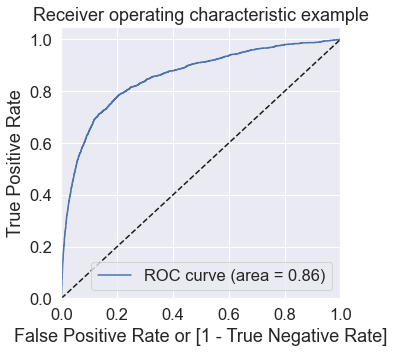

In [165]:
draw_roc(y_train_pred_final["Churn"],y_train_pred_final["Churn_Prob"])

### 8.6 Optimal cutoff point

In [166]:
# Let's create columns with different probability cutoffs 
numbers  = [0.0, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob     Id  predicted  0.0  0.05  0.1  0.2  0.3  0.4  0.5  \
0    0.0    0.031740  38916          0    1     0    0    0    0    0    0   
1    0.0    0.030886  21973          0    1     0    0    0    0    0    0   
2    0.0    0.030310  17127          0    1     0    0    0    0    0    0   
3    0.0    0.011262  34926          0    1     0    0    0    0    0    0   
4    0.0    0.233085  25567          1    1     1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

      prob  accuracy     sensi     speci
0.00  0.00  0.077975  1.000000  0.000000
0.05  0.05  0.693589  0.852469  0.680152
0.10  0.10  0.827156  0.738272  0.834673
0.20  0.20  0.902772  0.564815  0.931353
0.30  0.30  0.922988  0.424074  0.965181
0.40  0.40  0.929245  0.303704  0.982147
0.50  0.50  0.929823  0.203704  0.991230
0.60  0.60  0.927946  0.125309  0.995824
0.70  0.70  0.925443  0.066667  0.998068
0.80  0.80  0.923614  0.029630  0.999217
0.90  0.90  0.922314  0.004321  0.999948


<AxesSubplot:xlabel='prob'>

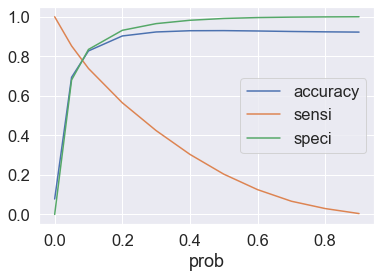

In [167]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.1 is the optimum point to take it as a cutoff probability. And all other metrics are already calculated for 0.1

In [168]:
print("Sensitivity or Recall or True positive rate - ", sensitivity)
print("Specificity - ", specificity)
print("Precision or Positive Predictive Value - ", precision)
print("False Postive Rate - ", false_postive_rate)
print("Negative Predictive Value - ", negative_predictive_value)

print("Accuracy : ", accuracy)

Sensitivity or Recall or True positive rate -  0.7382716049382716
Specificity -  0.8346732094382961
Precision or Positive Predictive Value -  0.27412330964932385
False Postive Rate -  0.1653267905617039
Negative Predictive Value -  0.9741668189849509
Accuracy :  0.9223142087023488


### 9.  Test Set Predictions

In [169]:
df_log_test[nonobj_columns] = scaler.transform(df_log_test[nonobj_columns])

In [170]:
# Copy the test set into another variable
df_log_test_pca = df_log_test.copy()
df_log_test.describe()

aon   is_churned  total_rcg_amt_call_data_diff    arpu_diff  \
count  8905.000000  8905.000000                   8905.000000  8905.000000   
mean      0.248884     0.080853                      0.505364     0.487881   
std       0.230398     0.272625                      0.229480     0.213032   
min       0.000000     0.000000                      0.000000     0.000000   
25%       0.069307     0.000000                      0.373873     0.373706   
50%       0.161314     0.000000                      0.509110     0.517511   
75%       0.383241     0.000000                      0.619177     0.625314   
max       0.969331     1.000000                      1.000000     1.000000   

       onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  roam_og_mou_diff  \
count     8905.000000      8905.000000       8905.000000       8905.000000   
mean         0.481945         0.484219          0.460629          0.459881   
std          0.245191         0.223066          0.019524          0.023253   
min          0.000000         0.000000         -0.134991         -0.248219   
25%          0.374778         0.382744          0.462637          0.462518   
50%          0.571460         0.546525          0.462637          0.462518   
75%          0.625000         0.625466          0.462637          0.462518   
max          1.000000         1.000000          0.734183          0.967862   

       loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  loc_og_t2f_mou_diff  \
count          8905.000000          8905.000000          8905.000000   
mean              0.489658             0.483520             0.513210   
std               0.244557             0.228871             0.283077   
min               0.000000             0.000000             0.000000   
25%               0.374465             0.373097             0.378317   
50%               0.569897             0.555129             0.625000   
75%               0.625000             0.624971             0.625000   
max               1.000000             1.000000             1.000000   

       loc_og_t2c_mou_diff  loc_og_mou_diff  std_og_t2t_mou_diff  \
count          8905.000000      8905.000000          8905.000000   
mean              0.526051         0.481239             0.496093   
std               0.312525         0.224183             0.278786   
min               0.000000         0.000000             0.000000   
25%               0.375000         0.375469             0.381032   
50%               0.625000         0.551975             0.625000   
75%               0.625000         0.624794             0.625000   
max               1.000000         1.000000             1.000000   

       std_og_t2m_mou_diff  std_og_t2f_mou_diff  std_og_mou_diff  \
count          8905.000000          8905.000000      8905.000000   
mean              0.499768             0.669767         0.492519   
std               0.265212             0.023826         0.252777   
min               0.000000            -0.521251         0.000000   
25%               0.391357             0.671938         0.385621   
50%               0.614363             0.671938         0.613185   
75%               0.625000             0.671938         0.625000   
max               1.000000             1.052801         1.000000   

       isd_og_mou_diff  spl_og_mou_diff  og_others_diff  total_og_mou_diff  \
count      8905.000000      8905.000000     8905.000000        8905.000000   
mean          0.865369         0.519244        0.639265           0.483227   
std           0.004952         0.279665        0.002125           0.219320   
min           0.696690         0.000000        0.591743           0.000000   
25%           0.865633         0.378546        0.639932           0.378910   
50%           0.865633         0.599734        0.639932           0.544691   
75%           0.865633         0.625000        0.639932           0.624701   
max           1.006188         1.000000        0.678812           1.000000   

       loc_ic_t2t_mou_diff  loc

In [171]:
# Create y_test and X_test
y_test = df_log_test.pop("is_churned")
X_test = df_log_test

In [172]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

X_test_sm = sm.add_constant(X_test_new)      # add constant
y_test_pred = res.predict(X_test_sm)         # predict the data y_test_pred on X-test_lm

In [173]:
y_test_pred[:10]

14640    0.028335
2099     0.054517
36844    0.058136
61624    0.019720
87949    0.058836
9555     0.013286
38310    0.007315
84903    0.072405
67950    0.141995
17775    0.011889
dtype: float64

In [174]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df['Id'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

is_churned     Id         0
0         0.0  14640  0.028335
1         0.0   2099  0.054517
2         0.0  36844  0.058136
3         0.0  61624  0.019720
4         0.0  87949  0.058836

In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Id','is_churned','Churn_Prob'], axis=1)

y_pred_final.head()

Id  is_churned  Churn_Prob
0  14640         0.0    0.028335
1   2099         0.0    0.054517
2  36844         0.0    0.058136
3  61624         0.0    0.019720
4  87949         0.0    0.058836

In [179]:
y_pred_final['final_predicted'] = y_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.1 else 0)

In [180]:
y_pred_final[["is_churned", "final_predicted"]].value_counts()

is_churned  final_predicted
0.0         0                  6866
            1                  1319
1.0         1                   526
            0                   194
dtype: int64

In [181]:
# Let's check the overall accuracy.
accuracy_test = accuracy_score(y_pred_final["is_churned"], y_pred_final['final_predicted'])
accuracy_test

0.8300954519932622

In [182]:
confusion_test = confusion_matrix(y_pred_final["is_churned"], y_pred_final['final_predicted'])
confusion_test

array([[6866, 1319],
       [ 194,  526]])

In [183]:
## Other Metrics
true_pos_test = confusion_test[1,1]  
true_neg_test = confusion_test[0,0] 
false_pos_test = confusion_test[0,1] 
false_neg_test = confusion_test[1,0] 

sensitivity_test = true_pos_test / float(true_pos_test + false_neg_test)
specificity_test = true_neg_test / float(true_neg_test + false_pos_test)
false_postive_rate_test = false_pos_test / float(true_neg_test + false_pos_test)
precision_test = true_pos_test / float(true_pos_test + false_pos_test)
negative_predictive_value_test = true_neg_test / float(true_neg_test + false_neg_test)

print("True Positives : ", true_pos_test)
print("True Negatives : ", true_neg_test)
print("False Positives : ", false_pos_test)
print("False Negatives : ", false_neg_test)

print("Sensitivity or Recall or True positive rate - ", sensitivity_test)
print("Specificity - ", specificity_test)
print("Precision or Positive Predictive Value - ", precision_test)
print("False Postive Rate - ", false_postive_rate_test)
print("Negative Predictive Value - ", negative_predictive_value_test)

True Positives :  526
True Negatives :  6866
False Positives :  1319
False Negatives :  194
Sensitivity or Recall or True positive rate -  0.7305555555555555
Specificity -  0.8388515577275504
Precision or Positive Predictive Value -  0.2850948509485095
False Postive Rate -  0.1611484422724496
Negative Predictive Value -  0.9725212464589235


In [184]:
 res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             is_churned   No. Observations:                20776
Model:                            GLM   Df Residuals:                    20751
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4111.3
Date:                Mon, 31 May 2021   Deviance:                       8222.7
Time:                        17:44:42   Pearson chi2:                 3.04e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        2.0768      0.219      9.484      0.000       1.648       2.506
aon                                         -1.7066      0.164    -10.415      0.000      -2.028      -1.385
total_rcg_amt_call_data_diff                -1.8200      0.214     -8.521      0.000      -2.239      -1.401
arpu_diff                                   -0.5251      0.215     -2.440      0.015      -0.947      -0.103
loc_og_mou_diff                              0.9370      0.184      5.082      0.000       0.576       1.298
std_og_t2t_mou_diff                         -0.4967      0.120     -4.136      0.000      -0.732      -0.261
std_og_t2m_mou_diff                         -0.4746      0.125     -3.787      0.000      -0.720      -0.229
loc_ic_t2t_mou_diff                         -0.2898      0.146     -1.984      0.047      -0.576      -0.003
loc_ic_t2m_mou_diff                         -0.7108      0.168     -4.229      0.000      -1.040      -0.381
std_ic_t2t_mou_diff                         -0.3060      0.111     -2.765      0.006      -0.523      -0.089
std_ic_t2m_mou_diff                         -0.3977      0.119     -3.331      0.001      -0.632      -0.164
ic_others_diff                              -0.2209      0.092     -2.390      0.017      -0.402      -0.040
total_rech_num_diff                         -1.5036      0.204     -7.387      0.000      -1.903      -1.105
last_day_rch_amt_diff                       -0.4931      0.164     -3.006      0.003      -0.815      -0.172
max_rech_data_diff                           0.5061      0.157      3.222      0.001       0.198       0.814
vol_2g_mb_diff                              -0.8175      0.134     -6.107      0.000      -1.080      -0.555
avg_rech_amt_diff                           -1.5501      0.191     -8.118      0.000      -1.924      -1.176
date_of_last_rech_6_Never rechanged          2.4113      0.431      5.593      0.000       1.566       3.256
date_of_last_rech_7_MidMonth                 0.2713      0.096      2.818      0.005       0.083       0.460
date_of_last_rech_8_LaterMonth              -1.0254      0.125     -8.232      0.000      -1.270      -0.781
date_of_last_rech_8_MidMonth                -0.3140      0.145     -2.160      0.031      -0.599      -0.029
date_of_last_rech_8_Never rechanged          0.5130      0.166      3.096      0.002       0.188       0.838
date_of_last_rech_data_8_LaterMonth         -1.0225      0.153     -6.691      0.000      -1.322      -0.723
date_of_last_rech_data_8_MidMonth           -0.5365      0.153     -3.517      0.000      -0.836      -0.238
date_of_last_rech_data_8_Never rechanged     0.5303      0.113      4.684      0.000       0.308       0.752
===============================


# Conclusion


#### 
 This model can be used for both interpretation as well as for predictions for below reasons: 

     1. TestAccuracy is better than Training accuracy 
                           (Test - 83 ; Train - 82.7)
     2. Sensitivity and Specifty are same across Training and Test sets
                           (Sensitivity - 73 ; Specificity - 84)
        
To identify churn, look at customers with below behaviors (coeffs are given in brackets) :

1. date_of_last_rech_6_Never rechanged (2.4113 ) 
                - They never recharged in June (Two months early itself)
2. loc_og_mou_diff	(0.937)
                - Their local outgoing calls within the network are reduced.
3. date_of_last_rech_data_8_Never rechanged (0.5303)
                - They never recharged the data in action month i.e., in August
4. date_of_last_rech_8_Never rechanged	(0.513)
             - They never recharged (not data) in action month i.e., in August
5. max_rech_data_diff	0.5061
             - Their maximum data recharge also drops from earlier months
6. date_of_last_rech_7_MidMonth (0.2713)
             - They recharged in mid of last to last month.
             
To identify non-churn, look at customers with below behaviors (coeffs are given in brackets) :

1. total_rcg_amt_call_data_diff	(-1.82)
        - Their total recharge amount for call and data increased
2. aon	-1.7066
        - Average age on network increased
3. avg_rech_amt_diff	(-1.5501)
        - Their average recharge amount increased
4. total_rech_num_diff	(-1.5036)
        - Their total recharges increased
5. date_of_last_rech_8_LaterMonth	(-1.0254)
        - They recharged in last ten days of action month i.e., in August
6. date_of_last_rech_data_8_LaterMonth	(-1.0225)
        - They recharged data in last ten days of action month i.e., in August
7. vol_2g_mb_diff	(-0.8175)
        - Their 2g data volume is increased
8. loc_ic_t2m_mou_diff	(-0.7108)
        - Their incoming local calls from other operator increased
9. date_of_last_rech_data_8_MidMonth	(-0.5365)
        -  They recharged data between 10-20 of action month i.e., in August
10. arpu_diff	(-0.5251)
         - Average revenue of the user increased


# 10. PCA


In [185]:
df_log_train_pca.shape

(20776, 71)

### 10.1 Apply PCA on training data

In [186]:
# Get x_train and y_train data
y_train = df_log_train_pca.pop("is_churned")
X_train = df_log_train_pca

In [187]:
# Fit training data using PCA
pca = PCA(random_state=102)
pca.fit(X_train)

PCA(random_state=102)

In [188]:
# Show the components of PCA
pca.components_

array([[-6.10512642e-03, -1.58676963e-02,  5.87475169e-02, ...,
         2.37171104e-01,  8.34057305e-02, -3.56031539e-01],
       [ 1.54595723e-03,  2.48317006e-01,  1.95076029e-01, ...,
         2.98677981e-01, -3.08311208e-02, -2.54547415e-01],
       [ 1.45824648e-02,  7.45256910e-03,  1.16163893e-01, ...,
        -2.97407416e-01,  1.03498599e-01,  1.47181443e-01],
       ...,
       [-2.00467082e-04,  1.31171635e-03,  1.02776055e-03, ...,
        -2.14616723e-04, -2.05516692e-04, -3.49394642e-04],
       [ 3.20434343e-04, -5.70511889e-04, -3.24146501e-04, ...,
        -8.46143825e-05,  1.08338136e-05,  3.08411078e-04],
       [-0.00000000e+00, -5.97544227e-16, -1.80126298e-16, ...,
         2.53047437e-17,  3.06955045e-18, -6.23634944e-17]])

In [189]:
# Get the explained variance ratio of each PCA component
pca.explained_variance_ratio_

array([1.93551465e-01, 9.38713258e-02, 7.33892950e-02, 6.35492028e-02,
       4.05159237e-02, 3.85918337e-02, 3.72588723e-02, 3.31654740e-02,
       3.08091245e-02, 2.64990919e-02, 2.49963872e-02, 2.23922184e-02,
       2.13031333e-02, 2.05208450e-02, 1.96414397e-02, 1.95572702e-02,
       1.85688356e-02, 1.78265831e-02, 1.69649429e-02, 1.56451632e-02,
       1.49984479e-02, 1.24876473e-02, 1.20351258e-02, 1.13110599e-02,
       9.59927110e-03, 9.50287718e-03, 9.10670644e-03, 8.55727966e-03,
       8.06334807e-03, 7.61757961e-03, 7.27184282e-03, 6.26057898e-03,
       5.74558469e-03, 5.31601618e-03, 4.94270500e-03, 4.53905408e-03,
       3.92316161e-03, 3.80935257e-03, 3.09918269e-03, 2.57290183e-03,
       2.21776326e-03, 1.91689238e-03, 1.70553597e-03, 1.47088608e-03,
       1.42783711e-03, 1.36991288e-03, 1.31167533e-03, 1.19122350e-03,
       1.14876218e-03, 1.11297594e-03, 9.70189831e-04, 9.00163776e-04,
       6.93062807e-04, 6.45447142e-04, 5.63577526e-04, 3.85621919e-04,
      

### 10.2 Scree plot for explained_variance_ratio 

In [190]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

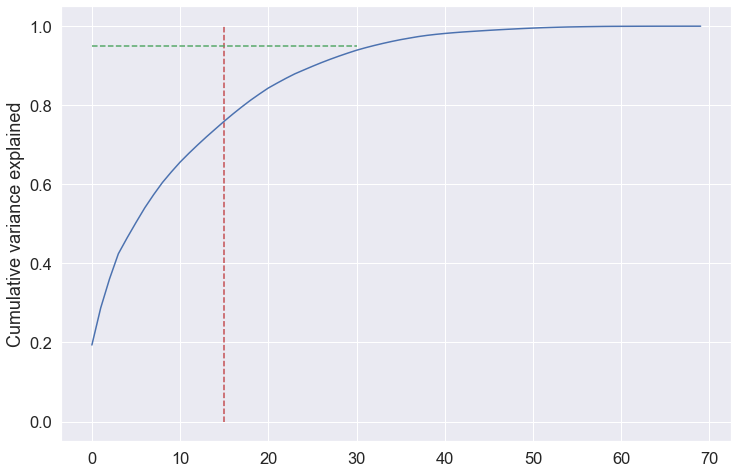

In [191]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### 10.3 Perform PCA with 15 components

In [192]:
#This n_components number  is obtained from the above screeplot
pca_final = IncrementalPCA(n_components=15)

In [193]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20776, 15)

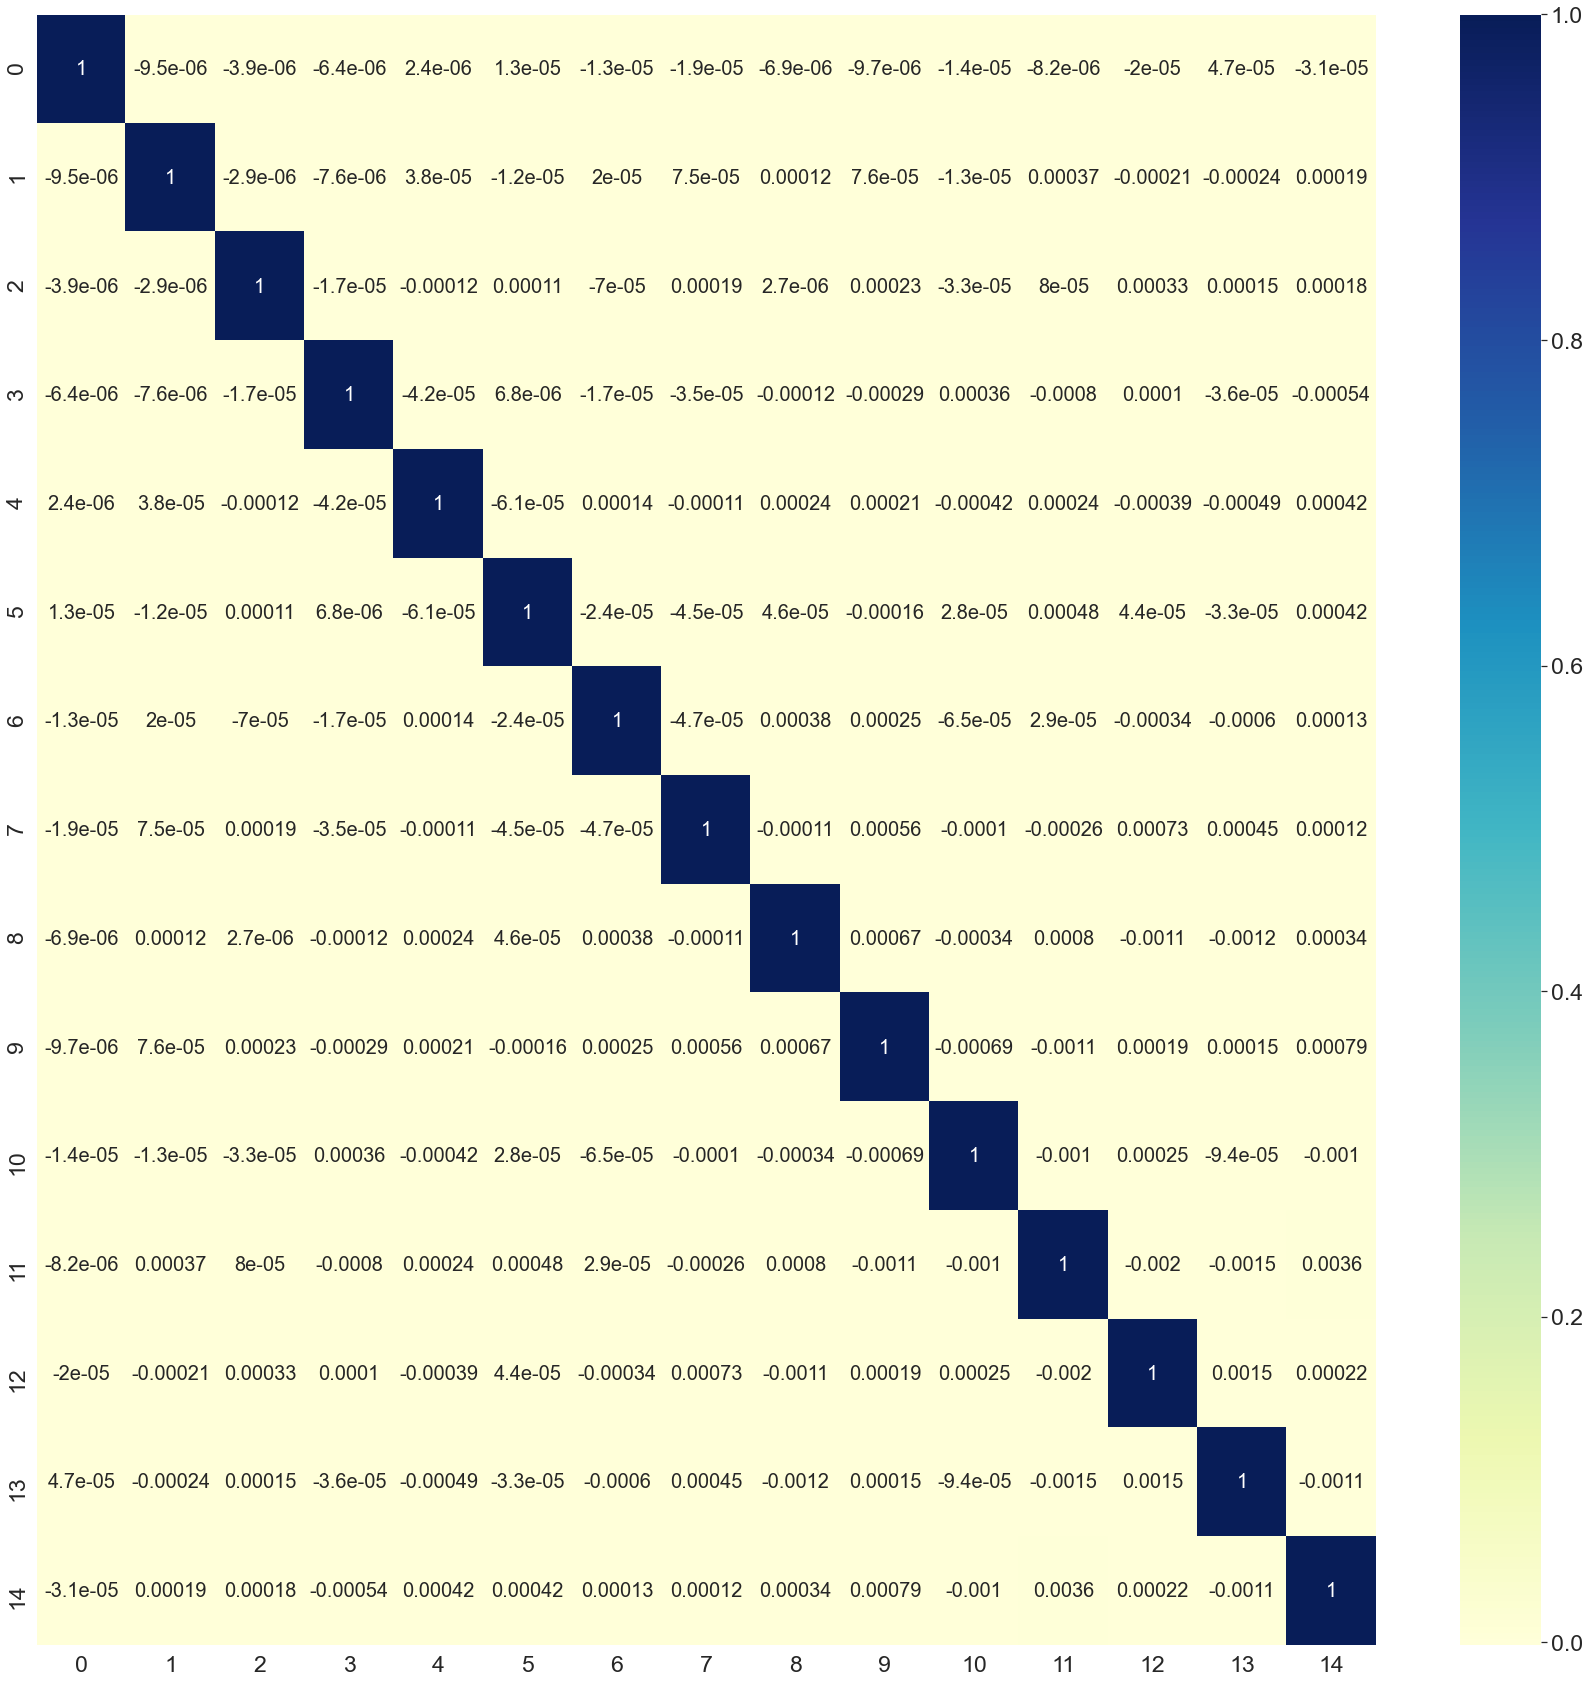

In [194]:
# Check the correlation betweeen PCA components
sns.set(font_scale=2.1)
plt.figure(figsize=(30, 30))
sns.heatmap(np.corrcoef(df_train_pca.transpose()), annot=True, cmap="YlGnBu", annot_kws={"size":20})
sns.set(font_scale=1.1)

### 10.5 Apply PCA on test set

In [195]:
# Create y_test and X_test
y_test = df_log_test_pca.pop("is_churned")
X_test = df_log_test_pca

In [196]:
print(X_test.shape, len(y_test))

(8905, 70) 8905


In [197]:
# Apply PCA model on test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8905, 15)

# 11. Logistic regression  PCA components

In [198]:
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca, y_train)
model_pca

LogisticRegression(class_weight='balanced')

### 11.1 Making predictions on the test set

In [199]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [200]:
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

### 11.2 Logistic Regression on PCA Training set ( By doing usual GLM approach ) 

In [201]:
X_train_sm = sm.add_constant(df_train_pca)
res_pca = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(), class_weight='balanced').fit()
res_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             is_churned   No. Observations:                20776
Model:                            GLM   Df Residuals:                    20760
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4358.2
Date:                Mon, 31 May 2021   Deviance:                       8716.5
Time:                        17:44:45   Pearson chi2:                 2.87e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3636      0.048    -69.673      0.000      -3.458      -3.269
x1             0.6885      0.035     19.732      0.000       0.620       0.757
x2            -1.8615      0.057    -32.388      0.000      -1.974      -1.749
x3            -0.0134      0.054     -0.249      0.803      -0.119       0.092
x4             0.4446      0.060      7.445      0.000       0.328       0.562
x5             0.1615      0.072      2.234      0.025       0.020       0.303
x6            -0.4799      0.065     -7.433      0.000      -0.606      -0.353
x7             0.5346      0.076      7.020      0.000       0.385       0.684
x8            -0.1294      0.080     -1.611      0.107      -0.287       0.028
x9            -0.8280      0.072    -11.562      0.000      -0.968      -0.688
x10           -0.0310      0.077     -0.405      0.686      -0.181       0.119
x11            0.2234      0.080      2.798      0.005       0.067       0.380
x12            0.0835      0.084      0.989      0.323      -0.082       0.249
x13            0.1095      0.090      1.214      0.225      -0.067       0.286
x14            0.5292      0.095      5.570      0.000       0.343       0.715
x15           -0.2283      0.091     -2.496      0.013      -0.408      -0.049
==============================================================================
"""

In [202]:
y_predicted = res_pca.predict(X_train_sm)
y_predicted_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_predicted})
y_predicted_final['Id'] = y_train.index
y_predicted_final.head(5)

Churn  Churn_Prob     Id
0    0.0    0.046933  38916
1    0.0    0.114986  21973
2    0.0    0.077381  17127
3    0.0    0.027877  34926
4    0.0    0.196995  25567

In [203]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.1 else 0
y_predicted_final['predicted'] = y_predicted_final["Churn_Prob"].map(lambda x: 1 if x > 0.1 else 0)
y_predicted_final.head()

Churn  Churn_Prob     Id  predicted
0    0.0    0.046933  38916          0
1    0.0    0.114986  21973          1
2    0.0    0.077381  17127          0
3    0.0    0.027877  34926          0
4    0.0    0.196995  25567          1

# Metrics on PCA training set

In [204]:
y_predicted_final[["Churn", "predicted",]].value_counts()

Churn  predicted
0.0    0            15409
       1             3747
1.0    1             1179
       0              441
dtype: int64

In [205]:
# Show accuracy
accuracy = accuracy_score(y_predicted_final.Churn, y_predicted_final.predicted)
accuracy

0.7984212552945706

In [206]:
# Show Confusion matrix
confusion = confusion_matrix(y_predicted_final.Churn, y_predicted_final.predicted )
print(confusion)

[[15409  3747]
 [  441  1179]]


In [207]:
## Other Metrics
true_pos = confusion[1,1]  
true_neg = confusion[0,0] 
false_pos = confusion[0,1] 
false_neg = confusion[1,0] 


print("True Positives : ", confusion[1,1])
print("True Negatives : ", confusion[0,0])
print("False Positives : ", confusion[0,1])
print("False Negatives : ", confusion[1,0])

sensitivity = true_pos / float(true_pos + false_neg)
specificity = true_neg / float(true_neg + false_pos)
false_postive_rate = false_pos / float(true_neg + false_pos)
precision = true_pos / float(true_pos + false_pos)
negative_predictive_value = true_neg / float(true_neg + false_neg)

print("Sensitivity or Recall or True positive rate - ", sensitivity)
print("Specificity - ", specificity)
print("Precision or Positive Predictive Value - ", precision)
print("False Postive Rate - ", false_postive_rate)
print("Negative Predictive Value - ", negative_predictive_value)

True Positives :  1179
True Negatives :  15409
False Positives :  3747
False Negatives :  441
Sensitivity or Recall or True positive rate -  0.7277777777777777
Specificity -  0.8043954896638129
Precision or Positive Predictive Value -  0.23934226552984167
False Postive Rate -  0.1956045103361871
Negative Predictive Value -  0.9721766561514196


In [208]:
fpr, tpr, thresholds = roc_curve(y_predicted_final["Churn"],
                            y_predicted_final["Churn_Prob"], drop_intermediate = False)

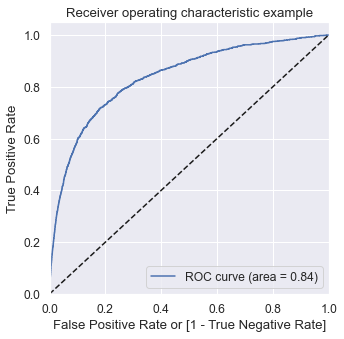

In [209]:
# Show roc curve
draw_roc(y_predicted_final["Churn"],y_predicted_final["Churn_Prob"])

In [210]:
# Let's create columns with different probability cutoffs 
numbers  = [0.0, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_predicted_final[i]= y_predicted_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
y_predicted_final.head()

Churn  Churn_Prob     Id  predicted  0.0  0.05  0.1  0.2  0.3  0.4  0.5  \
0    0.0    0.046933  38916          0    1     0    0    0    0    0    0   
1    0.0    0.114986  21973          1    1     1    1    0    0    0    0   
2    0.0    0.077381  17127          0    1     1    0    0    0    0    0   
3    0.0    0.027877  34926          0    1     0    0    0    0    0    0   
4    0.0    0.196995  25567          1    1     1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

      prob  accuracy     sensi     speci
0.00  0.00  0.077975  1.000000  0.000000
0.05  0.05  0.659174  0.843210  0.643610
0.10  0.10  0.798421  0.727778  0.804395
0.20  0.20  0.894157  0.525309  0.925350
0.30  0.30  0.918993  0.350617  0.967060
0.40  0.40  0.924817  0.200617  0.986062
0.50  0.50  0.925587  0.114815  0.994153
0.60  0.60  0.924528  0.058025  0.997807
0.70  0.70  0.923036  0.017284  0.999635
0.80  0.80  0.922362  0.004321  1.000000
0.90  0.90  0.922025  0.000000  1.000000


<AxesSubplot:xlabel='prob'>

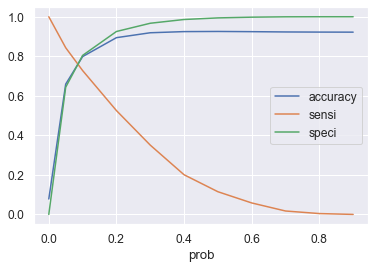

In [211]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = confusion_matrix(y_predicted_final.Churn, y_predicted_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [212]:
### From the curve above, 0.1 is the optimum point to take it as a cutoff probability. And all other metrics are already calculated for 0.1

### 9.  Test Set Predictions

In [213]:
X_test_sm = sm.add_constant(df_test_pca)      # add constant
y_test_pred_pca = res_pca.predict(X_test_sm)         # predict the data y_test_pred on X-test_lm

In [214]:
# Create dataframe with y_test values and predicted values
y_test_pred_pca = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred_pca})

# Add index to dataframe
y_test_pred_pca['Id'] = y_test.index

# Create a new column by changing Churn_Prob greater than 0.1 to 1 or else to 0
y_test_pred_pca['final_predicted'] = y_test_pred_pca['Churn_Prob'].map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_pca.head(5)

Churn  Churn_Prob     Id  final_predicted
0    0.0    0.023766  14640                0
1    0.0    0.065414   2099                0
2    0.0    0.035511  36844                0
3    0.0    0.028169  61624                0
4    0.0    0.077894  87949                0

In [215]:
# Accuracy.
accuracy_test = accuracy_score(y_test_pred_pca["Churn"], y_test_pred_pca['final_predicted'])
confusion_test = confusion_matrix(y_test_pred_pca["Churn"], y_test_pred_pca['final_predicted'])

print("Accuracy : ", accuracy_test)
print("confusion matrix : ")
confusion_test

Accuracy :  0.8038180797304885
confusion matrix : 


array([[6630, 1555],
       [ 192,  528]])

In [216]:
## Other Metrics
true_pos_test = confusion_test[1,1]  
true_neg_test = confusion_test[0,0] 
false_pos_test = confusion_test[0,1] 
false_neg_test = confusion_test[1,0] 

sensitivity_test = true_pos_test / float(true_pos_test + false_neg_test)
specificity_test = true_neg_test / float(true_neg_test + false_pos_test)
false_postive_rate_test = false_pos_test / float(true_neg_test + false_pos_test)
precision_test = true_pos_test / float(true_pos_test + false_pos_test)
negative_predictive_value_test = true_neg_test / float(true_neg_test + false_neg_test)

print("True Positives : ", true_pos_test)
print("True Negatives : ", true_neg_test)
print("False Positives : ", false_pos_test)
print("False Negatives : ", false_neg_test)

print("Sensitivity or Recall or True positive rate - ", sensitivity_test)
print("Specificity - ", specificity_test)
print("Precision or Positive Predictive Value - ", precision_test)
print("False Postive Rate - ", false_postive_rate_test)
print("Negative Predictive Value - ", negative_predictive_value_test)

True Positives :  528
True Negatives :  6630
False Positives :  1555
False Negatives :  192
Sensitivity or Recall or True positive rate -  0.7333333333333333
Specificity -  0.8100183262064753
Precision or Positive Predictive Value -  0.25348055688910226
False Postive Rate -  0.18998167379352474
Negative Predictive Value -  0.9718557607739666


In [217]:
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

# Conclusion - 2


#### This logistic regression model built using PCA components can be used as there are high Sensitivity and specificty values.
--------------------------------------------------------



Training : Sensitivity - 73 ; Specificity - 80.5
--------------------------------------------------------

Test     : Sensitivity - 73 ; Specificity - 81
--------------------------------------------------------
